# Time Frequency Analysis of Percept recordings

## 0. Loading packages and functions, defining paths

In [1]:
# Importing Python and external packages


import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np

import scipy
import matplotlib.pyplot as plt
from scipy import signal

import openpyxl
from openpyxl import Workbook, load_workbook
import xlrd

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 



from importlib import reload          

# from scipy.signal import spectrogram, hanning     # hanning not found


In [2]:
# check some package versions for documentation and reproducability
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('mne_bids', mne_bids.__version__)
print('mne', mne.__version__)
print('sci-py', scipy.__version__)

Python sys 3.10.6 | packaged by conda-forge | (main, Oct 24 2022, 16:02:16) [MSC v.1916 64 bit (AMD64)]
pandas 1.4.4
numpy 1.23.3
mne_bids 0.11.1
mne 1.2.1
sci-py 1.9.3


In [2]:
os.getcwd()

'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\notebooks'

In [3]:
# create a path to the PyPerceive_Project folder -> project_path
# and a path to the "Data" folder and "Code" folder within the project
project_path = os.getcwd()
while project_path[-10:] != 'PyPerceive':
    project_path = os.path.dirname(project_path)

code_path = os.path.join(project_path, 'code')
sys.path.append(code_path)

# change directory to code path
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code'

In [6]:
import PerceiveImport.methods.find_folders as findfolders
importlib.reload(findfolders)
findfolders.get_local_path(folder="results", sub="024")

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\results\\sub-024'

## 1. Load Data using MainClass

In [36]:
from PerceiveImport.classes import main_class as mainclass
importlib.reload(mainclass)

<module 'PerceiveImport.classes.main_class' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\classes\\main_class.py'>

In [37]:
from PerceiveImport.classes import main_class, modality_class, metadata_class, session_class, condition_class, task_class
import PerceiveImport.methods.load_rawfile as load_rawfile


In [38]:
# define an example instance and fill in the values of the dataclass PerceiveData 
# choose the values you are interested in analyzing further
importlib.reload(mainclass)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)

sub024 = mainclass.PerceiveData(
    sub = "024", 
    incl_modalities=["survey", "streaming"],
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition =['m0s0'],
    incl_task = ["rest"]
)

# Funktion:
# bei keiner Eingabe der letzten attributes, wird default aus allen Möglichkeiten herausgegeben, jedoch funktioniert nur der 1.Input jeweils

# Pitfalls:
# wenn nichts eingegeben wurde, funktioniert immer nur der 1.Input der Default Liste! -> zB default Liste ["PostOp", "FU3M", ] -> nur PostOp funktioniert, Rest ist leer
# missing function: if one attribute is left out, the connection to the next Class is missing ...  


# neue Ziele: 
# channel renaming nach loading
# self.data ist nur von taskClass abrufbar, optimal wäre es auch von Main, modality, session und condition class self.data abrufen zu können, und raw

Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618062900_1.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063200_4.mat
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063300_5.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063400_6.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063500_7.mat
Creating RawArray with float64 data, n_channels=3,

In [44]:
json_object=sub024.survey.fu18m.m0s0.rest.sourceJSON
json_object["RestBSSuRingR"]["Impedance"]

[{'ImpedanceStatus': 'ImpedanceStateDef.INVESTIGATE',
  'TestCurrentMA': 'Automatic increase',
  'Hemisphere': [{'Hemisphere': 'HemisphereLocationDef.Left',
    'SessionImpedance': {'Monopolar': [{'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.SenSight_0',
       'ResultValue': 2589},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.SenSight_1a',
       'ResultValue': 2359},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_1b',
       'ResultValue': 3045},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_1c',
       'ResultValue': 2212},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.SenSight_2a',
       'ResultValue': 1965},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_2b',
       'ResultValue': 2404},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_2c',


In [56]:
channels = raw["RestBSSuRingR"].info.ch_names
channels

['LFP_Stn_0_3_RIGHT_RING',
 'LFP_Stn_1_3_RIGHT_RING',
 'LFP_Stn_0_2_RIGHT_RING',
 'LFP_Stn_1_2_RIGHT_RING',
 'LFP_Stn_0_1_RIGHT_RING',
 'LFP_Stn_2_3_RIGHT_RING']

In [60]:
# pick channels
# channels = list of all channels
# include = only channels of interest
pickedChannels = mne.pick_channels(channels, 
include=['LFP_Stn_1_3_RIGHT_RING',
 'LFP_Stn_0_2_RIGHT_RING',
 'LFP_Stn_1_2_RIGHT_RING',
 'LFP_Stn_0_1_RIGHT_RING',], 
 )
# exclude=['LFP_Stn_0_3_RIGHT_RING']
pickedChannels

array([1, 2, 3, 4])

In [67]:
# get channels by using indices
# picked = list(channels[pickedChannels])
picked = [channels[i] for i in pickedChannels]
picked

['LFP_Stn_1_3_RIGHT_RING',
 'LFP_Stn_0_2_RIGHT_RING',
 'LFP_Stn_1_2_RIGHT_RING',
 'LFP_Stn_0_1_RIGHT_RING']

In [69]:
pick = ["02", "13"]

for element in pick[0]:
    print(element)

0
2


In [74]:
pick = ["_0_2", "1_3"]

if any(x in channels for x in pick):
    print("found")

In [99]:
exclude = []

for n, names in enumerate(channels):

    if "03" in names:
        exclude.append(names)



exclude

[]

In [68]:
pick = ["02", "13"]
newlist = []

for n, names in enumerate(channels):

    for nb, numbers in enumerate(pick):

        for element in numbers:
            
            if letter1 and letter2 of numbers in names:
            newlist.append(names)



['LFP_Stn_0_3_RIGHT_RING',
 'LFP_Stn_1_3_RIGHT_RING',
 'LFP_Stn_0_2_RIGHT_RING',
 'LFP_Stn_1_2_RIGHT_RING',
 'LFP_Stn_0_1_RIGHT_RING',
 'LFP_Stn_2_3_RIGHT_RING']

In [118]:
# rename channels

# if Channel names differ to Standard, first rename channel names to standard
mapping = {
    'LFP_Stn_0_3_RIGHT_RING':"LFP_R_03_STN_MT",
    'LFP_Stn_1_3_RIGHT_RING':"LFP_R_13_STN_MT",
    'LFP_Stn_0_2_RIGHT_RING':"LFP_R_02_STN_MT",
    'LFP_Stn_1_2_RIGHT_RING':"LFP_R_12_STN_MT",
    'LFP_Stn_0_1_RIGHT_RING':"LFP_R_01_STN_MT",
    'LFP_Stn_2_3_RIGHT_RING':"LFP_R_23_STN_MT",
    'LFP_Stn_0_3_LEFT_RING':"LFP_L_03_STN_MT",
    'LFP_Stn_1_3_LEFT_RING':"LFP_L_13_STN_MT",
    'LFP_Stn_0_2_LEFT_RING':"LFP_L_02_STN_MT",
    'LFP_Stn_1_2_LEFT_RING':"LFP_L_12_STN_MT",
    'LFP_Stn_0_1_LEFT_RING':"LFP_L_01_STN_MT",
    'LFP_Stn_2_3_LEFT_RING':"LFP_L_23_STN_MT",
    'LFP_Stn_1_A_1_B_RIGHT_SEGMENT':"LFP_R_1A1B_STN_MT",
    'LFP_Stn_1_B_1_C_RIGHT_SEGMENT':"LFP_R_1B1C_STN_MT",
    'LFP_Stn_1_A_1_C_RIGHT_SEGMENT':"LFP_R_1A1C_STN_MT",
    'LFP_Stn_2_A_2_B_RIGHT_SEGMENT':"LFP_R_2A2B_STN_MT",
    'LFP_Stn_2_B_2_C_RIGHT_SEGMENT':"LFP_R_2B2C_STN_MT",
    'LFP_Stn_2_A_2_C_RIGHT_SEGMENT':"LFP_R_2A2C_STN_MT",
    'LFP_Stn_1_A_1_B_LEFT_SEGMENT':"LFP_L_1A1B_STN_MT",
    'LFP_Stn_1_B_1_C_LEFT_SEGMENT':"LFP_L_1B1C_STN_MT",
    'LFP_Stn_1_A_1_C_LEFT_SEGMENT':"LFP_L_1A1C_STN_MT",
    'LFP_Stn_2_A_2_B_LEFT_SEGMENT':"LFP_L_2A2B_STN_MT",
    'LFP_Stn_2_B_2_C_LEFT_SEGMENT':"LFP_L_2B2C_STN_MT",
    'LFP_Stn_2_A_2_C_LEFT_SEGMENT':"LFP_L_2A2C_STN_MT",
    'LFP_Stn_1_A_2_A_RIGHT_SEGMENT':"LFP_R_1A2A_STN_MT",
    'LFP_Stn_1_B_2_B_RIGHT_SEGMENT':"LFP_R_1B2B_STN_MT",
    'LFP_Stn_1_C_2_C_RIGHT_SEGMENT':"LFP_R_1C2C_STN_MT",
    'LFP_Stn_1_A_2_A_LEFT_SEGMENT':"LFP_L_1A2A_STN_MT",
    'LFP_Stn_1_B_2_B_LEFT_SEGMENT':"LFP_L_1B2B_STN_MT",
    'LFP_Stn_1_C_2_C_LEFT_SEGMENT':"LFP_L_1C2C_STN_MT",
    "LFP_Stn_R_03":"LFP_R_03_STN_MT",
    "LFP_Stn_R_13":"LFP_R_13_STN_MT",
    "LFP_Stn_R_02":"LFP_R_02_STN_MT",
    "LFP_Stn_R_12":"LFP_R_12_STN_MT",
    "LFP_Stn_R_01":"LFP_R_01_STN_MT",
    "LFP_Stn_R_23":"LFP_R_23_STN_MT",
    "LFP_Stn_L_03":"LFP_L_03_STN_MT",
    "LFP_Stn_L_13":"LFP_L_13_STN_MT",
    "LFP_Stn_L_02":"LFP_L_02_STN_MT",
    "LFP_Stn_L_12":"LFP_L_12_STN_MT",
    "LFP_Stn_L_01":"LFP_L_01_STN_MT",
    "LFP_Stn_L_23":"LFP_L_23_STN_MT",
    'LFP_Stn_R_1A1B':"LFP_R_1A1B_STN_MT",
    'LFP_Stn_R_1B1C':"LFP_R_1B1C_STN_MT",
    'LFP_Stn_R_1A1C':"LFP_R_1A1C_STN_MT",
    'LFP_Stn_R_2A2B':"LFP_R_2A2B_STN_MT",
    'LFP_Stn_R_2B2C':"LFP_R_2B2C_STN_MT",
    'LFP_Stn_R_2A2C':"LFP_R_2A2C_STN_MT",
    'LFP_Stn_L_1A1B':"LFP_L_1A1B_STN_MT",
    'LFP_Stn_L_1B1C':"LFP_L_1B1C_STN_MT",
    'LFP_Stn_L_1A1C':"LFP_L_1A1C_STN_MT",
    'LFP_Stn_L_2A2B':"LFP_L_2A2B_STN_MT",
    'LFP_Stn_L_2B2C':"LFP_L_2B2C_STN_MT",
    'LFP_Stn_L_2A2C':"LFP_L_2A2C_STN_MT",
    'LFP_Stn_R_1A2A':"LFP_R_1A2A_STN_MT", 
    'LFP_Stn_R_1B2B':"LFP_R_1B2B_STN_MT", 
    'LFP_Stn_R_1C2C':"LFP_R_1C2C_STN_MT",
    'LFP_Stn_L_1A2A':"LFP_L_1A2A_STN_MT", 
    'LFP_Stn_L_1B2B':"LFP_L_1B2B_STN_MT", 
    'LFP_Stn_L_1C2C':"LFP_L_1C2C_STN_MT",
    
}

# create a new mapping dictionary only with relevant channel names

#for chan in channels:
mappingSelected = dict((k, mapping[k]) for k in channels if k in mapping)

mappingSelected


mne.rename_channels(info=raw.info, mapping=mappingSelected, allow_duplicates=False)
raw.info.ch_names

['LFP_R_03_STN_MT',
 'LFP_R_13_STN_MT',
 'LFP_R_02_STN_MT',
 'LFP_R_12_STN_MT',
 'LFP_R_01_STN_MT',
 'LFP_R_23_STN_MT']

In [25]:
f = sub24['RestBSSuRingR'].get_data()[0,:]
mask = np.logical_and(f >= 1, f <= 100)

f_new = f[mask]
f_new

array([ 4.38087613,  1.01097142,  2.3589333 , ..., 10.33437447,
        8.64942211,  2.3589333 ])

In [10]:
# Beispiel: ich möchte von sub 017, alle Survey files vom M0S0 für jeden Timepoint (session) 
# erstelle je 1 DF für jede session
data = {}

sub = '024'
modality = 'survey'
cond = 'm0s0'

session = ['fu3m']

data[sub] = {}
for s in session:
    mod = getattr(sub024, modality)
    data[sub][s] = getattr(mod, s)




In [11]:
data['024']['fu3m'] # hier soll metadata Tabelle angezeigt werden -> davon kann ich dann im nächsten Schritt mit mne data laden

sessionClass(sub='024', modality='survey', session='fu3m', metaClass=MetadataClass(sub='024', incl_modalities=['survey'], incl_session=['postop', 'fu3m', 'fu12m', 'fu18m'], incl_condition=['m0s0'], incl_task=['rest'], orig_meta_table=                                               report  \
0   sub-024_Report_Json_Session_Report_20210618T11...   
1   sub-024_Report_Json_Session_Report_20210618T11...   
2   sub-024_Report_Json_Session_Report_20210618T11...   
3   sub-024_Report_Json_Session_Report_20210618T11...   
4   sub-024_Report_Json_Session_Report_20210618T11...   
..                                                ...   
73    Report_Json_Session_Report_20221205T134700.json   
74    Report_Json_Session_Report_20221205T134700.json   
75    Report_Json_Session_Report_20221205T134700.json   
76    Report_Json_Session_Report_20221205T134700.json   
77    Report_Json_Session_Report_20221205T134700.json   

                                     perceiveFilename                task  \
0   

In [21]:
# load the chosen perceive .mat files with MNE
# e.g.: from subject 021 all Survey files from FU3M 
# store each loaded raw file in a dictionary with keys named raw_idx -> idx unfortunately doesn´t match with DF because paths are in different order (initially looped through folders...)

# sub = "021"
# raw_perceive_path = find_folders.get_onedrive_path("raw_perceive", sub)

# raw_021 = {}
# count = -1
# path_list = []


# for file in data['021']['FU3M'].metaClass.metadata["perceiveFilename"]:

#     # make a list with all paths to the selected perceive files
#     path_list.append(os.path.join(raw_perceive_path, file))
    

# # load each path with mne and store in a dictionary raw_021{}
# for path in path_list:

#     count +=1

#     raw_021["raw_{0}".format(count)] = mne.io.read_raw_fieldtrip(
#         path,
#         info={},
#         data_name='data'
#         )

In [25]:
sub021RingR.info.keys()


dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

### Define variables 

In [7]:
data = sub024.survey.fu3m.m0s0.rest.data["RestBSSuRingR"]


ch_names = data.ch_names
n_chan = len(ch_names)
n_time_samps = data.n_times #nsamples
time_secs = data.times #timepoints set to zero
ch_trials = data._data
sampling_freq = data.info['sfreq']
time_duration = (n_time_samps/sampling_freq).astype(float)



print(
      f'The data object has:\n\t{n_time_samps} time samples,'
      f'\n\tand a sample frequency of {sampling_freq} Hz' 
      f'\n\twith a recording duration of {time_duration} seconds.' 
      f'\n\t{n_chan} channels were labeled as \n{ch_names}.'
)

The data object has:
	5288 time samples,
	and a sample frequency of 250.0 Hz
	with a recording duration of 21.152 seconds.
	6 channels were labeled as 
['LFP_Stn_R_03', 'LFP_Stn_R_13', 'LFP_Stn_R_02', 'LFP_Stn_R_12', 'LFP_Stn_R_01', 'LFP_Stn_R_23'].


## 2. MNE basics

In [10]:

sub024 = mainclass.PerceiveData(
    sub = "024", 
    incl_modalities=["survey"],
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition =["m0s0"],
    incl_task = ["rest"]
    )

NameError: name 'mainclass' is not defined

In [11]:
# to get information on mne function type 
# mne.<function_name>?

mne.preprocessing?

Type:        module
String form: <module 'mne.preprocessing' from 'c:\\Users\\jebe12\\anaconda3\\envs\\pyPerceive_dev\\lib\\site-packages\\mne\\preprocessing\\__init__.py'>
File:        c:\users\jebe12\anaconda3\envs\pyperceive_dev\lib\site-packages\mne\preprocessing\__init__.py
Docstring:   Preprocessing with artifact detection, SSP, and ICA.


In [ ]:
# mne uses multiple submodules

# e.g. mne.preprocessing, 
# mne.viz for visualisation
# mne.io for reading and writing data
# mne.stats for statistics


# you can import submodules directly 
# e.g. from mne.preprocessing import eog

In [36]:
raw = sub024.survey.postop.m0s0.rest.data['RestBSSuRingR']
raw.get_data()[0, :]


array([-2.47126346, -1.46029205,  0.22466031, ..., -0.22466031,
        1.79728252,  3.48223488])

In [20]:
raw.info.ch_names

['LFP_Stn_R_03',
 'LFP_Stn_R_13',
 'LFP_Stn_R_02',
 'LFP_Stn_R_12',
 'LFP_Stn_R_01',
 'LFP_Stn_R_23']

In [33]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

Get Impedances from mne raw data

In [49]:
raw.info['chs'][0]


{'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
 'cal': 1.0,
 'range': 1.0,
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'loc': array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]),
 'unit': 107 (FIFF_UNIT_V),
 'ch_name': 'LFP_Stn_R_03',
 'logno': 1,
 'scanno': 1,
 'kind': 502 (FIFFV_MISC_CH),
 'coil_type': 0 (FIFFV_COIL_NONE)}

In [41]:
mne.channels.make_standard_montage(kind=)

TypeError: make_standard_montage() missing 1 required positional argument: 'kind'

In [18]:
raw.ch_names
n_chan = len(raw.ch_names)
raw.n_times #number of samples
raw.times #timepoints set to zero
raw._data # channel trials 
raw.info['sfreq'] # sampling frequency
time_duration = (raw.n_times/raw.info['sfreq']).astype(float)



print(
      f'The data object has:\n\t{raw.n_times} time samples,'
      f'\n\tand a sample frequency of {raw.info["sfreq"]} Hz' 
      f'\n\twith a recording duration of {time_duration} seconds.' 
      f'\n\t{n_chan} channels were labeled as \n{raw.ch_names}.'
)

The data object has:
	5288 time samples,
	and a sample frequency of 250.0 Hz
	with a recording duration of 21.152 seconds.
	6 channels were labeled as 
['LFP_Stn_R_03', 'LFP_Stn_R_13', 'LFP_Stn_R_02', 'LFP_Stn_R_12', 'LFP_Stn_R_01', 'LFP_Stn_R_23'].


In [19]:
# convert data to pd.DataFrame
DF = raw.to_data_frame()
DF


time  LFP_Stn_R_03  LFP_Stn_R_13  LFP_Stn_R_02  LFP_Stn_R_12  \
0      0.000     -2.471263      0.910840     -1.347962     -0.340026   
1      0.004     -1.460292      0.455420     -0.786311     -0.226684   
2      0.008      0.224660      0.341565      0.112330     -0.113342   
3      0.012      1.572622      0.683130      0.786311      0.340026   
4      0.016      1.010971      0.569275      1.684952     -1.133421   
...      ...           ...           ...           ...           ...   
5283  21.132     -1.460292     -0.796985     -0.898641      3.173580   
5284  21.136     -1.797283      0.000000      0.898641      3.513606   
5285  21.140     -0.224660     -1.024695      2.246603      0.000000   
5286  21.144      1.797283      0.227710      3.145244     -0.453369   
5287  21.148      3.482235     -0.683130      3.482235      0.680053   

      LFP_Stn_R_01  LFP_Stn_R_23  
0         0.000000      3.369905  
1         0.000000      1.797283  
2         0.455420      1.909613  
3         1.138550      2.920584  
4         3.415650      0.786311  
...            ...           ...  
5283     -2.732520     -0.898641  
5284     -2.618665     -1.010971  
5285     -0.569275     -1.235632  
5286      1.593970      0.000000  
5287      5.351185     -0.561651  

[5288 rows x 7 columns]

In [57]:
# data = raw.get_data()
# data

array([[  4.38087613,   1.01097142,   0.44932063, ...,  -5.39184755,
         -2.02194283,   2.3589333 ],
       [ -4.32649004,  -5.57889505,  -4.89576505, ...,   2.84637503,
          3.64336003,   2.27710002],
       [  4.15621582,   1.90961267,   0.        , ...,  -6.73980944,
         -6.51514912,  -0.56165079],
       [ -1.36010569,  -3.0602378 ,  -3.6269485 , ...,   1.24676355,
          1.36010569,   0.45336856],
       [  8.19756008,   5.46504005,   3.41565003, ..., -10.13309509,
         -6.71744506,   0.341565  ],
       [ -1.01097142,  -0.89864126,  -1.23563173, ...,   1.01097142,
          2.58359362,   3.9315555 ]])

In [64]:
# you can forget about this one :(
test_df = DF.copy()

test_df.drop('time', axis='columns', inplace=True)

# take the average of the 6 channels combined
average_6chan = pd.DataFrame(dict(time=DF['time'], avg=test_df.mean(1)))

plt.plot(average_6chan['time'], average_6chan['avg'])


time       avg
0  0.000  0.020249
1  0.004 -0.036764
2  0.008  0.488374

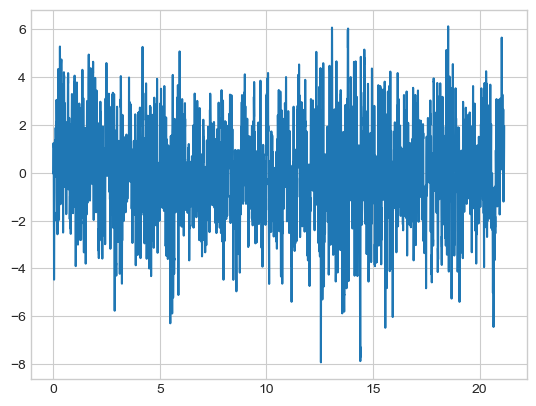

In [ ]:
# Rename channels to ReTune BIDS conform ch_names
mapping = {
    # RING
    # "LFP_Stn_R_03":"LFP_R_03_STN_MT",
    # "LFP_Stn_R_13":"LFP_R_13_STN_MT",
    # "LFP_Stn_R_02":"LFP_R_02_STN_MT",
    # "LFP_Stn_R_12":"LFP_R_12_STN_MT",
    # "LFP_Stn_R_01":"LFP_R_01_STN_MT",
    # "LFP_Stn_R_23":"LFP_R_23_STN_MT",
    "LFP_Stn_L_03":"LFP_L_03_STN_MT",
    "LFP_Stn_L_13":"LFP_L_13_STN_MT",
    "LFP_Stn_L_02":"LFP_L_02_STN_MT",
    "LFP_Stn_L_12":"LFP_L_12_STN_MT",
    "LFP_Stn_L_01":"LFP_L_01_STN_MT",
    "LFP_Stn_L_23":"LFP_L_23_STN_MT",
    
    # SEGMENTS
    # 'LFP_Stn_R_1A1B':"LFP_R_1A1B_STN_MT",
    # 'LFP_Stn_R_1B1C':"LFP_R_1B1C_STN_MT",
    # 'LFP_Stn_R_1A1C':"LFP_R_1A1C_STN_MT",
    # 'LFP_Stn_R_2A2B':"LFP_R_2A2B_STN_MT",
    # 'LFP_Stn_R_2B2C':"LFP_R_2B2C_STN_MT",
    # 'LFP_Stn_R_2A2C':"LFP_R_2A2C_STN_MT",
    # 'LFP_Stn_L_1A1B':"LFP_L_1A1B_STN_MT",
    # 'LFP_Stn_L_1B1C':"LFP_L_1B1C_STN_MT",
    # 'LFP_Stn_L_1A1C':"LFP_L_1A1C_STN_MT",
    # 'LFP_Stn_L_2A2B':"LFP_L_2A2B_STN_MT",
    # 'LFP_Stn_L_2B2C':"LFP_L_2B2C_STN_MT",
    # 'LFP_Stn_L_2A2C':"LFP_L_2A2C_STN_MT",
    # 'LFP_Stn_R_1A2A':"LFP_R_1A2A_STN_MT", 
    # 'LFP_Stn_R_1B2B':"LFP_R_1B2B_STN_MT", 
    # 'LFP_Stn_R_1C2C':"LFP_R_1C2C_STN_MT",
    # 'LFP_Stn_L_1A2A':"LFP_L_1A2A_STN_MT", 
    # 'LFP_Stn_L_1B2B':"LFP_L_1B2B_STN_MT", 
    # 'LFP_Stn_L_1C2C':"LFP_L_1C2C_STN_MT",
    
    
}

mne.rename_channels(info=raw.info, mapping=mapping, allow_duplicates=False)

In [56]:
# convert data to NumPy array
raw.get_data().shape


(6, 5288)

## 3. Exploring and plotting data

### Absolute PSD

In [26]:
import PerceiveImport.methods.BSSuAbsolutePsd as absolutePsd
importlib.reload(absolutePsd)

<module 'PerceiveImport.methods.BSSuAbsolutePsd' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\BSSuAbsolutePsd.py'>

calculate and plot PSD
- load the requested data with mne.read_raw_fieldtrip()
- High-pass filter 5Hz Butterworth filter (filterorder=5)
- transform the filtered time series data into power spectral density using Welch`s method
- plot PSD (V**2/Hz??) and frequencies


Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618062900_1.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063200_4.mat
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063300_5.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063400_6.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063500_7.mat
Creating RawArray with float64 data, n_channels=3,

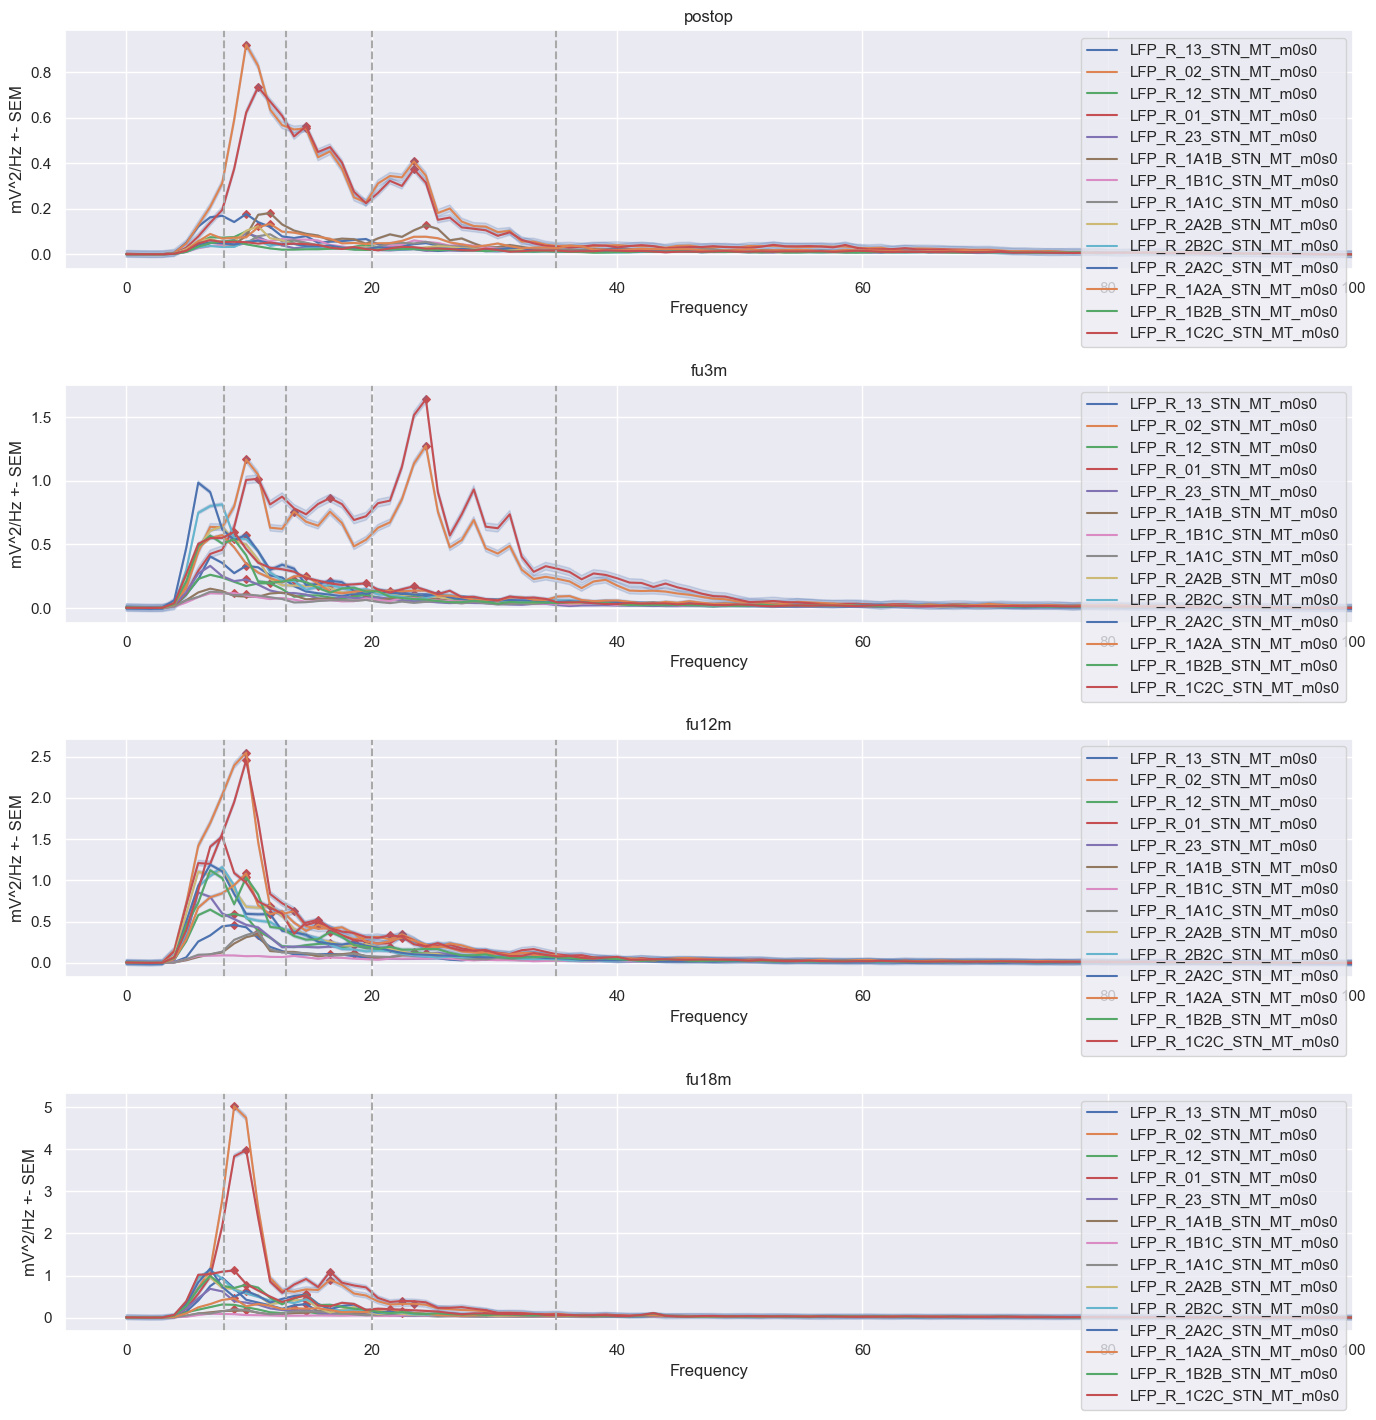

In [27]:
f_px_sub024 = absolutePsd.welch_absolutePsd_seperateTimepoints(
    incl_sub = "024", 
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition = ["m0s0"],
    tasks=['RestBSSuRingR', 'RestBSSuSegmIntraR', 'RestBSSuSegmInterR'],
    pickChannels=['13', '02', '12', '01', '23', 
    '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
    '1A2A', '1B2B', '1C2C'])


In [45]:
f_px_sub024["highestPEAK"]

postop_LFP_R_13_STN_MT_highestPEAK_alpha  \
PEAK_frequency                                    9.765625   
PEAK_absolutePSD                                  0.176548   

                  postop_LFP_R_02_STN_MT_highestPEAK_alpha  \
PEAK_frequency                                    9.765625   
PEAK_absolutePSD                                  0.920829   

                  postop_LFP_R_02_STN_MT_highestPEAK_lowBeta  \
PEAK_frequency                                     14.648438   
PEAK_absolutePSD                                    0.552656   

                  postop_LFP_R_02_STN_MT_highestPEAK_highBeta  \
PEAK_frequency                                      23.437500   
PEAK_absolutePSD                                     0.407737   

                  postop_LFP_R_01_STN_MT_highestPEAK_alpha  \
PEAK_frequency                                   10.742188   
PEAK_absolutePSD                                  0.734464   

                  postop_LFP_R_01_STN_MT_highestPEAK_lowBeta  \
PEAK_frequency                                     14.648438   
PEAK_absolutePSD                                    0.561984   

                  postop_LFP_R_01_STN_MT_highestPEAK_highBeta  \
PEAK_frequency                                      23.437500   
PEAK_absolutePSD                                     0.373856   

                  postop_LFP_R_1A1B_STN_MT_highestPEAK_alpha  \
PEAK_frequency                                     11.718750   
PEAK_absolutePSD                                    0.180854   

                  postop_LFP_R_1A1B_STN_MT_highestPEAK_highBeta  \
PEAK_frequency                                        24.414062   
PEAK_absolutePSD                                       0.126986   

                  postop_LFP_R_2A2B_STN_MT_highestPEAK_alpha  ...  \
PEAK_frequency                                     10.742188  ...   
PEAK_absolutePSD                                    0.123066  ...   

                  fu18m_LFP_R_2A2C_STN_MT_highestPEAK_highBeta  \
PEAK_frequency                                       22.460938   
PEAK_absolutePSD                                      0.150169   

                  fu18m_LFP_R_1A2A_STN_MT_highestPEAK_alpha  \
PEAK_frequency                                     8.789062   
PEAK_absolutePSD                                   0.455282   

                  fu18m_LFP_R_1A2A_STN_MT_highestPEAK_lowBeta  \
PEAK_frequency                                      13.671875   
PEAK_absolutePSD                                     0.220000   

                  fu18m_LFP_R_1A2A_STN_MT_highestPEAK_highBeta  \
PEAK_frequency                                       21.484375   
PEAK_absolutePSD                                      0.202276   

                  fu18m_LFP_R_1B2B_STN_MT_highestPEAK_alpha  \
PEAK_frequency                                     9.765625   
PEAK_absolutePSD                                   0.780793   

                  fu18m_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta  \
PEAK_frequency                                      14.648438   
PEAK_absolutePSD                                     0.540311   

                  fu18m_LFP_R_1B2B_STN_MT_highestPEAK_highBeta  \
PEAK_frequency                                       22.460938   
PEAK_absolutePSD                                      0.131223   

                  fu18m_LFP_R_1C2C_STN_MT_highestPEAK_alpha  \
PEAK_frequency                                     8.789062   
PEAK_absolutePSD                                   1.121226   

                  fu18m_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta  \
PEAK_frequency                                      14.648438   
PEAK_absolutePSD                                     0.531065   

                  fu18m_LFP_R_1C2C_STN_MT_highestPEAK_highBeta  
PEAK_frequency                                       29.296875  
PEAK_absolutePSD                                      0.101076  

[2 rows x 99 columns]

In [159]:
f_px_sub024.keys()

dict_keys(['frequenciesDataFrame', 'absolutePsdDataFrame', 'SEM', 'highestPEAK'])

In [96]:
# output of f_px_sub024 is a dictionary with keys: 
# ['frequenciesDataFrame', 'absolutePsdDataFrame', 'SEM']

frequencies_sub024 = f_px_sub024['frequenciesDataFrame']
psd_absolute_sub024 = f_px_sub024['absolutePsdDataFrame']

print(frequencies_sub024, psd_absolute_sub024)

     postop_LFP_Stn_R_03  postop_LFP_Stn_R_13  postop_LFP_Stn_R_02  \
0               0.000000             0.000000             0.000000   
1               0.976562             0.976562             0.976562   
2               1.953125             1.953125             1.953125   
3               2.929688             2.929688             2.929688   
4               3.906250             3.906250             3.906250   
..                   ...                  ...                  ...   
124           121.093750           121.093750           121.093750   
125           122.070312           122.070312           122.070312   
126           123.046875           123.046875           123.046875   
127           124.023438           124.023438           124.023438   
128           125.000000           125.000000           125.000000   

     postop_LFP_Stn_R_12  postop_LFP_Stn_R_01  postop_LFP_Stn_R_23  \
0               0.000000             0.000000             0.000000   
1               0.9

Plot seperately each channel at 4 timepoints

Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618062900_1.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063200_4.mat
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063300_5.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063400_6.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063500_7.mat
Creating RawArray with float64 data, n_channels=3,

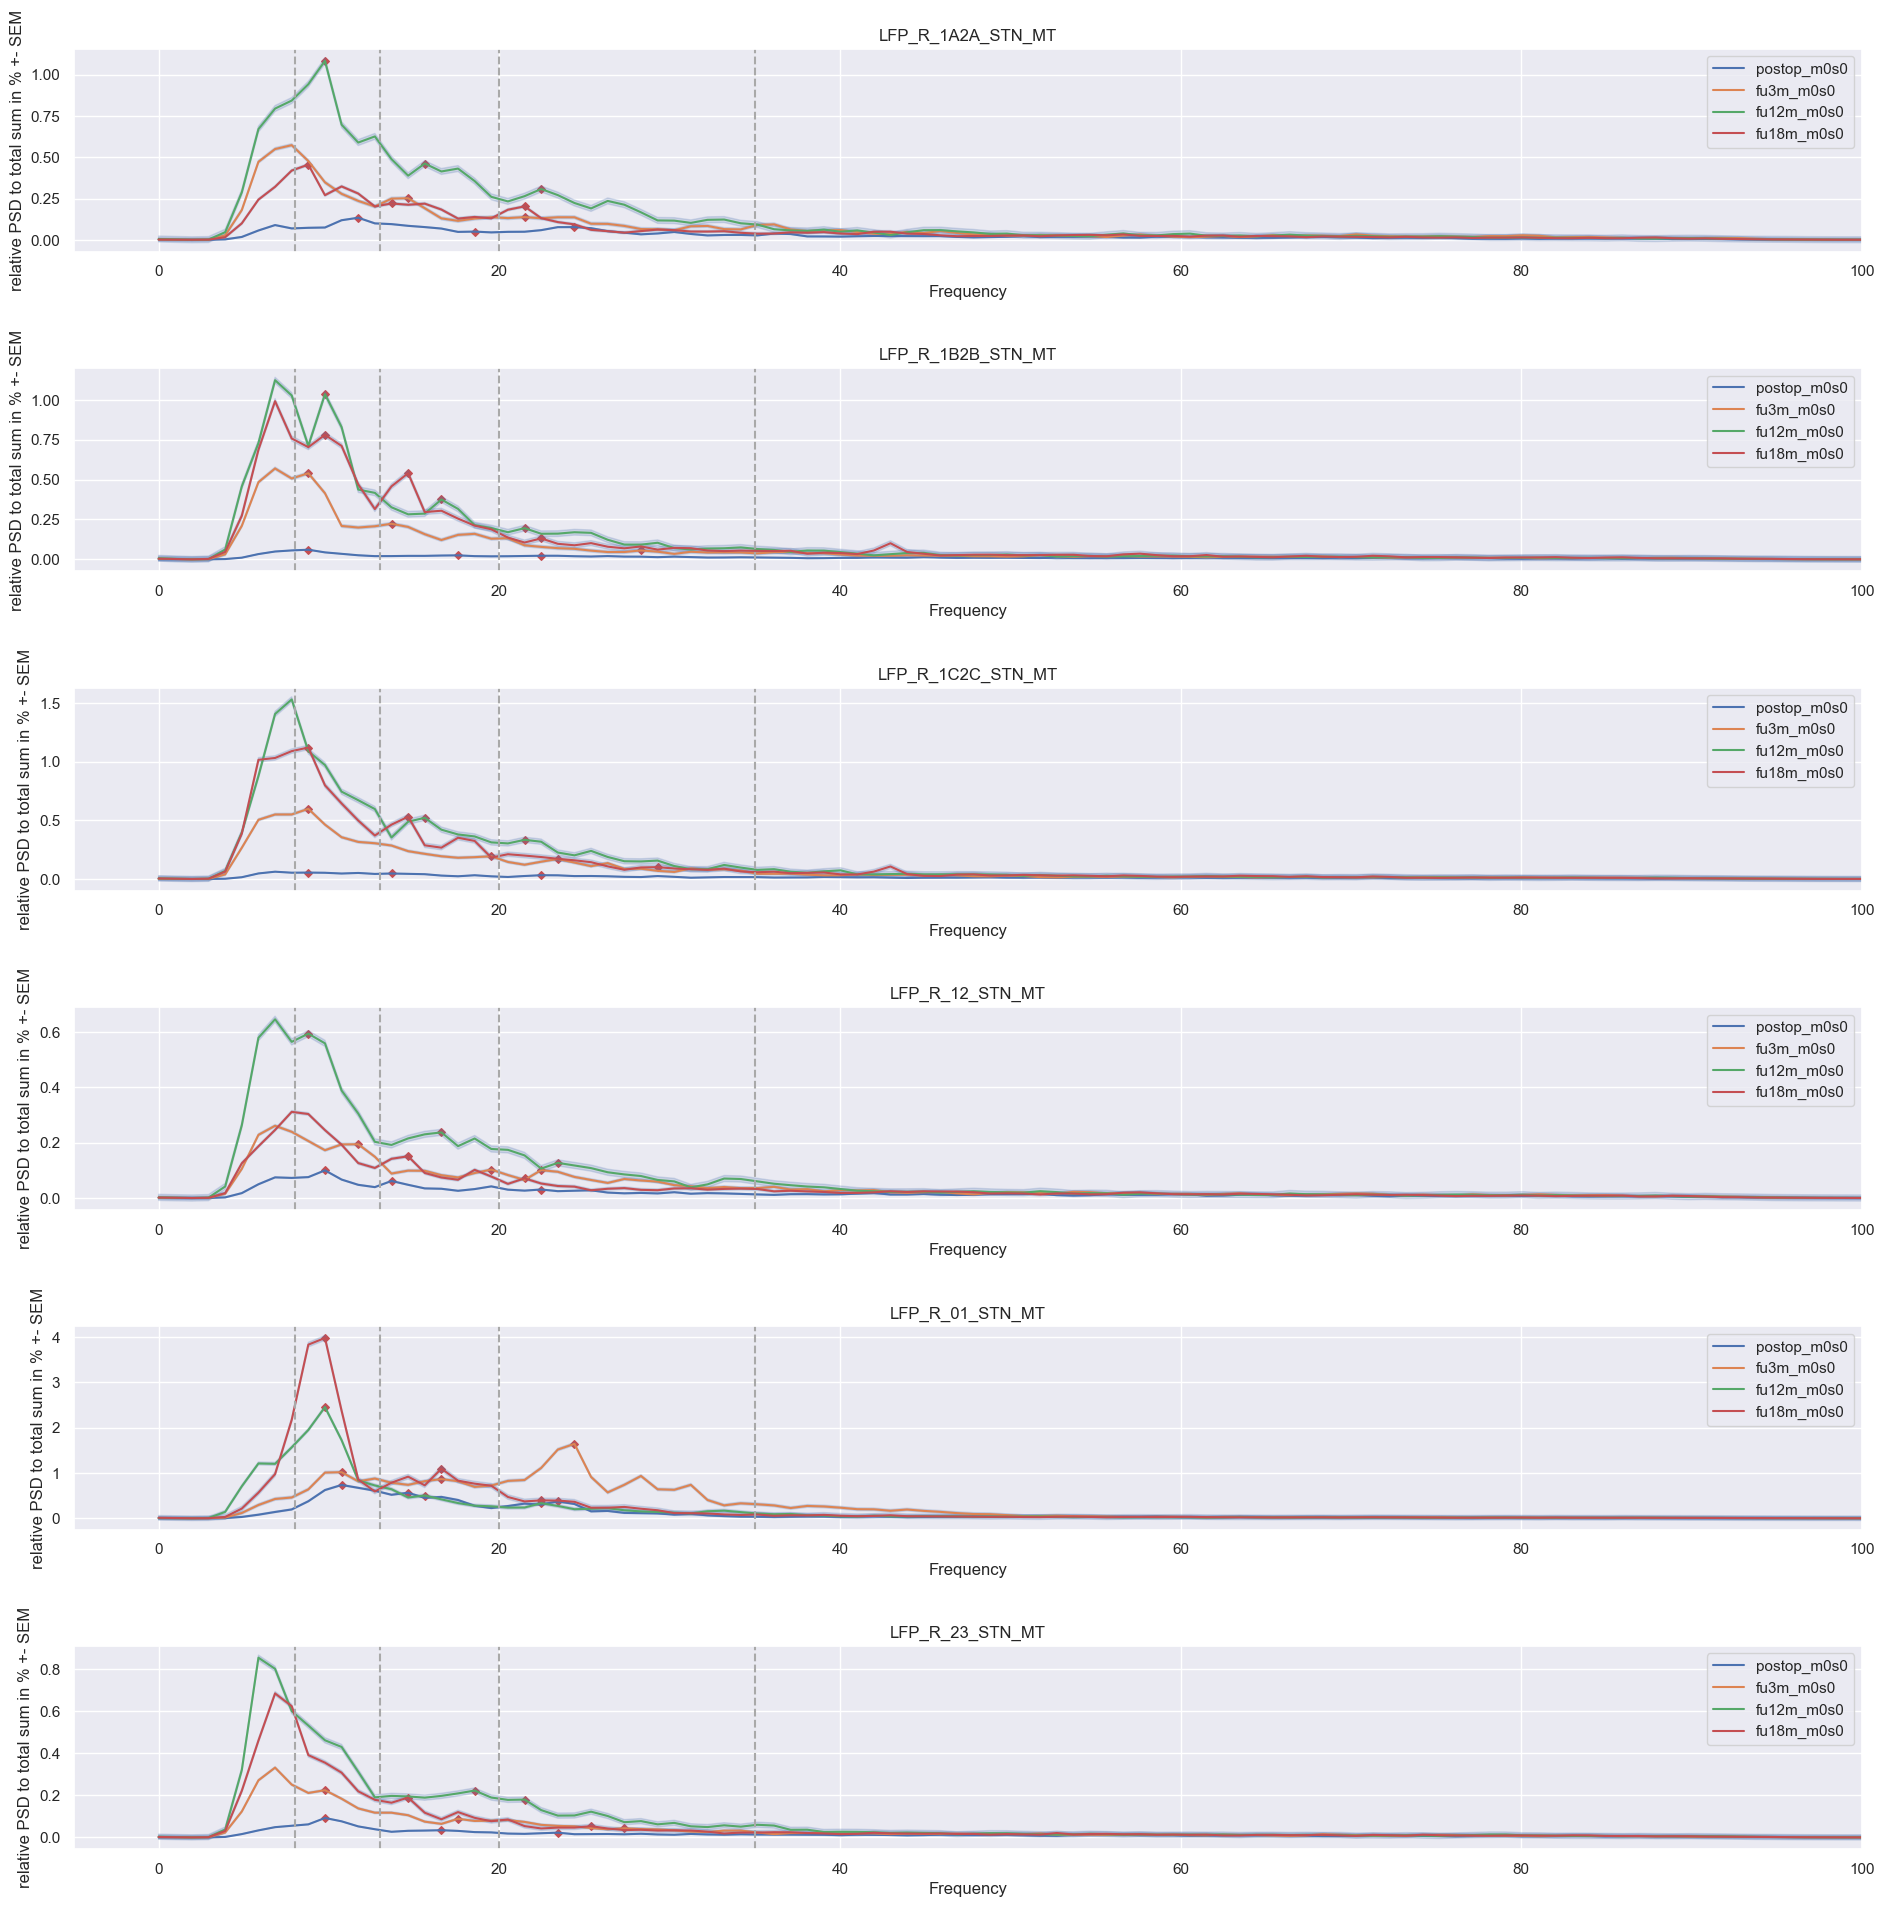

In [30]:
f_px_sub024 = absolutePsd.welch_absolutePsd_seperateChannels(
    incl_sub = "024", 
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition = ["m0s0"],
    tasks=['RestBSSuRingR', "RestBSSuSegmInterR", "RestBSSuSegmIntraR"],
    pickChannels = ['12', '01', '23', 
    '1A2A', '1B2B', '1C2C']
    )

# Troubleshooting:
# only works for certain channels at the same time.... 

### Normalized PSD

Calculate and plot normalized psd to total sum
- Butterworth Filter: 5th order, 5Hz High-pass filter
- using the method sklearn.preprocessing.normalize()

In [9]:
import analysis.BSSuRelativePsd as relPsd
importlib.reload(relPsd)

<module 'analysis.BSSuRelativePsd' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\analysis\\BSSuRelativePsd.py'>

Calculate and plot psd seperately per timepoint

Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618062900_1.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063200_4.mat
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063300_5.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063400_6.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063500_7.mat
Creating RawArray with float64 data, n_channels=3,

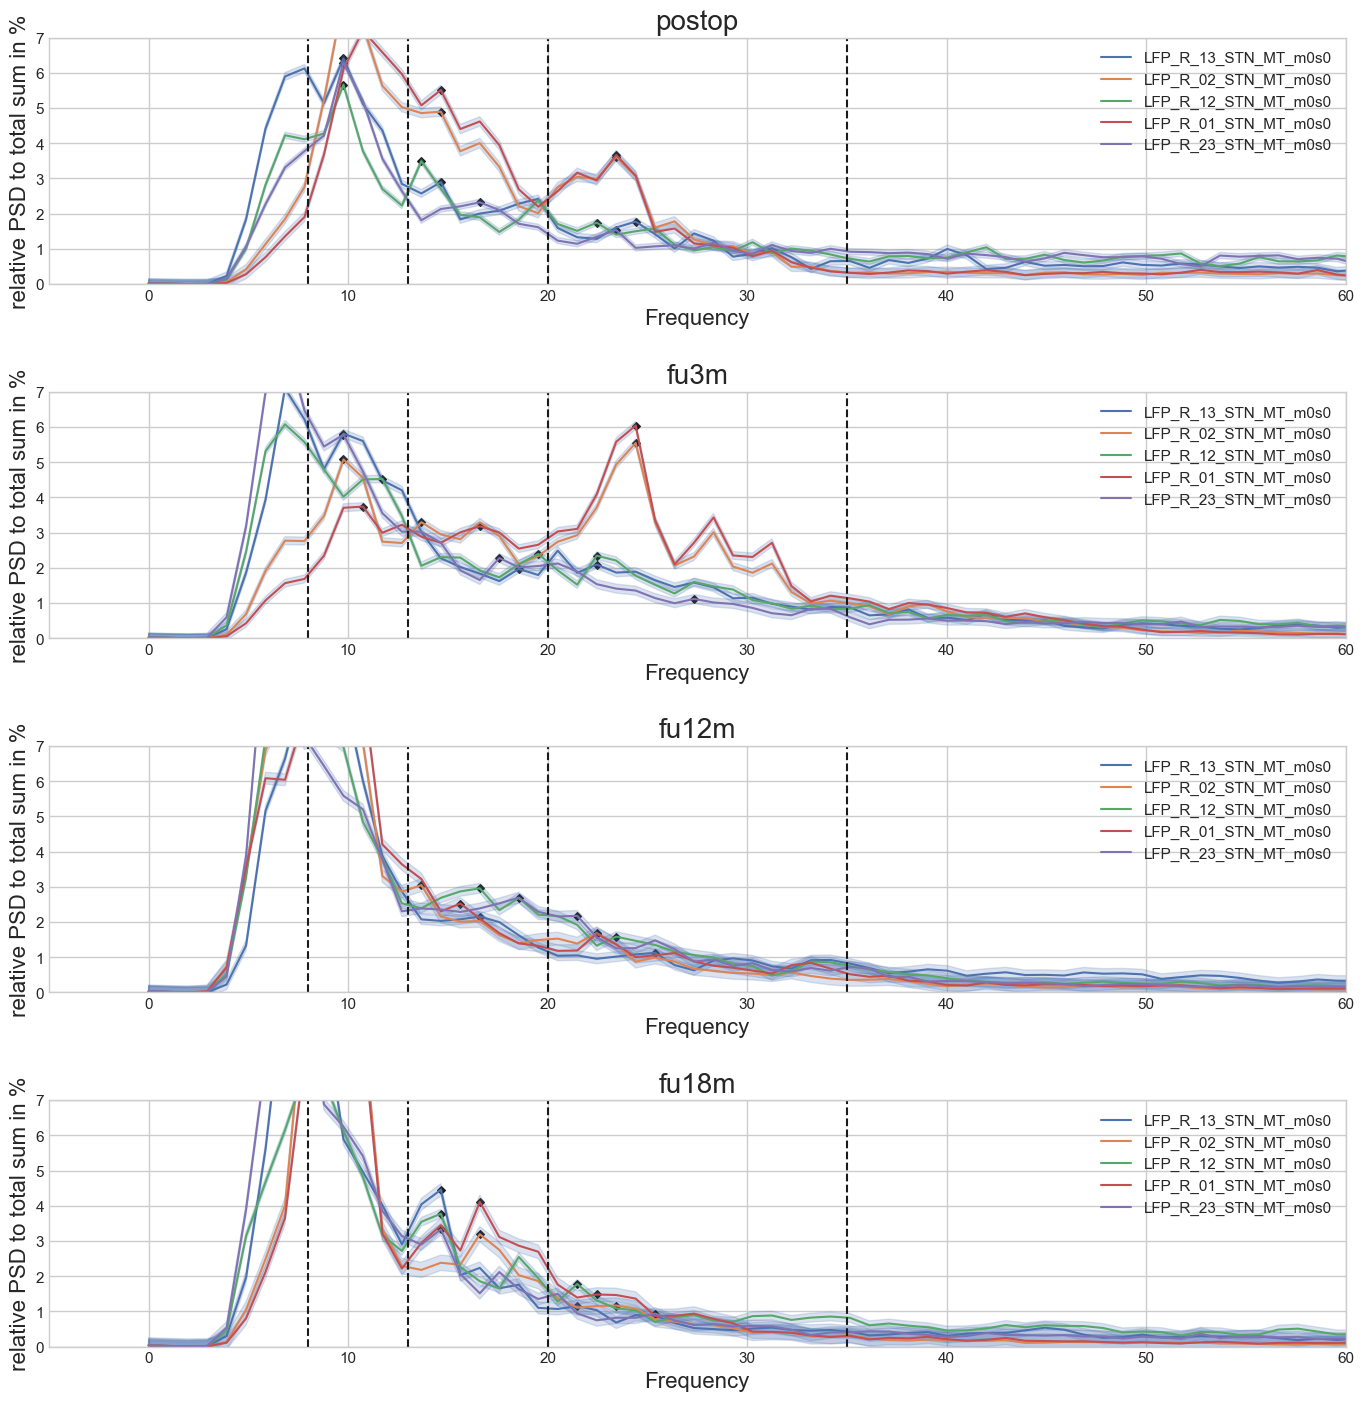

In [10]:
f_relPsd_024 = relPsd.welch_normalizedPsdToTotalSum_seperateTimepoints(
    incl_sub="024",
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition = ["m0s0"],
    tasks=['RestBSSuRingR', 'RestBSSuSegmIntraR', 'RestBSSuSegmInterR'],
    pickChannels= ['13', '02', '12', '01', '23'],
    hemisphere="Right"
)

# ['13', '02', '12', '01', '23', 
#     '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
#     '1A2A', '1B2B', '1C2C']

# Troubleshooting:
# Attribute Error e.g. if attribute "m1s0" doesn´t exist

Plot one channel over time
- apply 5Hz high-frequency Butterworth filter (fifth order)
- Welch´s method



In [ ]:
f_px_sub024 = psdm.perChannel_psd(
    incl_sub = "024", 
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    tasks=['RestBSSuRingR','RestBSSuSegmInterR', 'RestBSSuSegmIntraR'])

In [ ]:
import sklearn
from sklearn.preprocessing import normalize


X = np.array([1., -1.,  2.])
print(X)
X_2D = X.reshape(1,-1)
print(X_2D)
X_norm = normalize(X_2D, norm='l1')

X_1D = X_norm.reshape(-1,)

print(X_norm, X_1D)

### Matplotlib Plots from Dataframes

In [21]:
from analysis import BSSuRelativePsd, PeakPSD_frequency
import PerceiveImport.methods.find_folders as findfolders

importlib.reload(BSSuRelativePsd)
importlib.reload(PeakPSD_frequency)
importlib.reload(findfolders)

<module 'PerceiveImport.methods.find_folders' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\find_folders.py'>

Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618062900_1.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063200_4.mat
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063300_5.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063400_6.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063500_7.mat
Creating RawArray with float64 data, n_channels=3,

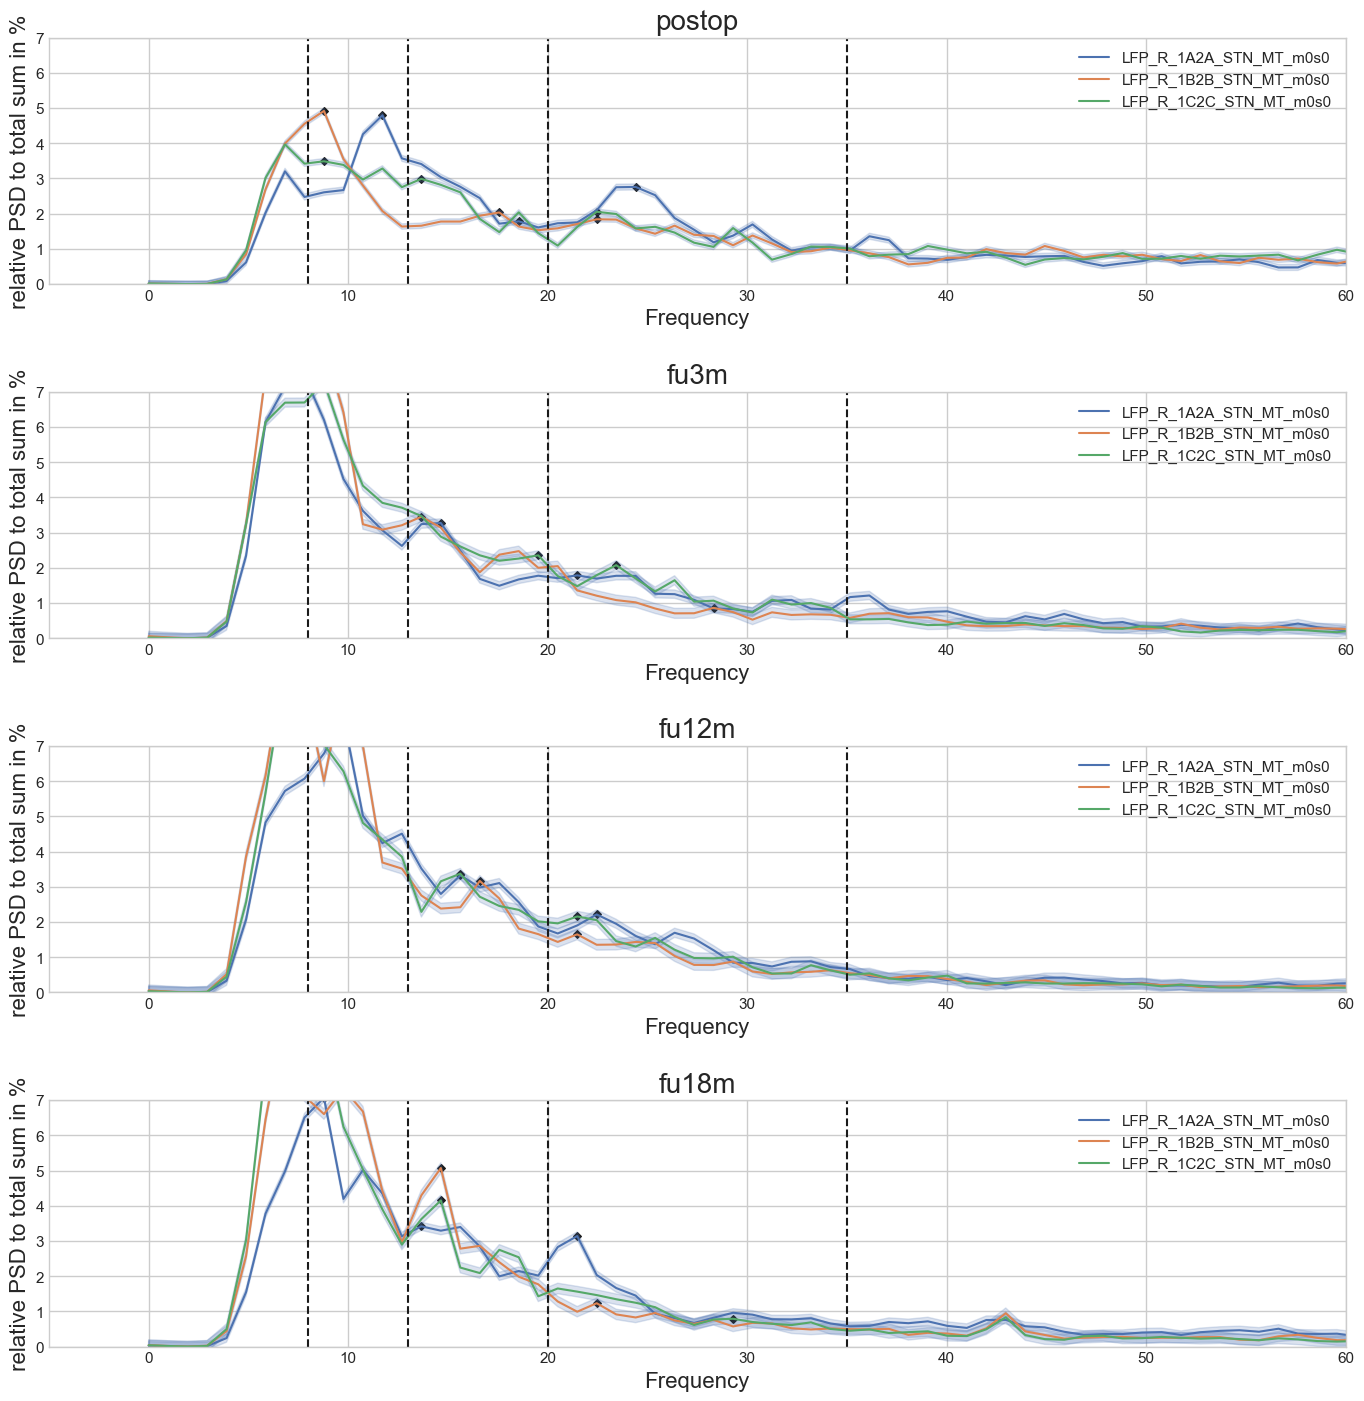

In [25]:
f_relPsd_024 = relPsd.welch_normalizedPsdToTotalSum_seperateTimepoints(
    incl_sub="024",
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition = ["m0s0"],
    tasks=['RestBSSuRingR', 'RestBSSuSegmIntraR', 'RestBSSuSegmInterR'],
    pickChannels= ['1A2A', '1B2B', '1C2C'],
    hemisphere="Right")

# Troubleshooting:
# Attribute Error e.g. if attribute "m1s0" doesn´t exist


# ['13', '02', '12', '01', '23', 
#     '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
#     '1A2A', '1B2B', '1C2C']


In [10]:
allFrequencies = f_relPsd_024["frequenciesDataFrame"]
allRelPsd = f_relPsd_024["relativePsdDataFrame"]
allRelPsd


postop_LFP_R_13_STN_MT  postop_LFP_R_02_STN_MT  postop_LFP_R_12_STN_MT  \
0              2.512576e-02            1.429892e-02            1.493985e-02   
1              1.166134e-02            6.602096e-03            6.914238e-03   
2              1.316705e-04            4.348582e-05            8.902063e-05   
3              5.442322e-03            2.165511e-03            4.673761e-03   
4              2.308704e-01            5.684811e-02            1.328681e-01   
..                      ...                     ...                     ...   
124            1.204336e-10            2.744224e-11            2.257100e-10   
125            1.093088e-10            2.433034e-11            2.058884e-10   
126            1.018476e-10            2.224861e-11            1.924879e-10   
127            9.755433e-11            2.105294e-11            1.847366e-10   
128            4.807643e-11            1.033149e-11            9.109982e-11   

     postop_LFP_R_01_STN_MT  postop_LFP_R_23_STN_MT  postop_LFP_R_1A1B_STN_MT  \
0              1.701663e-02            1.677421e-02              1.399243e-02   
1              7.996833e-03            7.703816e-03              6.570524e-03   
2              2.995758e-05            1.186165e-04              4.984343e-05   
3              9.820960e-04            5.001860e-03              2.143467e-03   
4              3.058617e-02            1.483668e-01              4.814295e-02   
..                      ...                     ...                       ...   
124            3.095023e-11            2.461140e-10              9.422674e-11   
125            2.786919e-11            2.268174e-10              8.356562e-11   
126            2.580052e-11            2.137942e-10              7.639657e-11   
127            2.460925e-11            2.062698e-10              7.226416e-11   
128            1.211010e-11            1.019042e-10              3.545701e-11   

     postop_LFP_R_1B1C_STN_MT  postop_LFP_R_1A1C_STN_MT  \
0                1.183070e-02              9.245591e-03   
1                5.350828e-03              4.430948e-03   
2                6.199150e-05              6.815018e-05   
3                2.770348e-03              2.006856e-03   
4                6.806325e-02              6.024563e-02   
..                        ...                       ...   
124              1.437784e-10              1.836099e-10   
125              1.315309e-10              1.679988e-10   
126              1.233117e-10              1.574822e-10   
127              1.185799e-10              1.514121e-10   
128              5.851739e-11              7.471370e-11   

     postop_LFP_R_2A2B_STN_MT  postop_LFP_R_2B2C_STN_MT  ...  \
0                1.615391e-02              1.593575e-02  ...   
1                7.169939e-03              7.252583e-03  ...   
2                1.570875e-04              1.028462e-04  ...   
3                6.725439e-03              3.389021e-03  ...   
4                2.042679e-01              1.210049e-01  ...   
..                        ...                       ...  ...   
124              2.118238e-10              1.410035e-10  ...   
125              1.939257e-10              1.219980e-10  ...   
126              1.818890e-10              1.092566e-10  ...   
127              1.749506e-10              1.019276e-10  ...   
128              8.634183e-11              4.976780e-11  ...   

     fu18m_LFP_R_23_STN_MT  fu18m_LFP_R_1A1B_STN_MT  fu18m_LFP_R_1B1C_STN_MT  \
0             3.388748e-02             2.292648e-02             1.640946e-02   
1             1.477470e-02             1.029744e-02             7.470866e-03   
2             4.799298e-04             1.859845e-04             1.404669e-04   
3             1.745800e-02             5.499707e-03             5.307893e-03   
4             5.382623e-01             1.406329e-01             1.557183e-01   
..                     ...                      ...                      ...   
124           5.280732e-11             1.5173

In [26]:
highestPEAKDF = f_relPsd_024["highestPEAK"]
highestPEAKDF

session     bipolarChannel  \
postop_LFP_R_1A2A_STN_MT_highestPEAK_alpha     postop  LFP_R_1A2A_STN_MT   
postop_LFP_R_1A2A_STN_MT_highestPEAK_lowBeta   postop  LFP_R_1A2A_STN_MT   
postop_LFP_R_1A2A_STN_MT_highestPEAK_highBeta  postop  LFP_R_1A2A_STN_MT   
postop_LFP_R_1B2B_STN_MT_highestPEAK_alpha     postop  LFP_R_1B2B_STN_MT   
postop_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta   postop  LFP_R_1B2B_STN_MT   
postop_LFP_R_1B2B_STN_MT_highestPEAK_highBeta  postop  LFP_R_1B2B_STN_MT   
postop_LFP_R_1C2C_STN_MT_highestPEAK_alpha     postop  LFP_R_1C2C_STN_MT   
postop_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta   postop  LFP_R_1C2C_STN_MT   
postop_LFP_R_1C2C_STN_MT_highestPEAK_highBeta  postop  LFP_R_1C2C_STN_MT   
fu3m_LFP_R_1A2A_STN_MT_highestPEAK_lowBeta       fu3m  LFP_R_1A2A_STN_MT   
fu3m_LFP_R_1A2A_STN_MT_highestPEAK_highBeta      fu3m  LFP_R_1A2A_STN_MT   
fu3m_LFP_R_1B2B_STN_MT_highestPEAK_alpha         fu3m  LFP_R_1B2B_STN_MT   
fu3m_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta       fu3m  LFP_R_1B2B_STN_MT   
fu3m_LFP_R_1B2B_STN_MT_highestPEAK_highBeta      fu3m  LFP_R_1B2B_STN_MT   
fu3m_LFP_R_1C2C_STN_MT_highestPEAK_alpha         fu3m  LFP_R_1C2C_STN_MT   
fu3m_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta       fu3m  LFP_R_1C2C_STN_MT   
fu3m_LFP_R_1C2C_STN_MT_highestPEAK_highBeta      fu3m  LFP_R_1C2C_STN_MT   
fu12m_LFP_R_1A2A_STN_MT_highestPEAK_alpha       fu12m  LFP_R_1A2A_STN_MT   
fu12m_LFP_R_1A2A_STN_MT_highestPEAK_lowBeta     fu12m  LFP_R_1A2A_STN_MT   
fu12m_LFP_R_1A2A_STN_MT_highestPEAK_highBeta    fu12m  LFP_R_1A2A_STN_MT   
fu12m_LFP_R_1B2B_STN_MT_highestPEAK_alpha       fu12m  LFP_R_1B2B_STN_MT   
fu12m_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta     fu12m  LFP_R_1B2B_STN_MT   
fu12m_LFP_R_1B2B_STN_MT_highestPEAK_highBeta    fu12m  LFP_R_1B2B_STN_MT   
fu12m_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta     fu12m  LFP_R_1C2C_STN_MT   
fu12m_LFP_R_1C2C_STN_MT_highestPEAK_highBeta    fu12m  LFP_R_1C2C_STN_MT   
fu18m_LFP_R_1A2A_STN_MT_highestPEAK_alpha       fu18m  LFP_R_1A2A_STN_MT   
fu18m_LFP_R_1A2A_STN_MT_highestPEAK_lowBeta     fu18m  LFP_R_1A2A_STN_MT   
fu18m_LFP_R_1A2A_STN_MT_highestPEAK_highBeta    fu18m  LFP_R_1A2A_STN_MT   
fu18m_LFP_R_1B2B_STN_MT_highestPEAK_alpha       fu18m  LFP_R_1B2B_STN_MT   
fu18m_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta     fu18m  LFP_R_1B2B_STN_MT   
fu18m_LFP_R_1B2B_STN_MT_highestPEAK_highBeta    fu18m  LFP_R_1B2B_STN_MT   
fu18m_LFP_R_1C2C_STN_MT_highestPEAK_alpha       fu18m  LFP_R_1C2C_STN_MT   
fu18m_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta     fu18m  LFP_R_1C2C_STN_MT   
fu18m_LFP_R_1C2C_STN_MT_highestPEAK_highBeta    fu18m  LFP_R_1C2C_STN_MT   

                                              frequencyBand PEAK_frequency  \
postop_LFP_R_1A2A_STN_MT_highestPEAK_alpha            alpha       11.71875   
postop_LFP_R_1A2A_STN_MT_highestPEAK_lowBeta        lowBeta      18.554688   
postop_LFP_R_1A2A_STN_MT_highestPEAK_highBeta      highBeta      24.414062   
postop_LFP_R_1B2B_STN_MT_highestPEAK_alpha            alpha       8.789062   
postop_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta        lowBeta      17.578125   
postop_LFP_R_1B2B_STN_MT_highestPEAK_highBeta      highBeta      22.460938   
postop_LFP_R_1C2C_STN_MT_highestPEAK_alpha            alpha       8.789062   
postop_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta        lowBeta      13.671875   
postop_LFP_R_1C2C_STN_MT_highestPEAK_highBeta      highBeta      22.460938   
fu3m_LFP_R_1A2A_STN_MT_highestPEAK_lowBeta          lowBeta      14.648438   
fu3m_LFP_R_1A2A_STN_MT_highestPEAK_highBeta        highBeta      21.484375   
fu3m_LFP_R_1B2B_STN_MT_highestPEAK_alpha              alpha       8.789062   
fu3m_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta          lowBeta      13.671875   
fu3m_LFP_R_1B2B_STN_MT_highestPEAK_highBeta        highBeta      28.320312   
fu3m_LFP_R_1C2C_STN_MT_highestPEAK_alpha              alpha       8.789062   
fu3m_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta          lowBeta       19.53125   
fu3m_LFP_R_1C2C_STN_MT_highestPEAK_highBeta        highBeta

In [117]:
highestPEAKDF[highestPEAKDF.index.str.contains("_03_")]

session   bipolarChannel  \
postop_LFP_R_03_STN_MT_highestPEAK_alpha     postop  LFP_R_03_STN_MT   
postop_LFP_R_03_STN_MT_highestPEAK_lowBeta   postop  LFP_R_03_STN_MT   
postop_LFP_R_03_STN_MT_highestPEAK_highBeta  postop  LFP_R_03_STN_MT   
fu3m_LFP_R_03_STN_MT_highestPEAK_alpha         fu3m  LFP_R_03_STN_MT   
fu3m_LFP_R_03_STN_MT_highestPEAK_lowBeta       fu3m  LFP_R_03_STN_MT   
fu3m_LFP_R_03_STN_MT_highestPEAK_highBeta      fu3m  LFP_R_03_STN_MT   
fu12m_LFP_R_03_STN_MT_highestPEAK_alpha       fu12m  LFP_R_03_STN_MT   
fu12m_LFP_R_03_STN_MT_highestPEAK_highBeta    fu12m  LFP_R_03_STN_MT   
fu18m_LFP_R_03_STN_MT_highestPEAK_alpha       fu18m  LFP_R_03_STN_MT   
fu18m_LFP_R_03_STN_MT_highestPEAK_lowBeta     fu18m  LFP_R_03_STN_MT   
fu18m_LFP_R_03_STN_MT_highestPEAK_highBeta    fu18m  LFP_R_03_STN_MT   

                                            frequencyBand PEAK_frequency  \
postop_LFP_R_03_STN_MT_highestPEAK_alpha            alpha       9.765625   
postop_LFP_R_03_STN_MT_highestPEAK_lowBeta        lowBeta      14.648438   
postop_LFP_R_03_STN_MT_highestPEAK_highBeta      highBeta        23.4375   
fu3m_LFP_R_03_STN_MT_highestPEAK_alpha              alpha       9.765625   
fu3m_LFP_R_03_STN_MT_highestPEAK_lowBeta          lowBeta      16.601562   
fu3m_LFP_R_03_STN_MT_highestPEAK_highBeta        highBeta      24.414062   
fu12m_LFP_R_03_STN_MT_highestPEAK_alpha             alpha       8.789062   
fu12m_LFP_R_03_STN_MT_highestPEAK_highBeta       highBeta      22.460938   
fu18m_LFP_R_03_STN_MT_highestPEAK_alpha             alpha       8.789062   
fu18m_LFP_R_03_STN_MT_highestPEAK_lowBeta         lowBeta      16.601562   
fu18m_LFP_R_03_STN_MT_highestPEAK_highBeta       highBeta        23.4375   

                                            PEAK_relativePSD  
postop_LFP_R_03_STN_MT_highestPEAK_alpha            6.275342  
postop_LFP_R_03_STN_MT_highestPEAK_lowBeta          4.596741  
postop_LFP_R_03_STN_MT_highestPEAK_highBeta         4.041946  
fu3m_LFP_R_03_STN_MT_highestPEAK_alpha               5.11248  
fu3m_LFP_R_03_STN_MT_highestPEAK_lowBeta            3.042812  
fu3m_LFP_R_03_STN_MT_highestPEAK_highBeta           5.666984  
fu12m_LFP_R_03_STN_MT_highestPEAK_alpha             13.61207  
fu12m_LFP_R_03_STN_MT_highestPEAK_highBeta          1.371526  
fu18m_LFP_R_03_STN_MT_highestPEAK_alpha            20.376622  
fu18m_LFP_R_03_STN_MT_highestPEAK_lowBeta           2.578137  
fu18m_LFP_R_03_STN_MT_highestPEAK_highBeta          1.033017

c:\Users\jebe12\Research\Longterm_beta_project\figures\sub-024


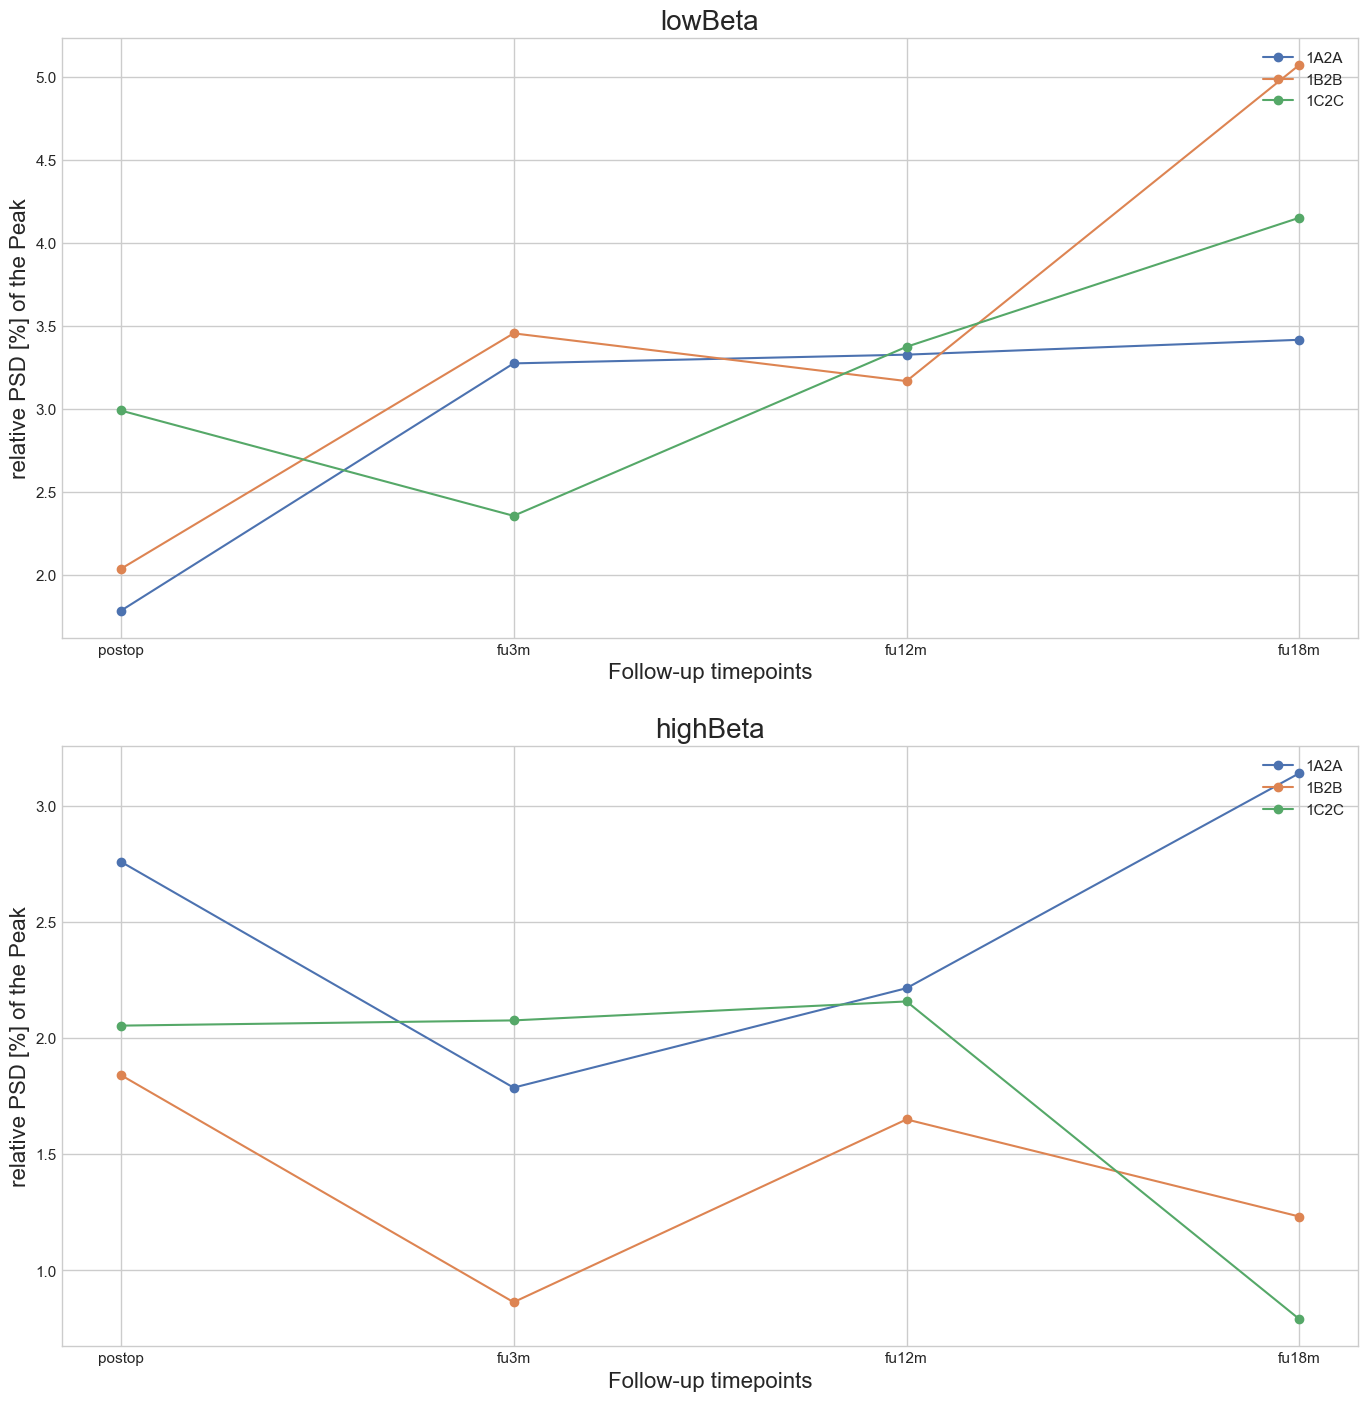

In [27]:
highest_Peak_Psd = PeakPSD_frequency.highestPeakValues(
    incl_sub = "024",
    hemisphere = "Right",
    frequencyBands = ["lowBeta", "highBeta"],
    pickChannels = ['1A2A', '1B2B', '1C2C'],
    highestPeakDataframe = highestPEAKDF,
    PeakAttribute = "PeakPsd"
)

# ['13', '02', '12', '01', '23', 
#     '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
#     '1A2A', '1B2B', '1C2C']

### Plotly Plots from Dataframes
- plot the highest Peak PSD values (normalized to total sum..) 
- seperately in lowBeta and highBeta band
- for each channel over time
- plot updrs scores in the background of this plot

In [36]:

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# get Dataframe for each frequency band

frequencyBand = ["alpha", "lowBeta", "highBeta"]
channel = ['13', '02', '12', '01', '23', 
    '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
    '1A2A', '1B2B', '1C2C']

chan_freq_dict = {}

# frequency band dataframes: contain filtered Dataframes only of the selected frequency band
# highestPeakAlpha = highestPEAKDF[highestPEAKDF.index.str.contains("alpha")]
# highestPeakLowBeta = highestPEAKDF[highestPEAKDF.index.str.contains("lowBeta")]
# highestPeakHighBeta = highestPEAKDF[highestPEAKDF.index.str.contains("highBeta")]

fig = make_subplots(rows=len(frequencyBand), cols=1, subplot_titles=("alpha", "lowBeta", "highBeta"))

for f, freq in enumerate(frequencyBand):

    for c, chan in enumerate(channel):

        Dataframe_perChannelAndFrequency = highestPEAKDF[highestPEAKDF.index.str.contains(f"{chan}.*{freq}")] # select only rows containing the right channel and frequency band
        session = Dataframe_perChannelAndFrequency["session"]
        PeakFrequency = Dataframe_perChannelAndFrequency["PEAK_frequency"]
        PeakrelPSD = Dataframe_perChannelAndFrequency["PEAK_relativePSD"]

        # store filtered Dataframe of each channel and frequency band
        chan_freq_dict[f"{freq}_{chan}"] = Dataframe_perChannelAndFrequency # select only rows containing the right channel and frequency band

      
        fig.add_traces(go.Scatter(
            x=session.astype(dtype=str), 
            y=PeakFrequency,
            mode="lines",
            name=f"{freq}_{chan}", 
            text="Peak frequency in Hz",
            row= f,
            column=1))
    

        fig.update_layout({"title": f'{freq}_Peak frequency over time',
                        "xaxis": {"title":"Follow-Up dates"},
                        "yaxis": {"title":"Peak frequency"},
                        "showlegend": True},
                        )

#fig.write_image("PeakFrequencyOverTime.png",format="png", width=1000, height=600, scale=3)

fig.show()



ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'row'

Did you mean "dx"?

    Valid properties:
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        fillpattern
            Sets the pattern within the marker.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant when `stackgroup` is used, and only the
            first `orientation` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the stacking direction. With "v"
            ("h"), the y (x) values of subsequent traces are added.
            Also affects the default value of `fill`.
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "dx"?

Bad property path:
row
^^^

In [ ]:
# average Peak psd around +- 2Hz of peak frequency



In [95]:
# restructure Dataframe, if Channelnames are columns

incl_sessions = ["postop", "fu3m", "fu12m", "fu18m"]
channel = ['13', '02', '12', '01', '23', 
    '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
    '1A2A', '1B2B', '1C2C']

# frequency band dictionary: for all channels at different timepoints 
highestPeakAlpha_dict = {}
highestPeakLowBeta_dict = {}
highestPeakHighBeta_dict = {}

for c, chan in enumerate(channel):

    # store in each frequency band dictionary: keys = channelnames, values = Dataframe with Peakvalues of each timepoint
    highestPeakAlpha_dict[f"{chan}"] =  highestPEAKDF.loc[:, highestPEAKDF.columns.str.contains(f"{chan}.*alpha")]
    highestPeakLowBeta_dict[f"{chan}"] =  highestPEAKDF.loc[:, highestPEAKDF.columns.str.contains(f"{chan}.*lowBeta")]
    highestPeakHighBeta_dict[f"{chan}"] =  highestPEAKDF.loc[:, highestPEAKDF.columns.str.contains(f"{chan}.*highBeta")]

# postop = highestPEAKDF.filter(like="alpha")


In [102]:
DataFrame13 = highestPeakHighBeta_dict["13"]
DataFrame13.loc[["PEAK_relativePSD"]]

postop_LFP_R_13_STN_MT_highestPEAK_highBeta  \
PEAK_relativePSD                                     1.774502   

                  fu3m_LFP_R_13_STN_MT_highestPEAK_highBeta  \
PEAK_relativePSD                                   2.093283   

                  fu12m_LFP_R_13_STN_MT_highestPEAK_highBeta  \
PEAK_relativePSD                                    1.122993   

                  fu18m_LFP_R_13_STN_MT_highestPEAK_highBeta  
PEAK_relativePSD                                    1.149052

In [101]:
import plotly.express as px
import plotly.graph_objs as go


fig = go.Figure(data=go.Scatter(x=DataFrame13.columns.astype(dtype=str), 
                    y=DataFrame13.loc[['PEAK_relativePSD']],
                    marker_color='indianred', text="counts"))
                    
fig.update_layout({"title": 'Peak psd over time',
                "xaxis": {"title":"Follow-Up dates"},
                "yaxis": {"title":"Peak frequency in the high beta band"},
                "showlegend": True})

#fig.write_image("PeakFrequencyOverTime.png",format="png", width=1000, height=600, scale=3)

fig.show()

KeyError: "None of [Index(['PEAK_relativePSD'], dtype='object')] are in the [index]"

Transpose Dataframe because Plotly only plots columns, not rows

In [67]:
# swap columns and rows 
highestPEAKDF = highestPEAKDF.transpose()
highestPEAKDF

PEAK_frequency  PEAK_relativePSD
postop_LFP_R_13_STN_MT_highestPEAK_alpha            9.765625          6.407399
postop_LFP_R_13_STN_MT_highestPEAK_lowBeta         14.648438          2.894907
postop_LFP_R_13_STN_MT_highestPEAK_highBeta        24.414062          1.774502
postop_LFP_R_02_STN_MT_highestPEAK_alpha            9.765625          8.158297
postop_LFP_R_02_STN_MT_highestPEAK_lowBeta         14.648438          4.896383
...                                                      ...               ...
fu18m_LFP_R_1B2B_STN_MT_highestPEAK_lowBeta        14.648438          5.070866
fu18m_LFP_R_1B2B_STN_MT_highestPEAK_highBeta       22.460938          1.231543
fu18m_LFP_R_1C2C_STN_MT_highestPEAK_alpha           8.789062          8.761958
fu18m_LFP_R_1C2C_STN_MT_highestPEAK_lowBeta        14.648438          4.150070
fu18m_LFP_R_1C2C_STN_MT_highestPEAK_highBeta       29.296875          0.789868

[154 rows x 2 columns]

In [80]:
highestPEAKDF[highestPEAKDF.index.str.contains("13")]

PEAK_frequency  PEAK_relativePSD
postop_LFP_R_13_STN_MT_highestPEAK_alpha           9.765625          6.407399
postop_LFP_R_13_STN_MT_highestPEAK_lowBeta        14.648438          2.894907
postop_LFP_R_13_STN_MT_highestPEAK_highBeta       24.414062          1.774502
fu3m_LFP_R_13_STN_MT_highestPEAK_alpha             9.765625          5.813192
fu3m_LFP_R_13_STN_MT_highestPEAK_lowBeta          18.554688          1.968418
fu3m_LFP_R_13_STN_MT_highestPEAK_highBeta         22.460938          2.093283
fu12m_LFP_R_13_STN_MT_highestPEAK_alpha            8.789062          9.167656
fu12m_LFP_R_13_STN_MT_highestPEAK_lowBeta         16.601562          2.155337
fu12m_LFP_R_13_STN_MT_highestPEAK_highBeta        25.390625          1.122993
fu18m_LFP_R_13_STN_MT_highestPEAK_lowBeta         14.648438          4.453562
fu18m_LFP_R_13_STN_MT_highestPEAK_highBeta        21.484375          1.149052

In [82]:
# restructure Dataframe, if Channelnames are rownames

incl_sessions = ["postop", "fu3m", "fu12m", "fu18m"]
channel = ['13', '02', '12', '01', '23', 
    '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
    '1A2A', '1B2B', '1C2C']

# frequency band dictionary: for all channels at different timepoints 
highestPeakAlpha_dict = {}
highestPeakLowBeta_dict = {}
highestPeakHighBeta_dict = {}

for c, chan in enumerate(channel):

    # store in each frequency band dictionary: keys = channelnames, values = Dataframe with Peakvalues of each timepoint
    highestPeakAlpha_dict[f"{chan}"] =  highestPEAKDF[highestPEAKDF.index.str.contains(f"{chan}.*alpha")]
    highestPeakLowBeta_dict[f"{chan}"] =  highestPEAKDF[highestPEAKDF.index.str.contains(f"{chan}.*lowBeta")]
    highestPeakHighBeta_dict[f"{chan}"] =  highestPEAKDF[highestPEAKDF.index.str.contains(f"{chan}.*highBeta")]



Plot only highest Peaks of each frequency band
- compare one channel over time
- compare all channels over each timepoint

In [92]:
DataFrame13 = highestPeakHighBeta_dict['13']
DataFrame13

PEAK_frequency  PEAK_relativePSD
postop_LFP_R_13_STN_MT_highestPEAK_highBeta       24.414062          1.774502
fu3m_LFP_R_13_STN_MT_highestPEAK_highBeta         22.460938          2.093283
fu12m_LFP_R_13_STN_MT_highestPEAK_highBeta        25.390625          1.122993
fu18m_LFP_R_13_STN_MT_highestPEAK_highBeta        21.484375          1.149052

In [93]:
import plotly.express as px
import plotly.graph_objs as go


fig = go.Figure(data=go.Scatter(x=DataFrame13.index.astype(dtype=str), 
                    y=DataFrame13['PEAK_relativePSD'],
                    marker_color='indianred', text="counts"))
                    
fig.update_layout({"title": 'Peak psd over time',
                "xaxis": {"title":"Follow-Up dates"},
                "yaxis": {"title":"Peak frequency in the high beta band"},
                
                "showlegend": True})

#fig.write_image("PeakFrequencyOverTime.png",format="png", width=1000, height=600, scale=3)

fig.show()

Mark the highest PEAK of each Power Spectrum
- within each frequency band: 8-12 Hz, 13-20 Hz, 21-35 Hz
- save the highest Peaks (frequency and relative PSD) in an array
- rank which bipolar recording presents the highest beta peak 

### Perform FOOOF (Fit Outliers of Oscillation frequency) to seperate periodic and aperiodic components of the power spectrum
- install FOOOF via conda
$ conda install -c conda-forge fooof

In [11]:
import fooof
import PerceiveImport.classes.main_class as mainclass

In [12]:
# load the data
raw_sub024 = mainclass.PerceiveData(
    sub = "024",
    incl_modalities= ["survey"],
    incl_session= ["postop","fu3m","fu12m","fu18m"],
    incl_condition=["m0s0"],
    incl_task= ["rest"]
)



Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618062900_1.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063200_4.mat
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063300_5.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063400_6.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063500_7.mat
Creating RawArray with float64 data, n_channels=3,

In [13]:

sub024_postop_RingR = raw_sub024.survey.postop.m0s0.rest.data['RestBSSuRingR']
data=sub024_postop_RingR.get_data()

LFP_Stn_R_03 = data[0]

In [55]:
# Set the parameters for FOOOF
sampling_rate = 250  # Sampling rate of the LFP signal
fmin = 1  # Lower frequency limit for the power spectrum
fmax = 100  # Upper frequency limit for the power spectrum

# Calculate the power spectrum of the LFP signal using FOOOF
fooof_model = fooof.FOOOF(max_n_peaks=5, min_peak_height=0.1)
fooof_model.fit(sampling_rate, LFP_Stn_R_03, fmin, fmax)

# Get the periodic and aperiodic components of the power spectrum
periodic_component = fooof_model.background_params_
aperiodic_component = fooof_model.aperiodic_params_

# Plot the power spectrum and its components
plt.plot(fooof_model.freqs_, fooof_model.power_spectrum_, label="Power spectrum")
plt.plot(fooof_model.freqs_, periodic_component, label="Periodic component")
plt.plot(fooof_model.freqs_, aperiodic_component, label="Aperiodic component")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.show()

TypeError: FOOOF.fit() takes from 1 to 4 positional arguments but 5 were given

### Plotting based on matplotlib and mne

In [11]:
# Matplotlib: set the style
plt.style.use('seaborn-whitegrid')

# "classic"

In [12]:
# used in Python Notebooks
%matplotlib inline 

# %matplotlib inline will lead to static images of your plot embedded within the notebook

In [13]:
# this gets the attribute fu3m from the modality class with modality=survey
sessionclass = getattr(sub024.survey, 'fu3m') 

In [14]:
# the attribute from .data from the task class is a dictionary with keys named after each task. 
data = sessionclass.m0s0.rest.data
data["RestBSSuRingR"].ch_names


['LFP_Stn_R_03',
 'LFP_Stn_R_13',
 'LFP_Stn_R_02',
 'LFP_Stn_R_12',
 'LFP_Stn_R_01',
 'LFP_Stn_R_23']

In [15]:
data = sub024.survey.fu3m.m0s0.rest.data
data

{'RestBSSuRingL': <RawArray | 6 x 5288 (21.1 s), ~259 kB, data loaded>,
 'RestBSSuSegmIntraL': <RawArray | 6 x 5288 (21.1 s), ~259 kB, data loaded>,
 'RestBSSuSegmInterL': <RawArray | 3 x 5250 (21.0 s), ~131 kB, data loaded>,
 'RestBSSuRingR': <RawArray | 6 x 5288 (21.1 s), ~259 kB, data loaded>,
 'RestBSSuSegmIntraR': <RawArray | 6 x 5288 (21.1 s), ~259 kB, data loaded>,
 'RestBSSuSegmInterR': <RawArray | 3 x 5188 (20.7 s), ~130 kB, data loaded>}

Figure of one Hemisphere 
- 3 columns: 'RestBSSuRing', 'RestBSSuSegmInter', RestBSSuSegmIntra'
- rows: number of channels (3 or 6)
- Plot per channel: PSD of each session timepoint

In [104]:


# time_points = ['postop', 'fu3m', 'fu12m', 'fu18m']
# task_contact = ['RestBSSuRingR', 'RestBSSuSegmInterR']

# # create grid for plots: 
# # fig = plt.figure() -> figure is an instance of a single container containing all objects representing axes, graphics, text and labels    
# # axes = plt.axes() -> axes is a box which will contain the plot
# for tk, task in enumerate(task_contact):

#     fig, axes = plt.subplots(len(data[task_contact[tk]].ch_names), 1, figsize=(20, 20)) # rows as many as channels, 1 column
#     fig.tight_layout(pad=5.0)


#     for t, tp in enumerate(time_points):

#         temp_data = getattr(sub024.survey, tp) # gets attribute e.g. of tp "postop" from modality_class with modality set to survey
#         temp_data = temp_data.m0s0.rest.data[task_contact[tk]] # gets the mne loaded data from the perceive .mat BSSu, m0s0 file with task "RestBSSuRingR"

#         # sample frequency: 250 Hz
#         fs = temp_data.info['sfreq']

#         # channel names 
#         ch_names = temp_data.info.ch_names

#         # make a plot for each channel of each timepoint
#         for i, ch in enumerate(ch_names):

#             # create a signal using welch'method
#             # .get_data() gets time series data as an array, [i, :] only gets the row with index i, e.g. index=0 gives time series data of 1st channel "LFP_Stn_R_03"
#             f, px = signal.welch(temp_data.get_data()[i, :], fs)  # Returns: f=array of sample frequencies, px= psd or power spectrum of x (amplitude)

#             # axes in row number of channel index, and column number of task index
#             axes[i].set_title(ch) # the title of each plot is set to the channel e.g. "LFP_Stn_R_03"
#             axes[i].plot(f, px, label=tp)
#             # axes[i].psd(temp_data.get_data()[i, :], Fs=fs, label=tp,)

# for ax in axes: 
#     ax.legend() # shows legend for each axes[t]
#     ax.set(xlim= (-5, 100), xlabel="Frequency", ylabel="Power") #xlim=(0, 60), ylim=(0, 10)
#     # ax.axis([10, 40, -10, 4]) # [xmin, xmax, ymin, ymax]




# plt.show() 


    
# for adding subplots use Figure.add_subplot()

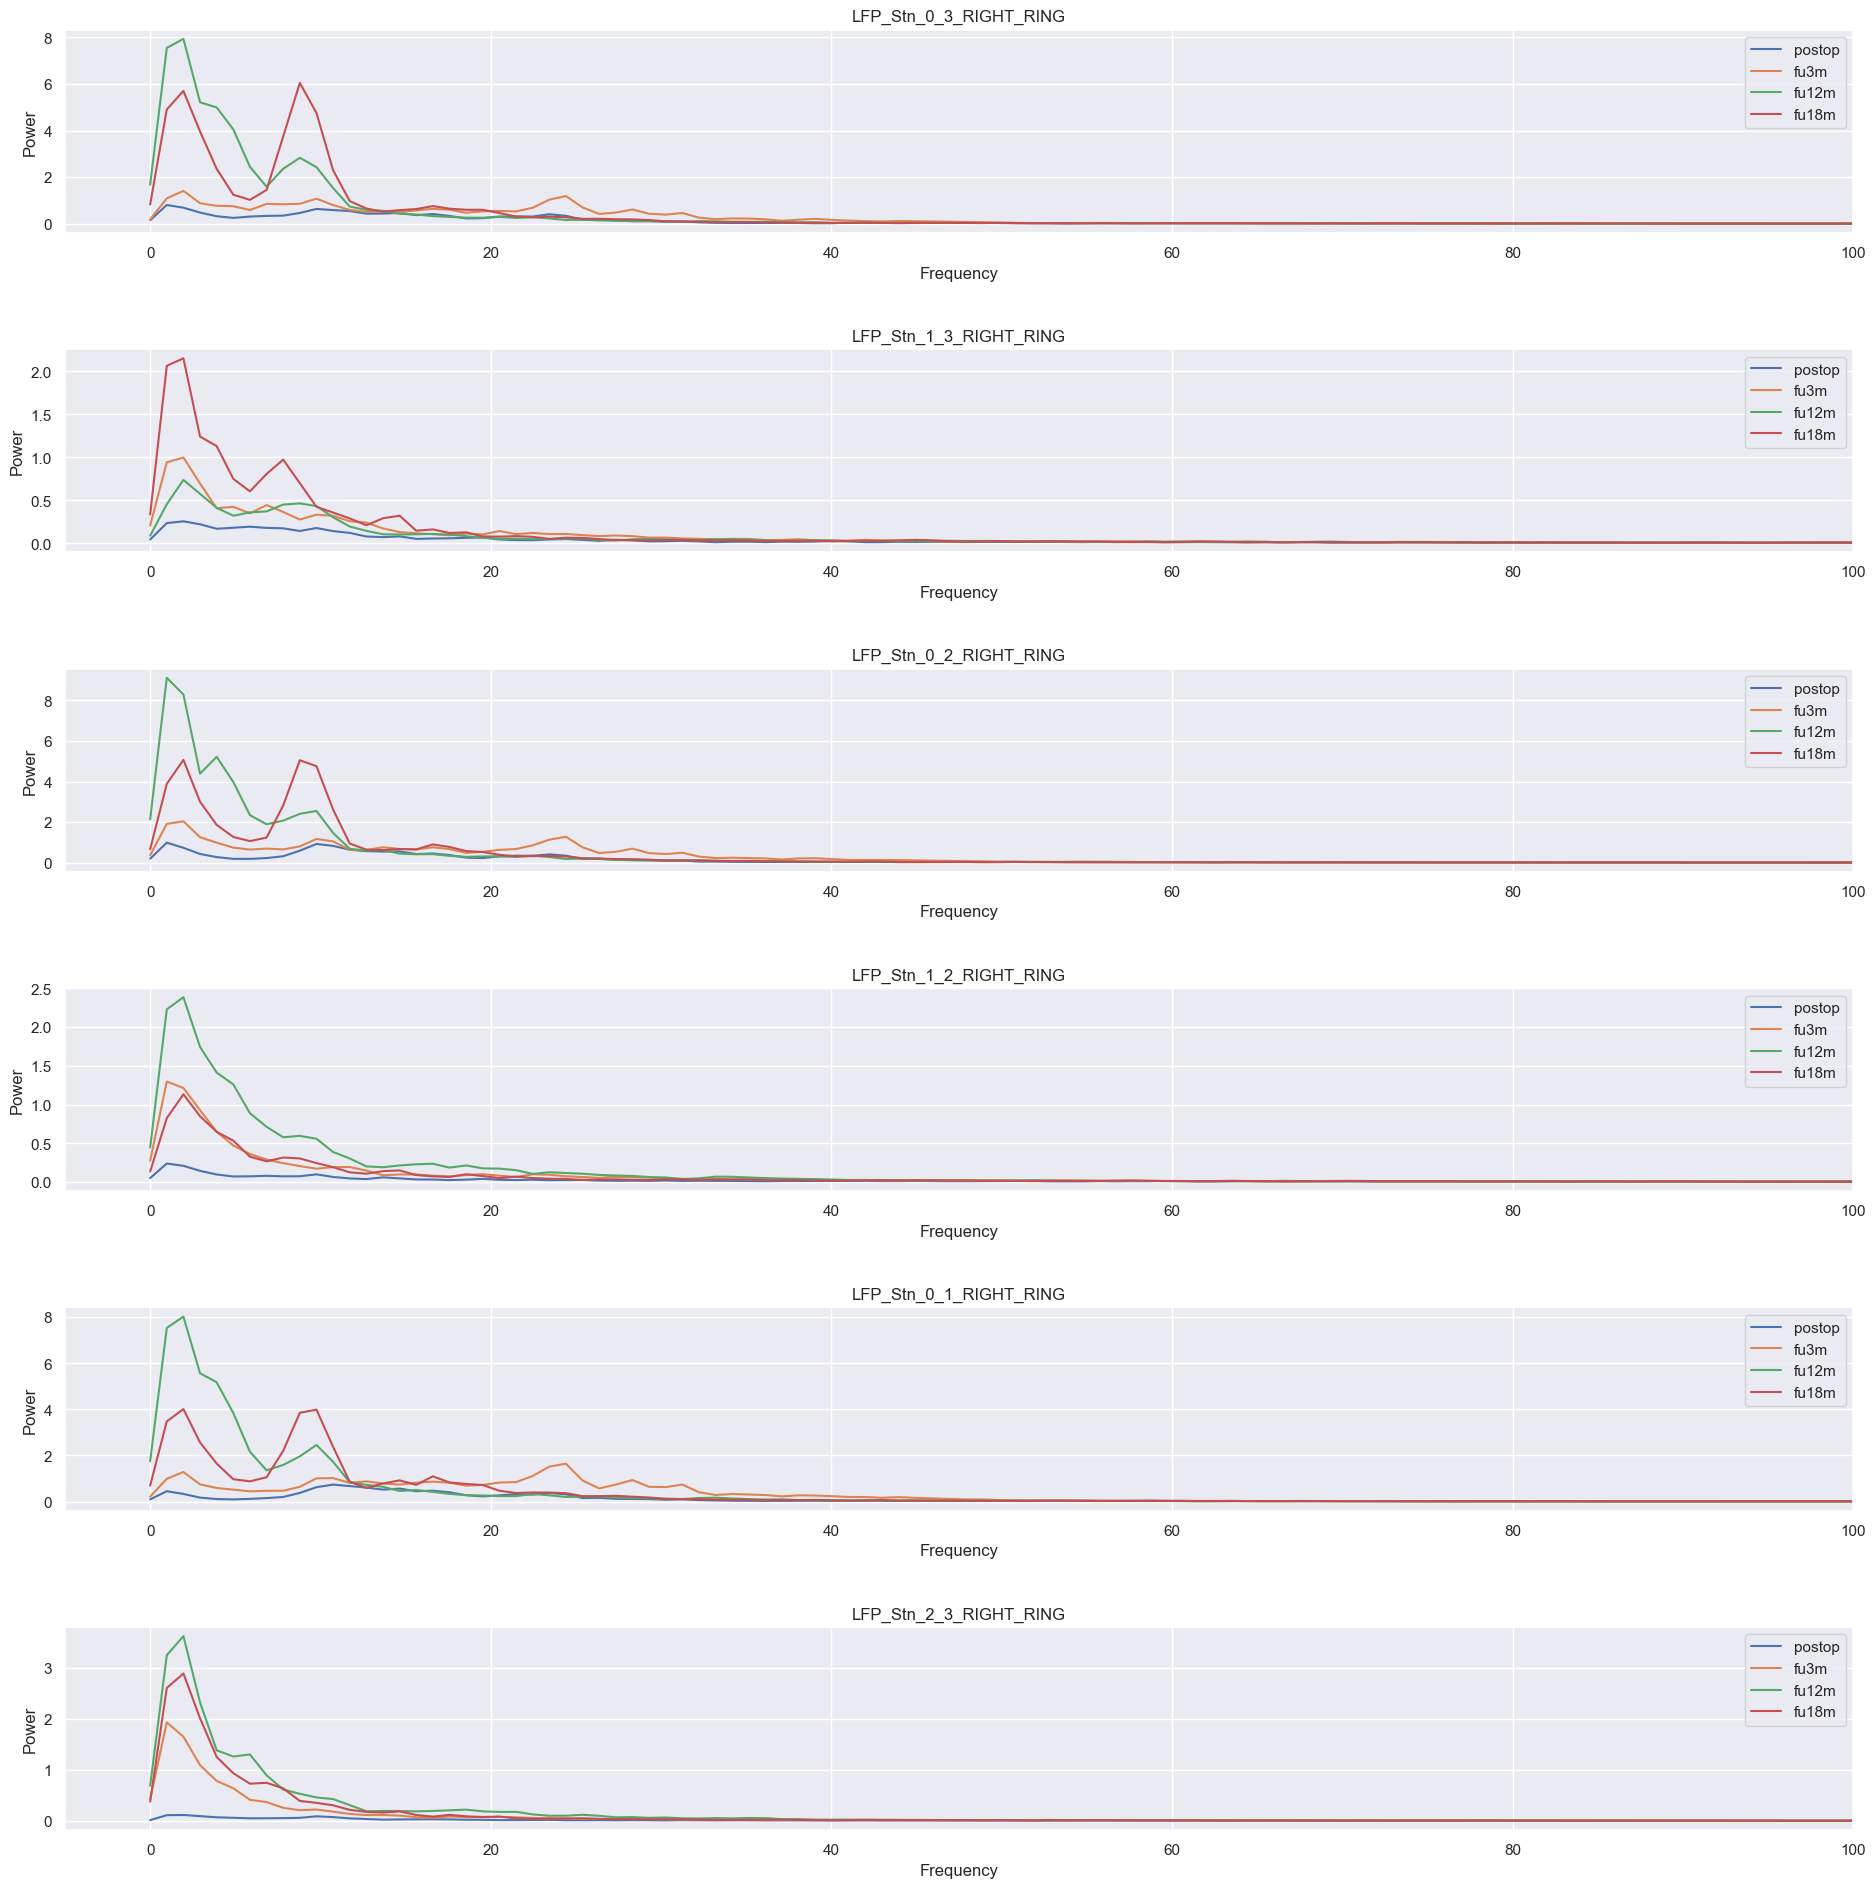

In [19]:
time_points = ['postop', 'fu3m', 'fu12m', 'fu18m']
task_contact = ['RestBSSuRingR'] #, 'RestBSSuSegmInterR', 'RestBSSuSegmIntraR']
# data = data.survey.fu3m.m0s0.rest.data

# create grid for plots: 
# fig = plt.figure() -> figure is an instance of a single container containing all objects representing axes, graphics, text and labels    
# axes = plt.axes() -> axes is a box which will contain the plot

fig, axes = plt.subplots(len(task_ch_names[task_contact[0]].ch_names), 1, figsize=(20, 20)) # rows as many as channels, 1 column
fig.tight_layout(pad=5.0)


for t, tp in enumerate(time_points):

    temp_data = getattr(raw_sub024.survey, tp) # gets attribute e.g. of tp "postop" from modality_class with modality set to survey
    temp_data = temp_data.m0s0.rest.data[task_contact[0]] # gets the mne loaded data from the perceive .mat BSSu, m0s0 file with task "RestBSSuRingR"

    # sample frequency: 250 Hz
    fs = temp_data.info['sfreq']

    # channel names 
    ch_names = temp_data.info.ch_names

    # make a plot for each channel of each timepoint
    for i, ch in enumerate(ch_names):

        # create a signal using welch'method
        # .get_data() gets time series data as an array, [i, :] only gets the row with index i, e.g. index=0 gives time series data of 1st channel "LFP_Stn_R_03"
        f, px = signal.welch(temp_data.get_data()[i, :], fs)  # Returns: f=array of sample frequencies, px= psd or power spectrum of x (amplitude)

        # axes in row number of channel index, all in same column 1
        axes[i].set_title(ch) # the title of each plot is set to the channel e.g. "LFP_Stn_R_03"
        axes[i].plot(f, px, label=tp)
        # axes[i].psd(temp_data.get_data()[i, :], Fs=fs, label=tp,)

for ax in axes: 
    ax.legend() # shows legend for each axes[t]
    ax.set(xlim= (-5, 100), xlabel="Frequency", ylabel="Power") #xlim=(0, 60), ylim=(0, 10)
    # ax.axis([10, 40, -10, 4]) # [xmin, xmax, ymin, ymax]




plt.show() 


    
# for adding subplots use Figure.add_subplot()

Plot PSD of each channel seperately over time
- no filter
- 15 channels per hemisphere 
- per channel 3 session timepoints ('postop', 'fu3m', 'fu12m')

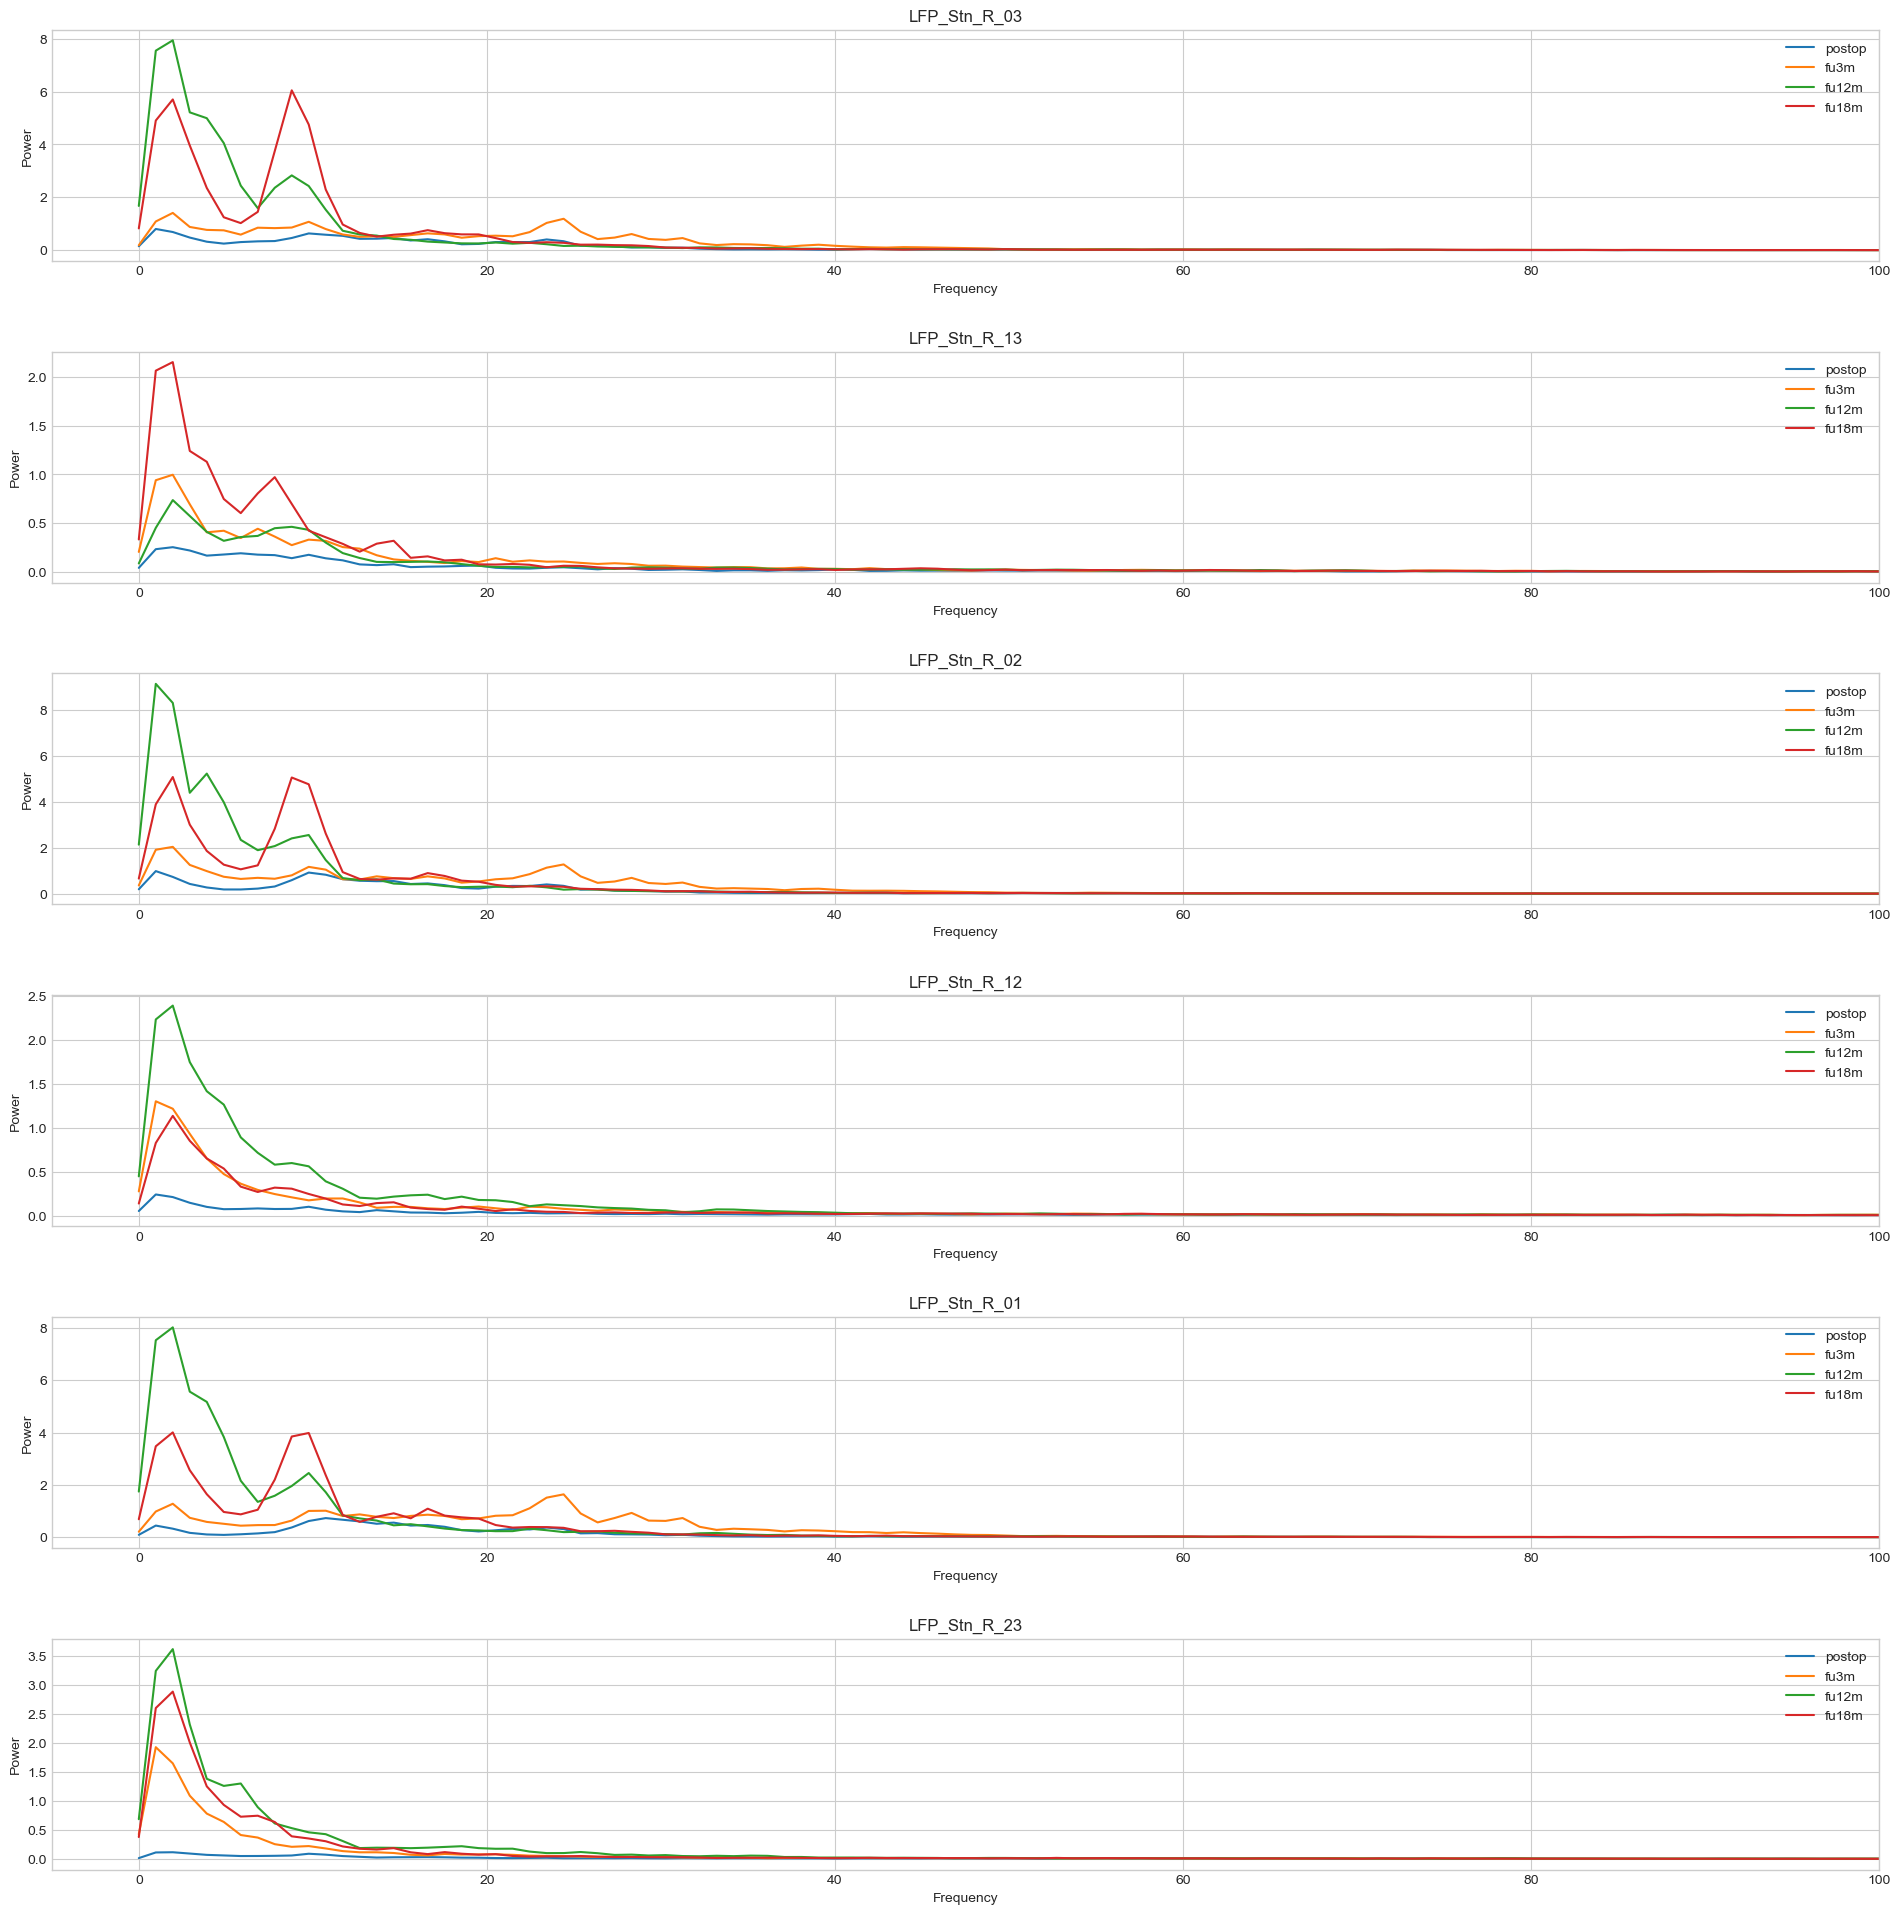

In [26]:

time_points = ['postop', 'fu3m', 'fu12m', 'fu18m']
task_contact = ['RestBSSuRingR', 'RestBSSuSegmInterR', 'RestBSSuSegmIntraR']
data = data = sub024.survey.fu3m.m0s0.rest.data

# create grid for plots: 
# fig = plt.figure() -> figure is an instance of a single container containing all objects representing axes, graphics, text and labels    
# axes = plt.axes() -> axes is a box which will contain the plot

fig, axes = plt.subplots(len(data[task_contact[0]].ch_names), 1, figsize=(20, 20)) # rows as many as channels, 1 column
fig.tight_layout(pad=5.0)


for t, tp in enumerate(time_points):

    temp_data = getattr(sub024.survey, tp) # gets attribute e.g. of tp "postop" from modality_class with modality set to survey
    temp_data = temp_data.m0s0.rest.data[task_contact[0]] # gets the mne loaded data from the perceive .mat BSSu, m0s0 file with task "RestBSSuRingR"

    # sample frequency: 250 Hz
    fs = temp_data.info['sfreq']

    # channel names 
    ch_names = temp_data.info.ch_names

    # make a plot for each channel of each timepoint
    for i, ch in enumerate(ch_names):

        # create a signal using welch'method
        # .get_data() gets time series data as an array, [i, :] only gets the row with index i, e.g. index=0 gives time series data of 1st channel "LFP_Stn_R_03"
        f, px = signal.welch(temp_data.get_data()[i, :], fs)  # Returns: f=array of sample frequencies, px= psd or power spectrum of x (amplitude)

        # axes in row number of channel index, all in same column 1
        axes[i].set_title(ch) # the title of each plot is set to the channel e.g. "LFP_Stn_R_03"
        axes[i].plot(f, px, label=tp)
        # axes[i].psd(temp_data.get_data()[i, :], Fs=fs, label=tp,)

for ax in axes: 
    ax.legend() # shows legend for each axes[t]
    ax.set(xlim= (-5, 100), xlabel="Frequency", ylabel="Power") #xlim=(0, 60), ylim=(0, 10)
    # ax.axis([10, 40, -10, 4]) # [xmin, xmax, ymin, ymax]




plt.show() 


    
# for adding subplots use Figure.add_subplot()

In [28]:

np.array([3,4,5,15,16,17,25,27,60])


array([ 3,  4,  5, 15, 16, 17, 25, 27, 60])

In [29]:
peak_pos = np.array([3,4,5,15,16,17,25,27,60])

listx =[]
x_range = np.arange(10, 36)
for x in peak_pos:
    if x in x_range:
        x_peak_pos = np.array(listx.append(x))

print(x_peak_pos)

None


Try out find_peaks() function from scipy.signal

In [16]:
y = [2,3,4]
y.index(2)

0

13.081612838133548 [3.73737374]


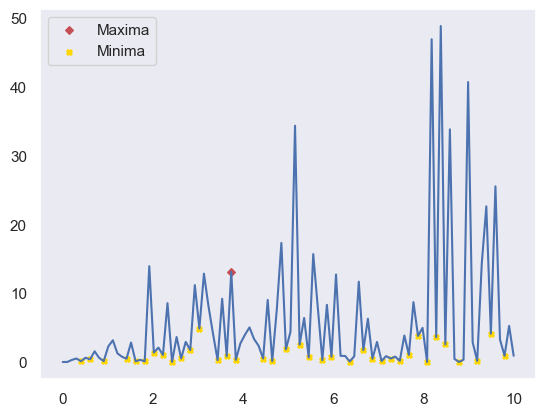

array([15, 19, 23, 25, 27, 29, 31, 35, 37, 41, 45, 48, 51, 53, 55, 58, 60,
       65, 67, 69, 75, 77, 79, 81, 83, 85, 89, 93, 95, 98], dtype=int64)

In [110]:
x = np.linspace(0,10, 100)
y = x*np.random.randn(100)**2
betarange= np.arange(2,6)


# Finding maxima
peaks = signal.find_peaks(y, height = 1, threshold = 1, distance = 1)
height = peaks[1]['peak_heights'] #list of the heights of the peaks
peak_pos = x[peaks[0]] #list of the peaks positions

# Select the peaks within the x-range of 2 to 4
peak_boolean_xrange = (peak_pos >= 2) & (peak_pos <= 4) # set the x-range 
peaksinrange_x = peak_pos[peak_boolean_xrange]
peaksinrange_y = height[peak_boolean_xrange]

# select only the highest peak among those peaks
highest_peakinrange_y = peaksinrange_y.max()

# get the index of the highest peak y value from the np.array with all peaks in the chosen range (peaksinrange_y)
index = np.where(peaksinrange_y == highest_peakinrange_y)
highest_peakinrange_x = peaksinrange_x[index]

print(highest_peakinrange_y, highest_peakinrange_x)

#Finding the minima
y2 = y*-1
minima = signal.find_peaks(y2)
min_pos = x[minima[0]] #list of the minima positions
min_height = y2[minima[0]] #list of the mirrored minima heights

#Plotting
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,y)
ax.scatter(highest_peakinrange_x, highest_peakinrange_y, color = 'r', s = 15, marker = 'D', label = 'Maxima')
ax.scatter(min_pos, min_height*-1, color = 'gold', s = 15, marker = 'X', label = 'Minima')
ax.legend()
ax.grid()
plt.show()

peaks[0]

For each session timepoints plot PSD from every channel of one hemisphere:
- no filter applied 
- transform time series data to frequency domain and calculate estimated PSD using Welch´s method

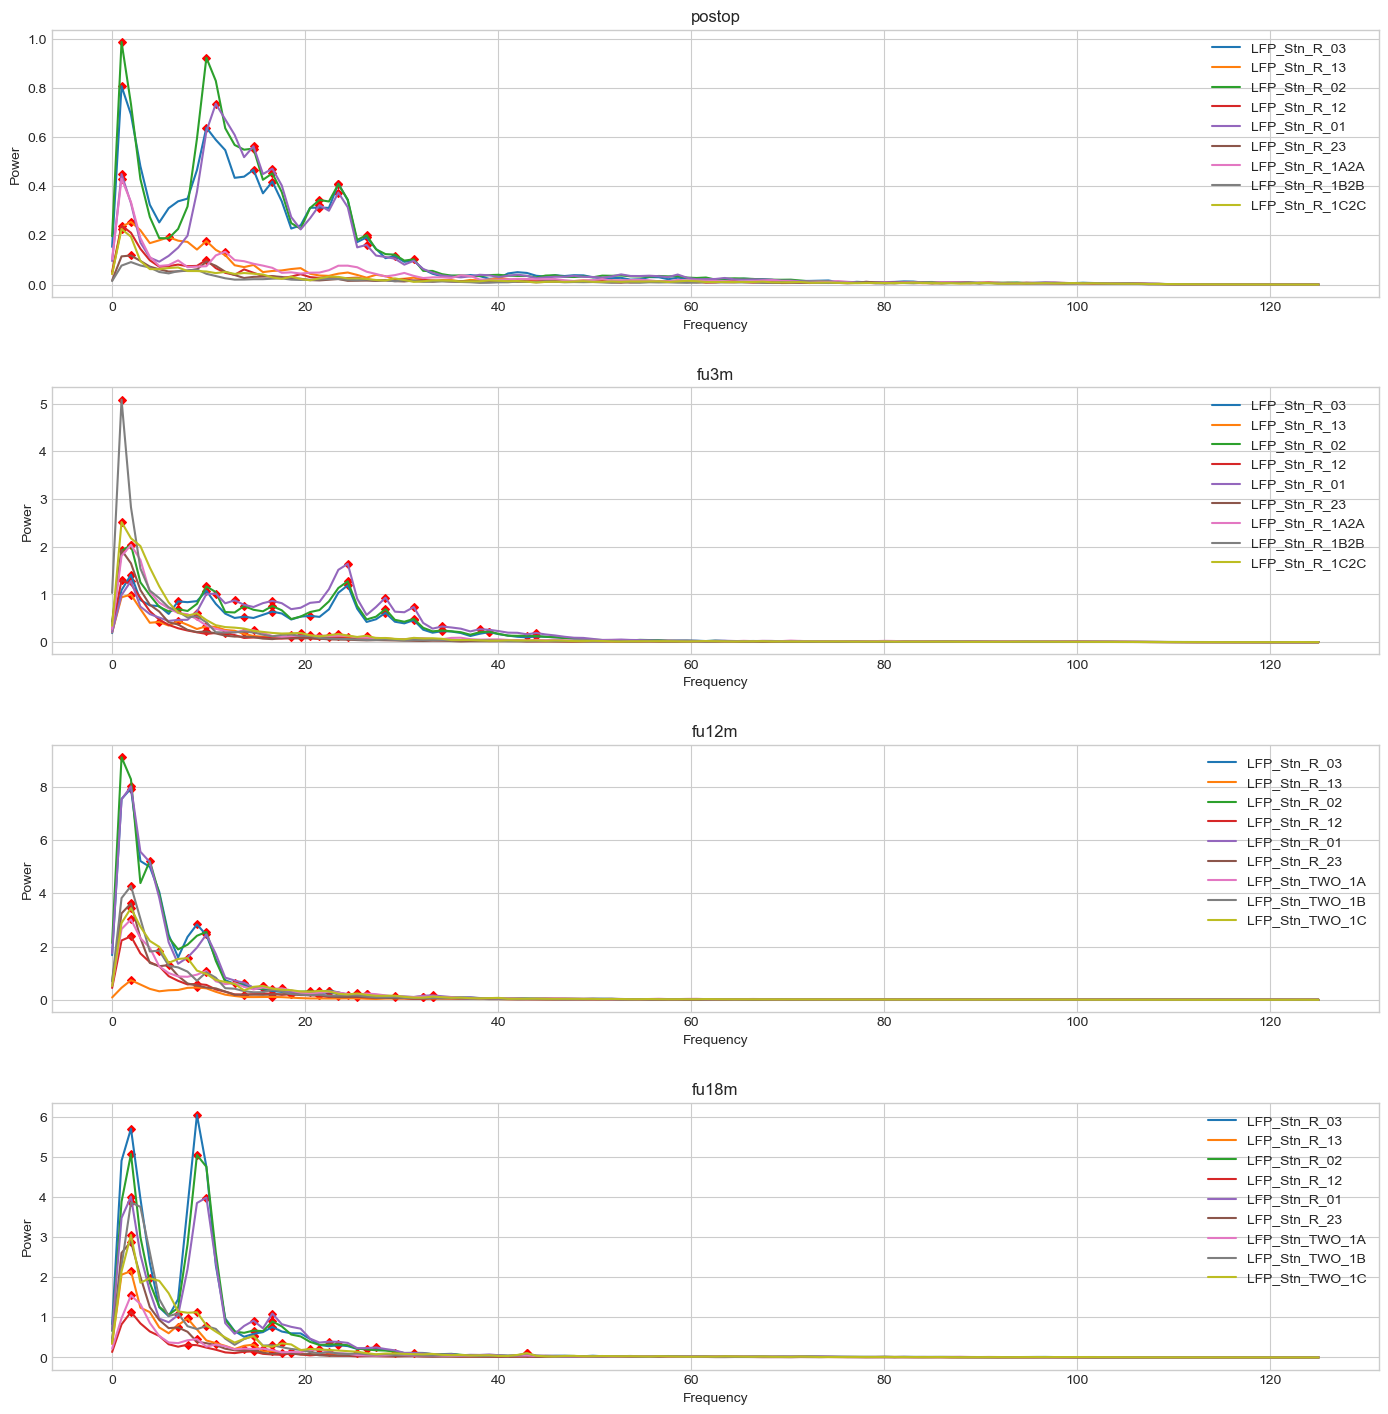

array([ 2,  4,  9, 15, 18, 21, 30, 44], dtype=int64)

In [49]:
time_points = ['postop', 'fu3m', 'fu12m', 'fu18m']
tasks_right = ['RestBSSuRingR', 'RestBSSuSegmInterR']
tasks_left = ['RestBSSuRingL', 'RestBSSuSegmInterL']

# add KeyError exception if task doesn´t exist in loaded data 

# set layout for figures: using the object-oriented interface
fig, axes = plt.subplots(len(time_points), 1, figsize=(15, 15)) # subplot(rows, columns, panel number)
fig.tight_layout(pad=5.0)

for t, tp in enumerate(time_points):

    for tk, task in enumerate(tasks_right): 

        # apply loop over channels
        temp_data = getattr(sub024.survey, tp) # gets attribute e.g. of tp "postop" from modality_class with modality set to survey
        temp_data = temp_data.m0s0.rest.data[tasks_right[tk]] # gets the mne loaded data from the perceive .mat BSSu, m0s0 file with task "RestBSSuRingR"

        # sample frequency: 250 Hz
        fs = temp_data.info['sfreq'] 

        # the title of each plot is set to the timepoint e.g. "postop"
        axes[t].set_title(tp)  

        # create signal per channel with Welch´s method and plot
        for i, ch in enumerate(temp_data.info.ch_names):

            # transform time series data into power spectral density using Welch
            # .get_data() gets time series data as an array, [i, :] only gets the row with index i 
            f, px = signal.welch(temp_data.get_data()[i, :], fs)  # Returns: f=array of sample frequencies, px= psd or power spectrum of x (amplitude)
            # density unit: V**2/Hz
            
            # find peaks: peaks is a tuple -> peaks[0] = index of frequency?, peaks[1] = dictionary with keys("peaks_height") 
            peaks = signal.find_peaks(px, height=0.1) # height: peaks only above 0.1 will be recognized
            peaks_height = peaks[1]["peak_heights"] # arraw of y-value of peaks = power
            peaks_pos = f[peaks[0]] # array of indeces on x-axis of peaks = frequency

            # .plot() method for creating the plot, axes[0] refers to the first plot, the plot is set on the appropriate object axes[t]
            axes[t].plot(f, px, label=ch)  # or np.log10(px)
            axes[t].scatter(peaks_pos, peaks_height, color='r', s=15, marker='D')


            # calculate and plot power spectrum per channel in same plot of timepoint

for ax in axes: 
    ax.legend() # shows legend for each axes[t]
    ax.set(xlabel="Frequency", ylabel="Power")
    # ax.set(xlim=(10, 40), ylim=(-10, 4), xlabel="Frequency", ylabel="log10 Power")

plt.show() # always needed to visualize the plot, in a .py file, use plt.show() only once and at the very end of the file -> it will plot all figures of the script

peaks[0]

### Create filter

In [25]:
# signal of first channel from sub024 BSSu M0S0 Right Ring
raw = sub024.survey.fu3m.m0s0.rest.data["RestBSSuRingR"]
raw_ch1 = raw.get_data()[0,:]
raw_ch1

array([ 4.38087613,  1.01097142,  0.44932063, ..., -5.39184755,
       -2.02194283,  2.3589333 ])

In [32]:
fs = raw.info["sfreq"]
fs

250.0

Create bandpass filter

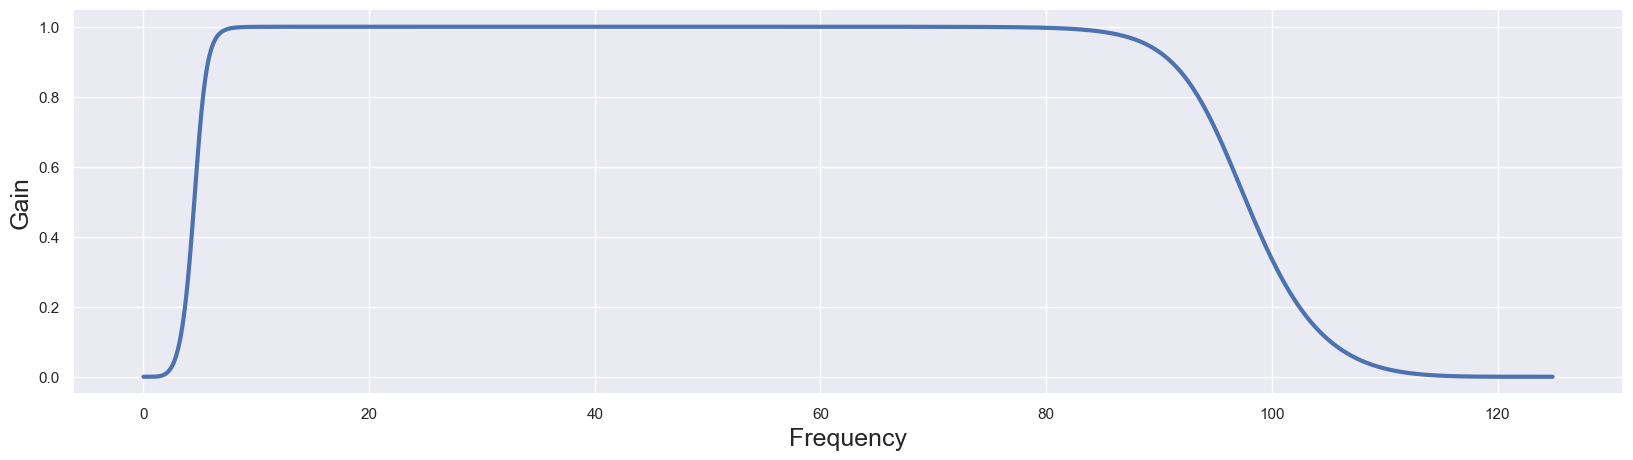

In [33]:
from scipy.signal import butter, filtfilt, freqz

filter_order = 5 # sharpness of the filter, in MATLAB spm_eeg_filter default=5 Butterworth, used in wjn_filter
frequency_cutoff_low = 5
frequency_cutoff_high = 95
sampling_frequency = 250

# Create the filter
b, a = butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=sampling_frequency)

def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    plt.figure(figsize=(20,5))
    w, h = freqz(b, a, worN=512*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)
    
plot_filter(b, a, sampling_frequency)

Apply bandpass filter to time series data

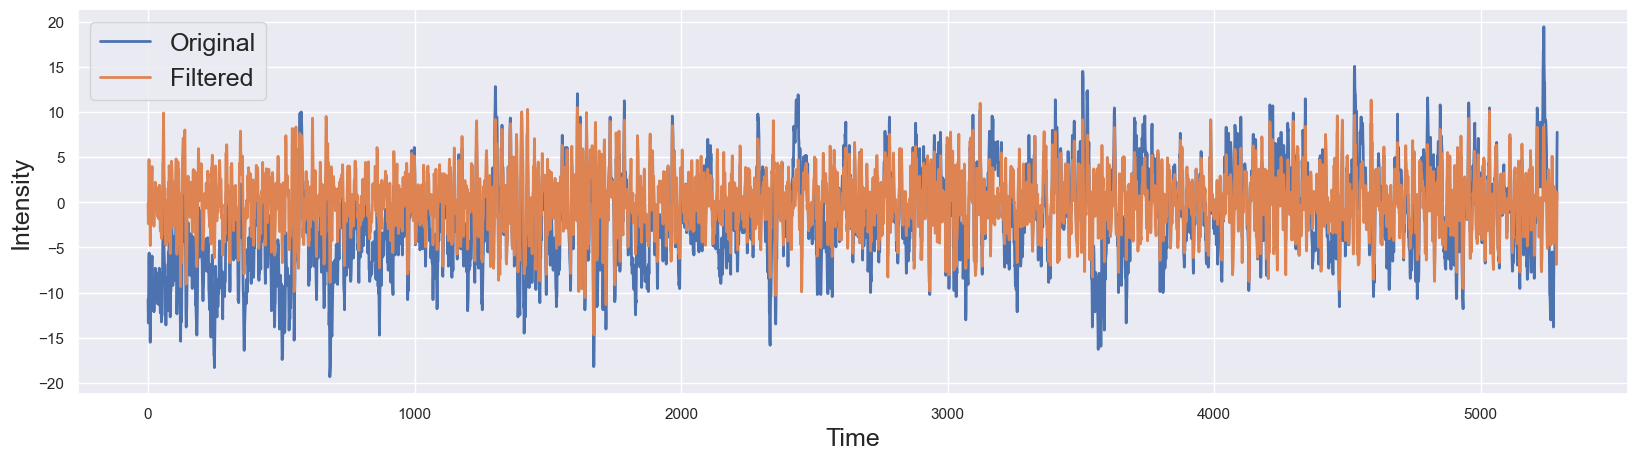

In [34]:
# apply band-pass filter to time-domain
data=sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingL'].get_data() # data of all channels in RingR
chan_signal=data[0]

filtered = signal.filtfilt(b, a, chan_signal)

plt.figure(figsize=(20,5))
plt.plot(chan_signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

High-Pass Filter

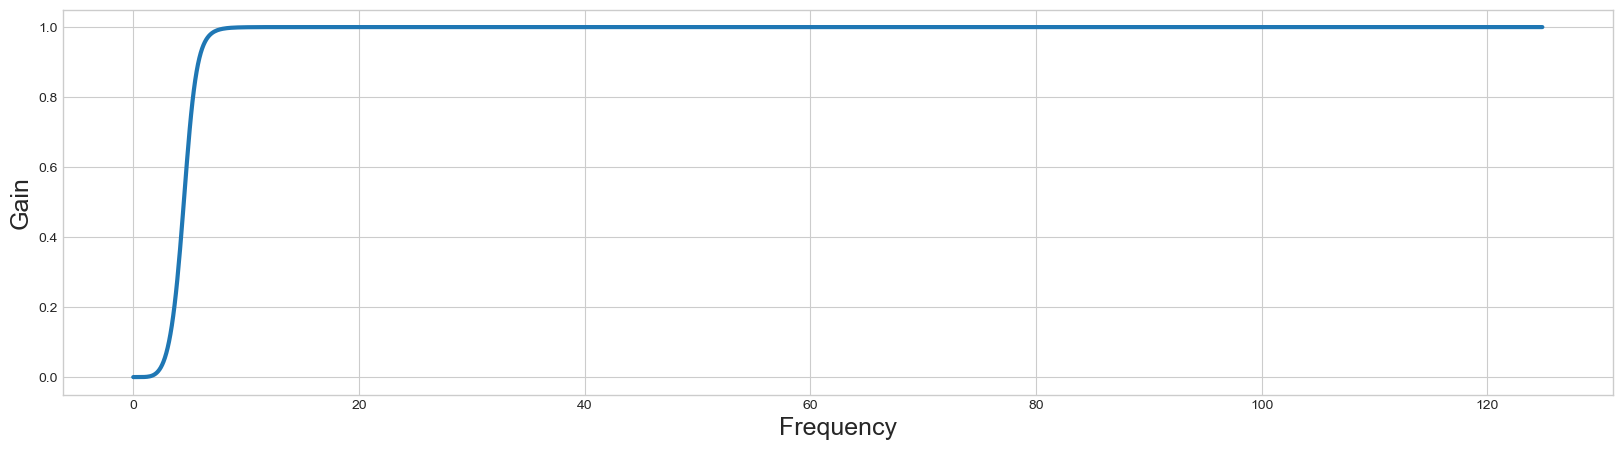

In [18]:
# create high-pass filter


from scipy.signal import butter, filtfilt, freqz

filter_order = 5 # sharpness of the filter, in MATLAB spm_eeg_filter default=5 Butterworth, used in wjn_filter
frequency_cutoff = 5
sampling_frequency = 250

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)

def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    plt.figure(figsize=(20,5))
    w, h = freqz(b, a, worN=512*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)
    
plot_filter(b, a, sampling_frequency)

Apply high-pass filter to time-series data 

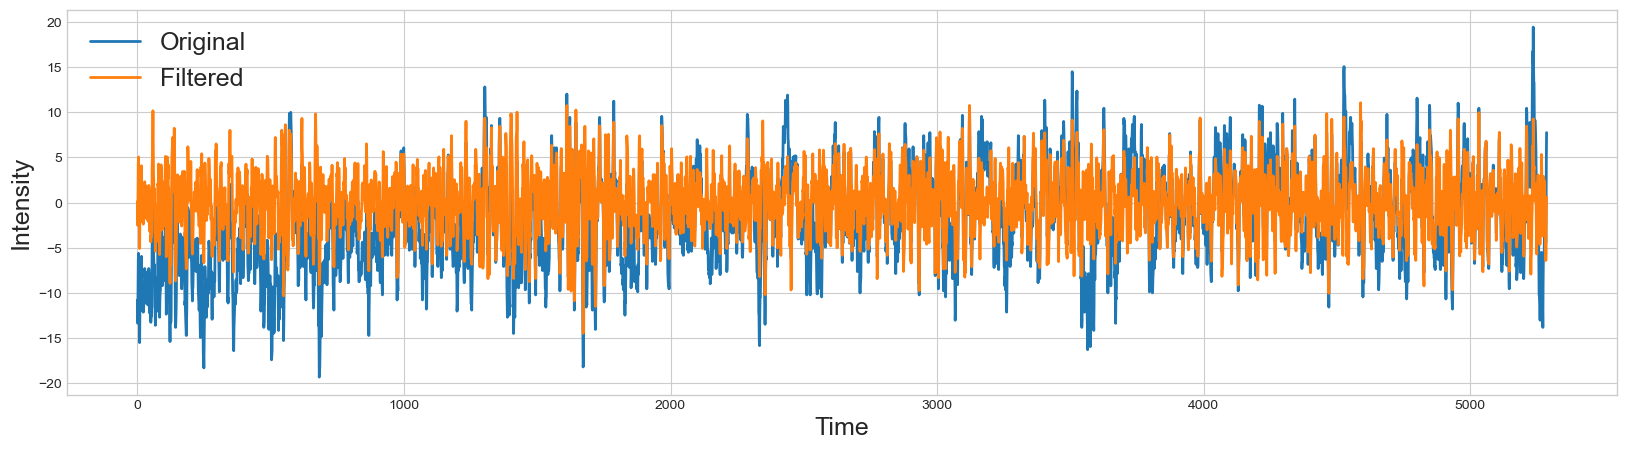

In [19]:
# apply high-pass filter to time-domain
data=sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingL'].get_data() # data of all channels in RingR
chan_signal=data[0]

filtered = signal.filtfilt(b, a, chan_signal)

plt.figure(figsize=(20,5))
plt.plot(chan_signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

High-pass filtered time-series data:
- filter: High-pass filter of 5Hz, Butterworth filter, filter-order=5
- Using Welch´s method to calculate spectral density estimation
- plotting with the matplotlib.plot() function
- Plotting PSD of every channel per session timepoint

In [72]:
# import seaborn and plot with seaborn
import seaborn as sns
sns.set()

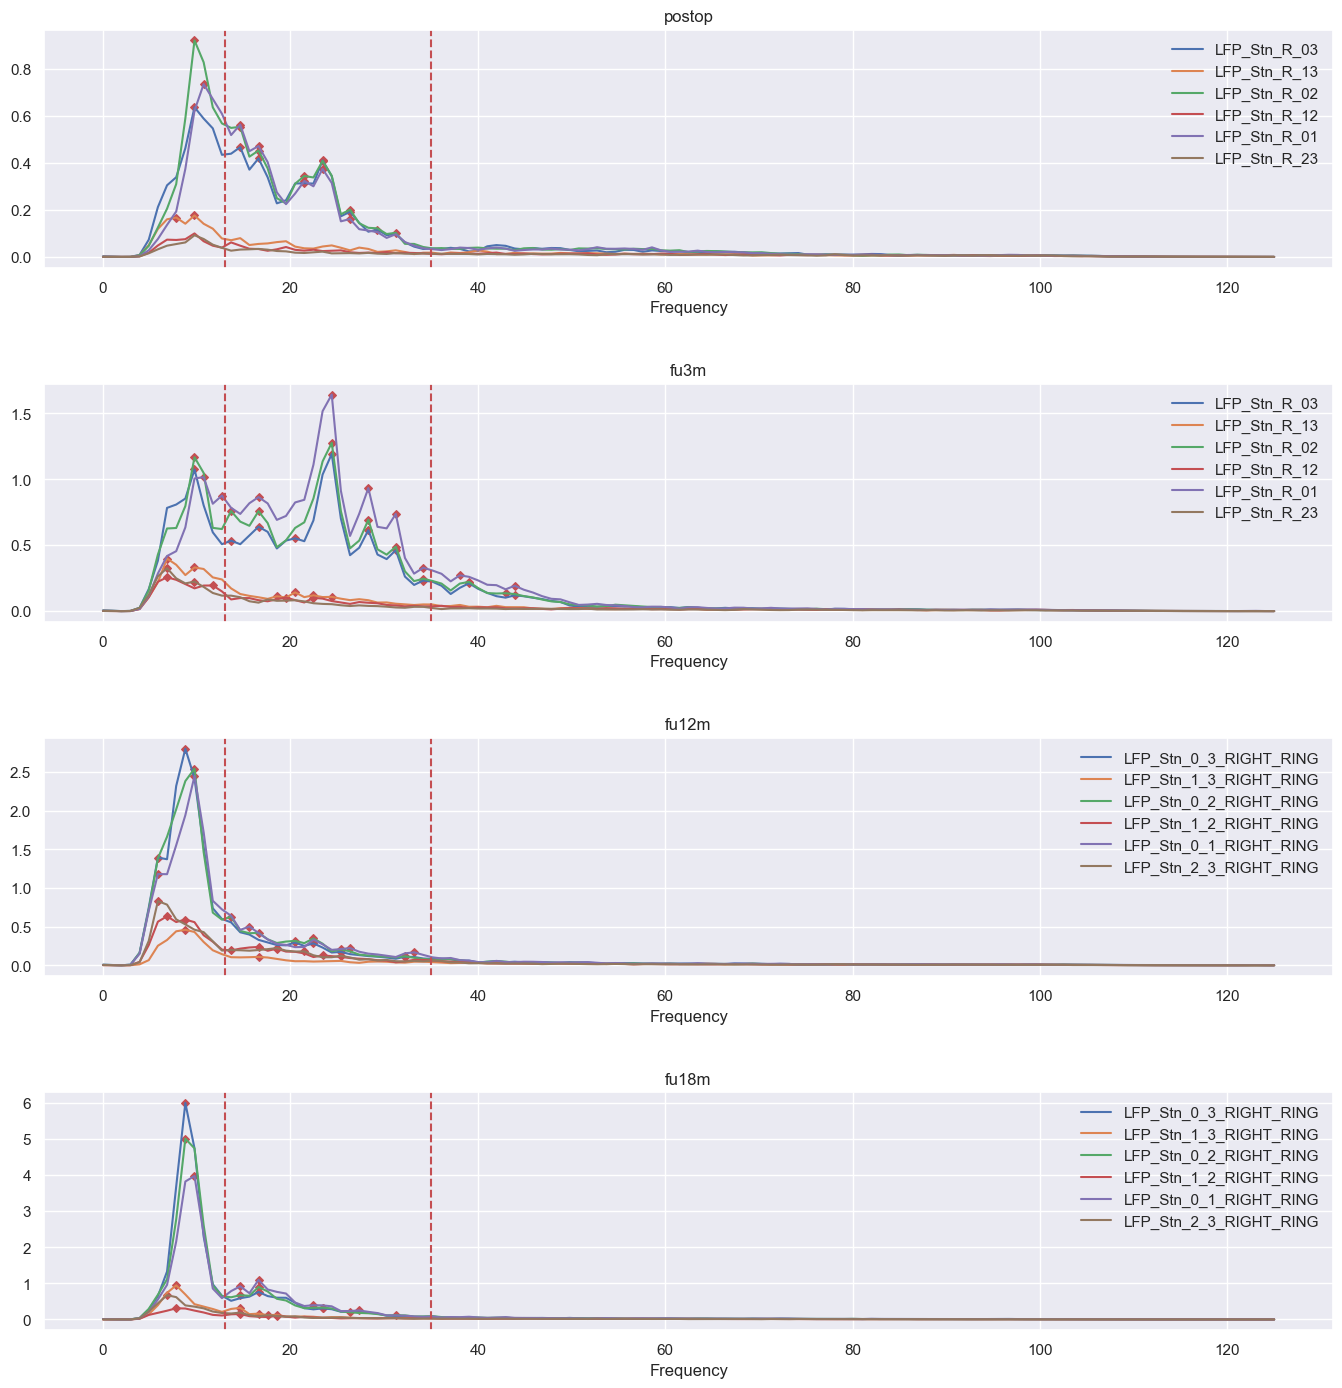

In [59]:


time_points = ['postop', 'fu3m', 'fu12m', 'fu18m']
tasks_right = ['RestBSSuRingR'] #, 'RestBSSuSegmInterR', 'RestBSSuSegmIntraR']
tasks_left = ['RestBSSuRingL', 'RestBSSuSegmInterL', 'RestBSSuSegmIntraL']
f_psd_dict = {}


# set layout for figures: using the object-oriented interface
fig, axes = plt.subplots(len(time_points), 1, figsize=(15, 15)) # subplot(rows, columns, panel number)
fig.tight_layout(pad=5.0)

for t, tp in enumerate(time_points):

    for tk, task in enumerate(tasks_right): 

        # apply loop over channels
        temp_data = getattr(sub024.survey, tp) # gets attribute e.g. of tp "postop" from modality_class with modality set to survey
        temp_data = temp_data.m0s0.rest.data[tasks_right[tk]] # gets the mne loaded data from the perceive .mat BSSu, m0s0 file with task "RestBSSuRingR"

        # sample frequency: 250 Hz
        fs = temp_data.info['sfreq'] 

        # set filter parameters for high-pass filter
        filter_order = 5 # in MATLAB spm_eeg_filter default=5 Butterworth
        frequency_cutoff = 5 # 5Hz high-pass filter

        # create the filter
        b, a = signal.butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=fs)

        # the title of each plot is set to the timepoint e.g. "postop"
        axes[t].set_title(tp)  

        # create signal per channel with Welch´s method and plot
        for i, ch in enumerate(temp_data.info.ch_names):
            
            # create the filtered signal
            filtered = signal.filtfilt(b, a, temp_data.get_data()[i, :])

            # transform the filtered time series data into power spectral density using Welch
            f, px = signal.welch(filtered, fs)  # Returns: f=array of sample frequencies, px= psd or power spectrum of x (amplitude)
            # density unit: V**2/Hz

            # store frequency and psd values in new dictionary
            f_psd_dict[f'{tp}_{ch}'] = [f, px]

            # normalize psd
            # normalized_px = px - np.mean(px)
            # normalized_px = normalized_px/np.std(normalized_px)

            # get y-axis label and limits
            axes[t].get_ylabel()
            axes[t].get_ylim()

            # add errorbars
            # axes[t].errorbar(f, px, yerr=0.8, fmt='.k', color='lightgrey', ecolor='lightgrey')


            # find peaks: peaks is a tuple -> peaks[0] = index of frequency?, peaks[1] = dictionary with keys("peaks_height") 
            peaks = signal.find_peaks(px, height=0.1) # height: peaks only above 0.1 will be recognized
            peaks_height = peaks[1]["peak_heights"] # arraw of y-value of peaks = power
            peaks_pos = f[peaks[0]] # array of indeces on x-axis of peaks = frequency

            # .plot() method for creating the plot, axes[0] refers to the first plot, the plot is set on the appropriate object axes[t]
            axes[t].plot(f, px, label=ch)  # or np.log10(px)
            axes[t].scatter(peaks_pos, peaks_height, color='r', s=15, marker='D')


            # calculate and plot power spectrum per channel in same plot of timepoint

for ax in axes: 
    ax.legend() # shows legend for each axes[t]
    ax.set(xlabel="Frequency")
    ax.axvline(x=13, color='r', linestyle='--')
    ax.axvline(x=35, color='r', linestyle='--')
    # ax.set(xlim=(10, 40), ylim=(-10, 4), xlabel="Frequency", ylabel="log10 Power")

plt.show() # always needed to visualize the plot, in a .py file, use plt.show() only once and at the very end of the file -> it will plot all figures of the script


In [47]:
f_psd_dict['postop_LFP_Stn_R_03'][1]

array([1.67671288e-03, 7.77459431e-04, 6.89403314e-06, 3.01001940e-04,
       8.73707098e-03, 7.30868509e-02, 2.11686733e-01, 3.04270905e-01,
       3.38435392e-01, 4.61830166e-01, 6.35852063e-01, 5.87720993e-01,
       5.46133608e-01, 4.33668709e-01, 4.38512958e-01, 4.66379727e-01,
       3.70801718e-01, 4.18382784e-01, 3.38029641e-01, 2.27636655e-01,
       2.40652477e-01, 3.11764717e-01, 3.13154350e-01, 3.11525303e-01,
       4.10105465e-01, 3.42537803e-01, 1.72512817e-01, 1.91841672e-01,
       1.44911294e-01, 1.07186807e-01, 1.15737689e-01, 9.22644859e-02,
       9.77112479e-02, 6.16509619e-02, 4.38107112e-02, 3.37380636e-02,
       3.58612368e-02, 3.37012684e-02, 3.87309805e-02, 3.43082449e-02,
       2.32541783e-02, 2.53642481e-02, 4.51494889e-02, 5.02884389e-02,
       4.71869955e-02, 3.57143603e-02, 3.21985316e-02, 3.78689690e-02,
       3.46232107e-02, 3.79703808e-02, 3.73014161e-02, 2.97986818e-02,
       2.40756685e-02, 2.55059691e-02, 2.73153982e-02, 1.99022095e-02,
      

In [49]:
# normalize psd


for keys in f_psd_dict.keys():
# loop through all channels

    for p in f_psd_dict[keys][1]:
        #loop through all psd values

        mean = np.mean(p)
mean

6.0671299987077865e-05

In [8]:
import PerceiveImport.methods.psd_methods as psdm
importlib.reload(psdm)

<module 'PerceiveImport.methods.psd_methods' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\psd_methods.py'>

### Plot and calculate psd (Welch´s method)

In [111]:
import PerceiveImport.methods.psd_methods as psdm
importlib.reload(psdm)

<module 'PerceiveImport.methods.psd_methods' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\psd_methods.py'>

In [112]:
f_px_sub024 = psdm.calculate_psd_survey_m0s0(
    incl_sub = "024", 
    incl_modalities=["survey"],
    incl_session = ["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition =["m0s0"],
    incl_task = ["rest"], 
    tasks=['RestBSSuRingR'])

AttributeError: module 'PerceiveImport.methods.psd_methods' has no attribute 'calculate_psd_survey_m0s0'

Save the values of absolute psd and frequencies

In [11]:
frequencies_sub024 = f_px_sub024[0]
psd_sub024 = f_px_sub024[1]

print(frequencies_sub024, psd_sub024)

     postop_LFP_Stn_R_03  postop_LFP_Stn_R_13  postop_LFP_Stn_R_02  \
0               0.000000             0.000000             0.000000   
1               0.976562             0.976562             0.976562   
2               1.953125             1.953125             1.953125   
3               2.929688             2.929688             2.929688   
4               3.906250             3.906250             3.906250   
..                   ...                  ...                  ...   
124           121.093750           121.093750           121.093750   
125           122.070312           122.070312           122.070312   
126           123.046875           123.046875           123.046875   
127           124.023438           124.023438           124.023438   
128           125.000000           125.000000           125.000000   

     postop_LFP_Stn_R_12  postop_LFP_Stn_R_01  postop_LFP_Stn_R_23  \
0               0.000000             0.000000             0.000000   
1               0.9

Normalize psd to total sum and plot

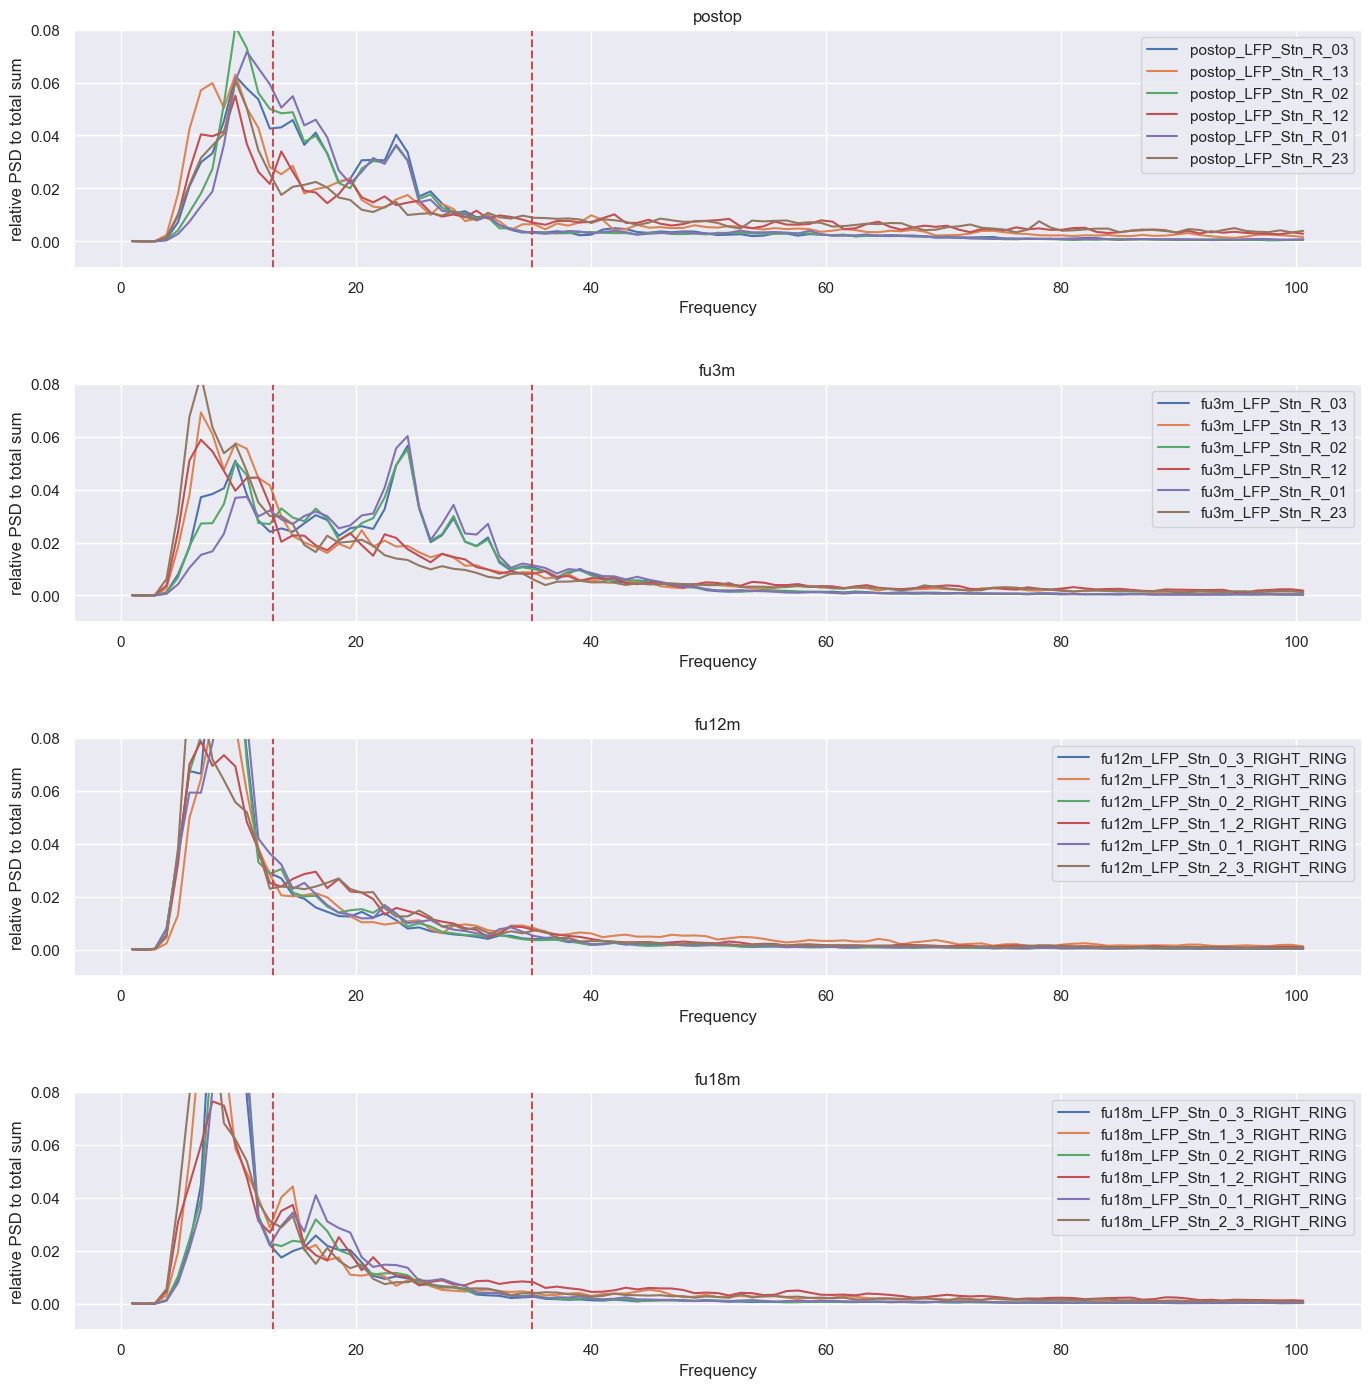

In [12]:
f_relPsd_024 = psdm.normalize_psd_toTotalSum(
   frequenciesDataFrame= frequencies_sub024,
   absolutePsdDataFrame= psd_sub024
)

Save the values of 
- relative psd
- frequencies

In [13]:
f_024 = f_relPsd_024[0]
relPsd024 = f_relPsd_024[1]

print(f_024, relPsd024)

     postop_postop_LFP_Stn_R_03  postop_postop_LFP_Stn_R_13  \
1                      0.976562                    0.976562   
2                      1.953125                    1.953125   
3                      2.929688                    2.929688   
4                      3.906250                    3.906250   
5                      4.882812                    4.882812   
..                          ...                         ...   
99                    96.679688                   96.679688   
100                   97.656250                   97.656250   
101                   98.632812                   98.632812   
102                   99.609375                   99.609375   
103                  100.585938                  100.585938   

     postop_postop_LFP_Stn_R_02  postop_postop_LFP_Stn_R_12  \
1                      0.976562                    0.976562   
2                      1.953125                    1.953125   
3                      2.929688                    2.9

Normalize psd values by total power
- divide power spectra by their total sum across 1-100 Hz


In [42]:
frequencies_sub024[1:104].iloc[:,0] # frequencies around 1-100 Hz 

1        0.976562
2        1.953125
3        2.929688
4        3.906250
5        4.882812
          ...    
99      96.679688
100     97.656250
101     98.632812
102     99.609375
103    100.585938
Name: postop_LFP_Stn_R_03, Length: 103, dtype: float64

In [27]:
# calculate the total sum of all psd values across 1-100 Hz of one subjec

totalSum_024 = psd_sub024[1:104].sum().sum()
# .sum() method calculates the mean of each column
# the second sum() calculates the mean of all column means

# divide each psd value of the data frame by the total psd sum
relative_psd_024 = psd_sub024[1:104].div(totalSum_024)

In [31]:
# divide columns by sessions
# save in a dictionary the new relative psd values 
time_points = ["postop", "fu3m", "fu12", "fu18m"]

rel_psd_dict = {}

for c, tp in enumerate(time_points):

    rel_psd_dict[f'{tp}_relative_psd_024'] = relative_psd_024.filter(like=tp) # filter DF by each session




ch_names = rel_psd_dict['fu3m_relative_psd_024'].columns
ch_names

#rel_psd_dict['postop_relative_psd_024']['postop_LFP_Stn_R_03']


Index(['fu3m_LFP_Stn_R_03', 'fu3m_LFP_Stn_R_13', 'fu3m_LFP_Stn_R_02',
       'fu3m_LFP_Stn_R_12', 'fu3m_LFP_Stn_R_01', 'fu3m_LFP_Stn_R_23'],
      dtype='object')

Normalize by dividing the psd by the total sum of each power spectrum
- e.g. Power Spectrum of postop R 03 -> psd values / total sum of all psd values (postopR03)

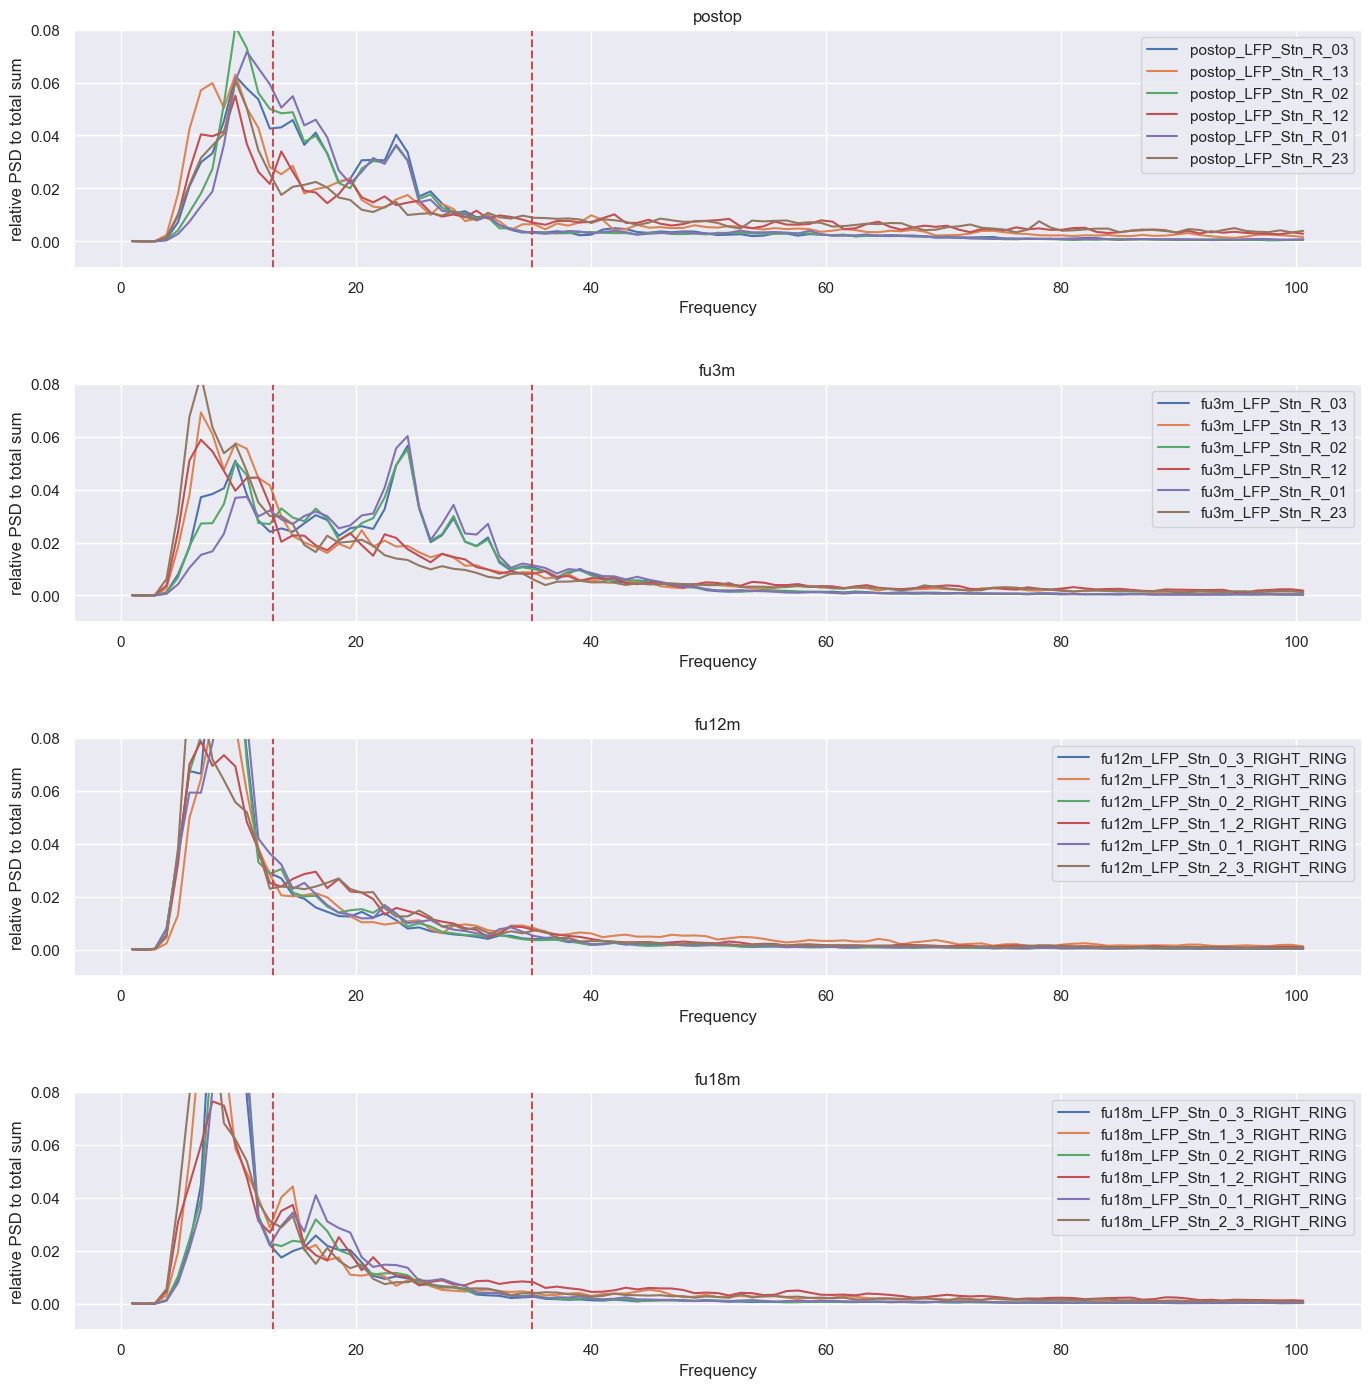

In [24]:
time_points = ['postop', 'fu3m', 'fu12m', 'fu18m']
f_1to100Hz_dict = {} # dict with keys('postop_f_1to100Hz_024', 'fu3m_f_1to100Hz_024', 'fu12m_f_1to100Hz_024', 'fu18m_f_1to100Hz_024')
psd_dict = {} # dict will be filled: keys('postop_relative_psd_024', 'fu3m_relative_psd_024', 'fu12_relative_psd_024', 'fu18m_relative_psd_024')

# get frequencies and psd values: f_px_sub024 is a tuple output after running calculate_psd_survey_m0s0() method
frequencies_sub024 = f_px_sub024[0]
psd_sub024 = f_px_sub024[1]

# just get Frequencies 1-100 Hz
f_1to100Hz_sub024 = frequencies_sub024[1:104]

# divide each psd value (across 1-100Hz) of the data frame by the total psd sum
# relative_psd_024 = psd_sub024[1:104].div(totalSum_psd_024)

# set layout for figures: using the object-oriented interface
fig, axes = plt.subplots(len(time_points), 1, figsize=(15, 15)) # subplot(rows, columns, panel number)
fig.tight_layout(pad=5.0) # space in between each plot

for t, tp in enumerate(time_points):

    # the title of each plot is set to the timepoint e.g. "postop"
    axes[t].set_title(tp) 

    # select the right frequency and psd columns per timepoint and add them to the empty dictionaries
    f_1to100Hz_dict[f'{tp}_f_1to100Hz_024'] = f_1to100Hz_sub024.filter(like=tp) # filter DF by each session
    psd_dict[f'{tp}_psd_024'] = psd_sub024[1:104].filter(like=tp) # filter DF by each session across 1-100Hz

    # get channel names by getting the column names from the DataFrame stored as values in the rel_psd_dict
    ch_names = psd_dict[f'{tp}_psd_024'].columns

    for i, ch in enumerate(ch_names):

        # get psd values from each channel column 
        absolute_psd = psd_dict[f'{tp}_psd_024'][ch] 
        f_1to100Hz = f_1to100Hz_dict[f'{tp}_f_1to100Hz_024'][ch]

        # normalize psd values to total sum of the same power spectrum
        totalSum_psd = absolute_psd.sum()
        rel_psd = absolute_psd.div(totalSum_psd)

        # get y-axis label and limits
        axes[t].get_ylabel()
        axes[t].get_ylim()

        # add errorbars
        # axes[t].errorbar(f, px, yerr=0.8, fmt='.k', color='lightgrey', ecolor='lightgrey')


        # find peaks: peaks is a tuple -> peaks[0] = index of frequency?, peaks[1] = dictionary with keys("peaks_height") 
        peaks = signal.find_peaks(rel_psd, height=0.1) # height: peaks only above 0.1 will be recognized
        peaks_height = peaks[1]["peak_heights"] # arraw of y-value of peaks = power
        peaks_pos = f_1to100Hz[peaks[0]] # array of indeces on x-axis of peaks = frequency

        # .plot() method for creating the plot, axes[0] refers to the first plot, the plot is set on the appropriate object axes[t]
        axes[t].plot(f_1to100Hz, rel_psd, label=ch)  # or np.log10(px)
        #axes[t].scatter(peaks_pos, peaks_height, color='r', s=15, marker='D')
            

for ax in axes: 
    ax.legend() # shows legend for each axes[t]
    ax.set(xlabel="Frequency", ylabel="relative PSD to total sum", ylim=(-0.01, 0.08)) # set y axis to -0.01 until 0.08(=8%)
    ax.axvline(x=13, color='r', linestyle='--')
    ax.axvline(x=35, color='r', linestyle='--')
    # ax.set(xlim=(10, 40), ylim=(-10, 4), xlabel="Frequency", ylabel="log10 Power")

plt.show() 

Peak detection
- search for Peaks in alpha and beta range
- set threshold for Peak detection?
- set min. peak prominence??

Use Plotly to plot 

In [22]:
!pip install plotly

In [96]:
import plotly.express as px
import plotly.subplots as subplots
import plotly.graph_objs as go

In [32]:
# use plotly to plot

time_points = ['postop', 'fu3m', 'fu12m', 'fu18m']
tasks_right = ['RestBSSuRingR', 'RestBSSuSegmInterR']
tasks_left = ['RestBSSuRingL', 'RestBSSuSegmInterL']


# set layout for figures: using the object-oriented interface
# fig, axes = plt.subplots(len(time_points), 1, figsize=(15, 15)) # subplot(rows, columns, panel number)
# fig.tight_layout(pad=5.0)

fig = subplots.make_subplots(rows=len(time_points), cols=1)


peak_array, freq_array = [], []



for t, tp in enumerate(time_points):

    for tk, task in enumerate(tasks_right): 

        # apply loop over channels
        temp_data = getattr(sub024.survey, tp) # gets attribute e.g. of tp "postop" from modality_class with modality set to survey
        temp_data = temp_data.m0s0.rest.data[tasks_right[tk]] # gets the mne loaded data from the perceive .mat BSSu, m0s0 file with task "RestBSSuRingR"

        # sample frequency: 250 Hz
        fs = temp_data.info['sfreq'] 

        # set filter parameters for high-pass filter
        filter_order = 5 # in MATLAB spm_eeg_filter default=5 Butterworth
        frequency_cutoff = 5 # 5Hz high-pass filter

        # create the filter
        b, a = signal.butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=fs)

        # the title of each plot is set to the timepoint e.g. "postop"
        # axes[t].set_title(tp)  

        # create signal per channel with Welch´s method and plot
        for i, ch in enumerate(temp_data.info.ch_names):
            
            # create the filtered signal
            filtered = signal.filtfilt(b, a, temp_data.get_data()[i, :])

            # transform the filtered time series data into power spectral density using Welch
            f, peak = signal.welch(filtered, fs)  # Returns: f=array of sample frequencies, px= psd or power spectrum of x (amplitude)
            # density unit: V**2/Hz

            # find peaks: peaks is a tuple -> peaks[0] = index of frequency?, peaks[1] = dictionary with keys("peaks_height") 
            peaks = signal.find_peaks(px, height=0.1) # height: peaks only above 0.1 will be recognized
            peaks_height = peaks[1]["peak_heights"] # arraw of y-value of peaks = power
            peaks_pos = f[peaks[0]] # array of indeces on x-axis of peaks = frequency

            # .plot() method for creating the plot, axes[0] refers to the first plot, the plot is set on the appropriate object axes[t]
            fig.add_trace(go.Line(x=f, y=peak, color=ch))  # or np.log10(px)
            fig.add_trace(go.Scatter(x=peaks_pos, y=peaks_height))

            print(peaks)
            print('\n======\n')

        


            # calculate and plot power spectrum per channel in same plot of timepoint

# for ax in axes: 
#     ax.legend() # shows legend for each axes[t]
#     ax.set(xlabel="Frequency", ylabel=)
#     ax.get_ylim()
#     ax.axvline(x=13, color='r', linestyle='--')
#     ax.axvline(x=35, color='r', linestyle='--')
    # ax.set(xlim=(10, 40), ylim=(-10, 4), xlabel="Frequency", ylabel="log10 Power")

fig.show() # always needed to visualize the plot, in a .py file, use plt.show() only once and at the very end of the file -> it will plot all figures of the script


NameError: name 'subplots' is not defined

In [87]:
import plotly.express as px


# data = sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingR']
# data = data.get_data()[0]

# df = px.data.gapminder().query("country=='Canada'")
# fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
# fig.show()

In [84]:
data = sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingR']
data = data.to_data_frame()
data

# "inplace" keyword is for automatically saving the state of the DF; so you don't need to do data = data.drop(...)
# data.drop('time', axis=1, inplace=True)
# data

time  LFP_Stn_R_03  LFP_Stn_R_13  LFP_Stn_R_02  LFP_Stn_R_12  \
0      0.000      4.380876     -4.326490      4.156216     -1.360106   
1      0.004      1.010971     -5.578895      1.909613     -3.060238   
2      0.008      0.449321     -4.895765      0.000000     -3.626949   
3      0.012     -1.909613     -2.618665     -2.358933     -2.040159   
4      0.016     -5.728838     -2.618665     -5.841168     -2.606869   
...      ...           ...           ...           ...           ...   
5283  21.132     -2.583594     -1.252405     -2.920584     -2.040159   
5284  21.136     -5.504178      0.455420     -4.942527      1.020079   
5285  21.140     -5.391848      2.846375     -6.739809      1.246764   
5286  21.144     -2.021943      3.643360     -6.515149      1.360106   
5287  21.148      2.358933      2.277100     -0.561651      0.453369   

      LFP_Stn_R_01  LFP_Stn_R_23  
0         8.197560     -1.010971  
1         5.465040     -0.898641  
2         3.415650     -1.235632  
3        -0.113855     -0.224660  
4        -3.301795     -1.010971  
...            ...           ...  
5283     -1.252405      0.786311  
5284     -6.717445      1.347962  
5285    -10.133095      1.010971  
5286     -6.717445      2.583594  
5287      0.341565      3.931556  

[5288 rows x 7 columns]

In [91]:
fig = px.line(data, x=data["time"], y=data['LFP_Stn_R_03'], title= "Rawsignal")
fig.show()

In [104]:
fs = 250
f, peak = signal.welch(data["LFP_Stn_R_03"], fs) 


fig = px.line(data, x=f, y=peak, title= "Welch's psd")


fig.show()


In [118]:
# saving figures with savefig(), will be saved in the cwd
sub = '024'
fig.savefig(f'sub{sub}_plotPsdBSSu_m0s0.png')

# to view the .png code:
# from IPython.display import Image
# Image("sub024_plotPsdBSSu_m0s0.png")

Plotting Welch´s PSD:
compare matplotlib .psd function to .plot 

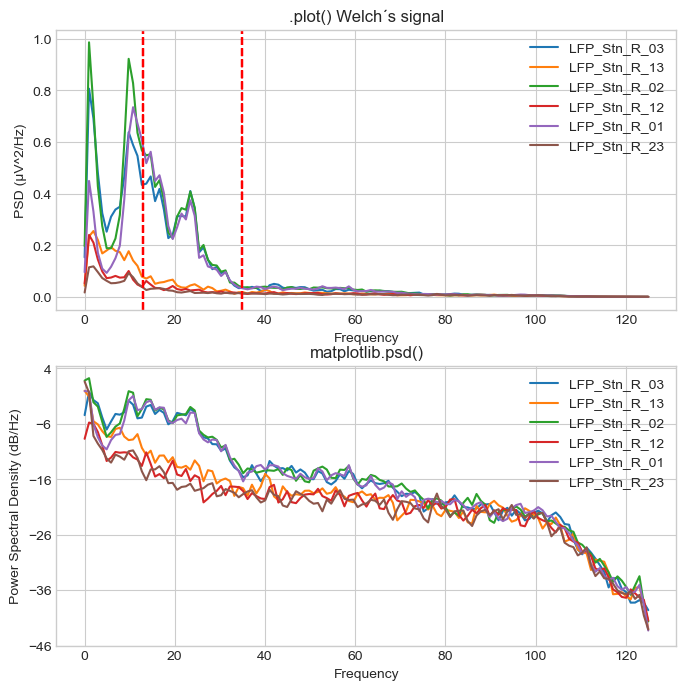

In [40]:
# plot Power Spectra with matplotlib function

# plot info
fs = raw.info['sfreq']


fig, axes = plt.subplots(2, 1, figsize=(8, 8))

for i, ch in enumerate(raw.info.ch_names):

    # transfer the signal into frequency domain using Welch´s method
    f, px = signal.welch(raw.get_data()[i, :], fs, scaling='density',return_onesided=True) # estimated power spectral density by averaging periodograms of overlapping windows
    
    # 256 instead of fs??
    # spectrum unit:  V**2
    # density unit: V**2/Hz
    # default Hann window with an overlap of 50%
    # default units of y-axis in logarithmic scale, this allows to see more detail of power values at lower frequencies


    # plotting without built-in function
    axes[0].plot(f, px, label=ch) # plot Welch´s signal
    axes[0].set_title(".plot() Welch´s signal")

    # mark Beta frequency 13-35 Hz with red lines
    axes[0].axvline(x=13, color='r', linestyle='--')
    axes[0].axvline(x=35, color='r', linestyle='--')
    axes[0].set(xlabel="Frequency", ylabel="PSD (µV^2/Hz)")


    # built-in matplotlib function (power in dB)
    axes[1].psd(
        raw.get_data()[i, :], Fs=fs,
        label=ch,
    )
    axes[1].set_title("matplotlib.psd()")
    # using Welch´s method
    # power is plotted as 10 log10(Pxx), but Pxx itself is returned

axes[0].legend()
axes[1].legend()

plt.show()

Plotting psd using PyWavelet, Wavelet Transformation
- install in Environment: conda install -c conda-forge pywavelets

In [10]:
import pywt

In [14]:
data=sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingL'].get_data()

raw = data[0]

In [16]:
# perform a wavelet transformation using PyWavelets

data=sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingL'].get_data()
raw = data[0]

wavelet = "db4"
level = 3


coeffs = pywt.wavedec(raw, wavelet, level=level)



[array([-2.71651827e+01, -2.51724517e+01, -2.65196145e+01, -2.52526308e+01,
        -2.51401645e+01, -3.06474945e+01, -2.62803881e+01, -2.99827086e+01,
        -2.58365253e+01, -2.39258777e+01, -3.43660707e+01, -1.89743146e+01,
        -1.85939578e+01, -2.98308215e+01, -2.10982988e+01, -1.89313730e+01,
        -1.72137936e+01, -1.56475121e+01, -1.32934159e+01, -2.51594169e+01,
        -2.67299806e+01,  2.16174541e+00, -2.30099494e+01, -1.67264975e+01,
        -1.59316800e+01, -1.77719414e+01, -1.53402150e+01, -3.48961957e+01,
        -1.39508853e+01, -7.44193460e+00, -2.36935414e+01, -1.66800326e+01,
        -1.28795226e+01, -3.04572011e+01, -2.32503123e+01, -4.07886234e+01,
        -3.13961200e+01, -2.92898466e+01, -1.70864581e+01, -2.49070603e+01,
        -2.77605680e+01, -1.77700873e+00, -1.48155263e+01, -7.35948890e+00,
        -1.07763593e+01, -7.13732993e+00, -1.98691364e+01, -1.42117427e+01,
        -1.92995041e+00, -3.09777204e+01, -3.32240119e+01, -2.08528488e+01,
        -1.5

Plotting psd using MNE

In [21]:
from mne import time_frequency

raw = sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingR']
raw.get_data()[0, :]
fs = 

# spectrum = time_frequency.psd_array_welch(raw.get_data()[0, :], )

# spectrum = raw.compute_psd(method="welch")

ValueError: picks (NoneNone, treated as "data") yielded no channels, consider passing picks explicitly

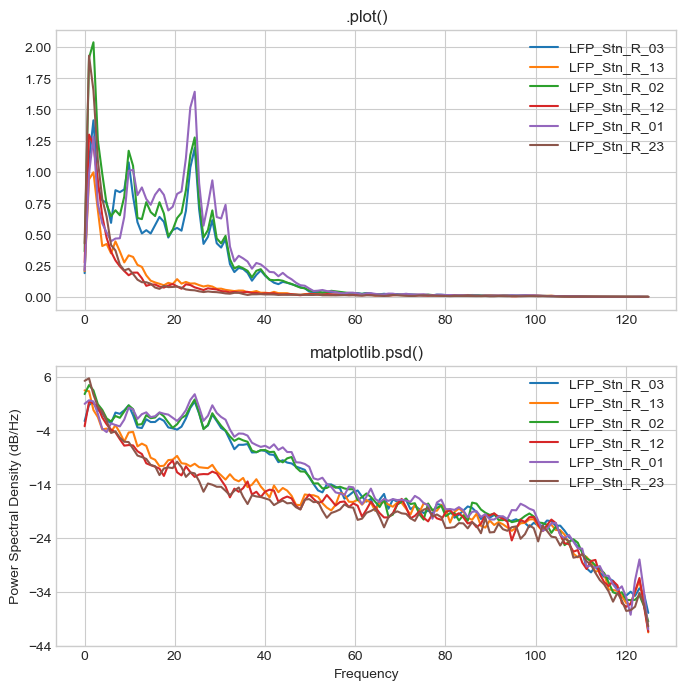

In [42]:
# plot info
raw = sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingR']

fs = raw.info['sfreq']


fig, axes = plt.subplots(2, 1, figsize=(8, 8))

for i, ch in enumerate(raw.info.ch_names):

    # transfer the signal into frequency domain using Welch´s method
    f, px = signal.welch(raw.get_data()[i, :], fs, scaling='density',) # estimated power spectral density by averaging periodograms of overlapping windows
    # 256 instead of fs??
    # spectrum unit:  V**2
    # density unit: V**2/Hz
    # default Hann window with an overlap of 50%


    # plotting without built-in function
    axes[0].plot(f, px, label=ch) # plot power as log10 of power
    axes[0].set_title(".plot()")

    # built-in matplotlib function (power in dB), using the periodogram method
    axes[1].psd(
        raw.get_data()[i, :], Fs=fs,
        label=ch,
    )
    axes[1].set_title("matplotlib.psd()")
    # using Welch´s method
    # power is plotted as 10 log10(Pxx), but Pxx itself is returned

axes[0].legend()
axes[1].legend()

plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)


C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\63740021.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=ch)
C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\63740021.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=ch)
C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\63740021.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=ch)
C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\63740021.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=ch)
C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\63740021.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=ch)
C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\63740021.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=ch)


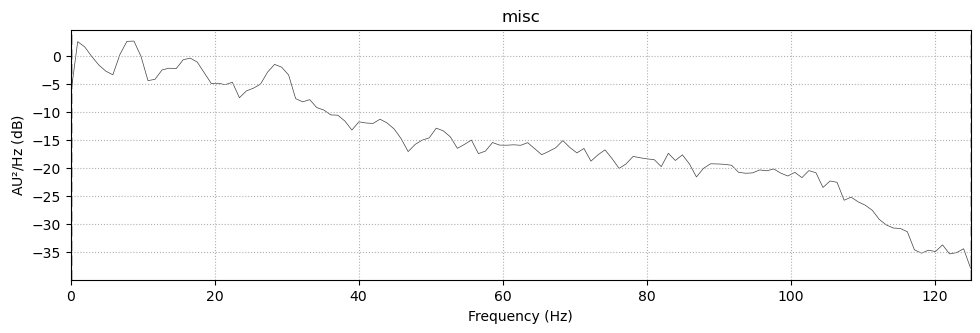

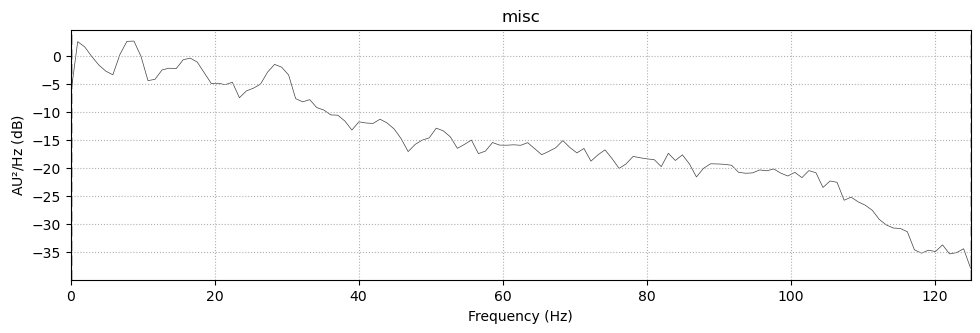

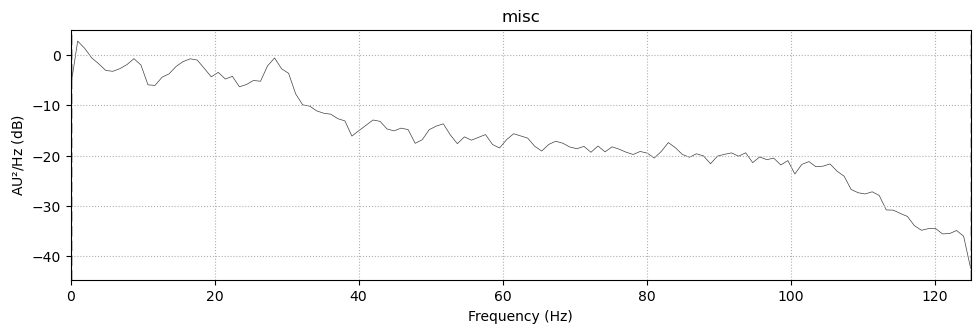

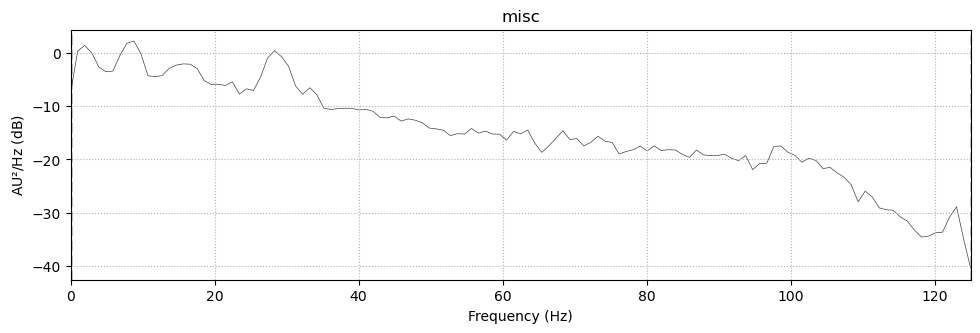

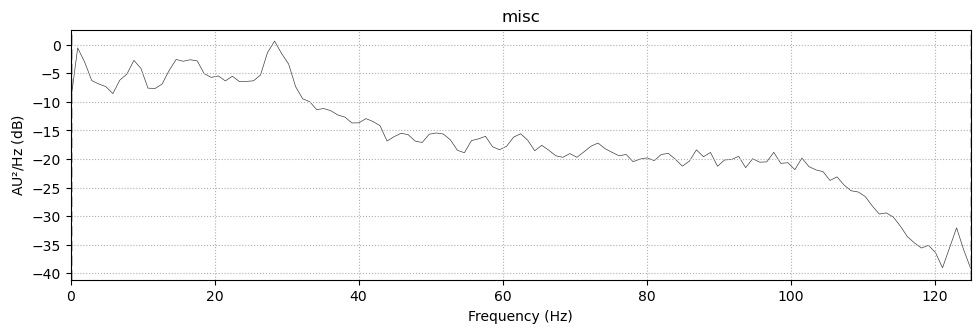

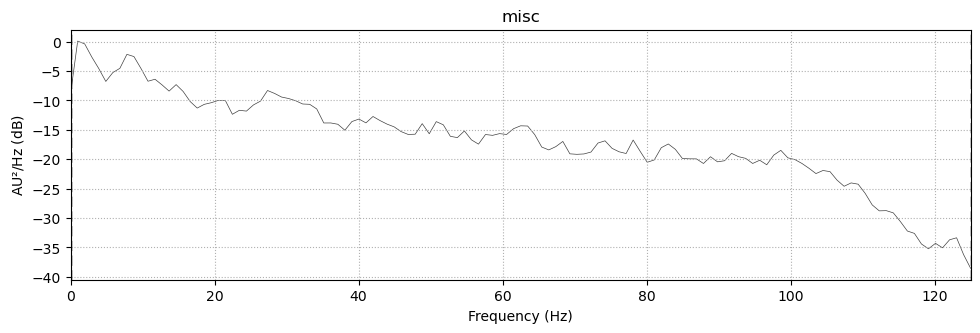

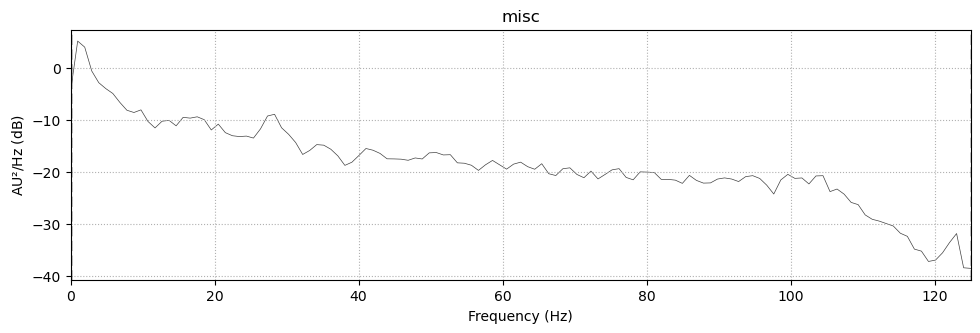

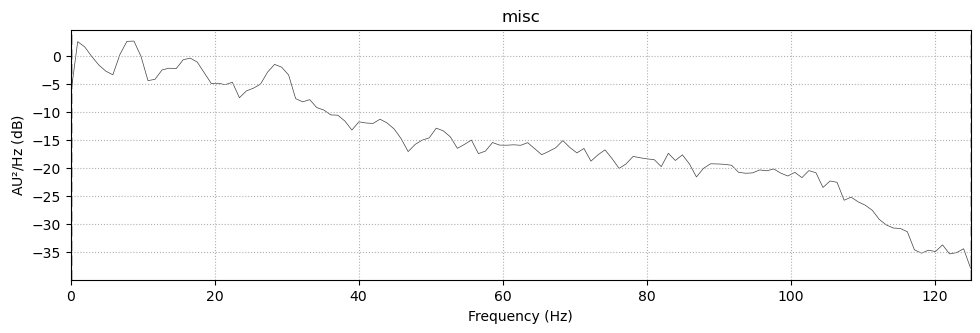

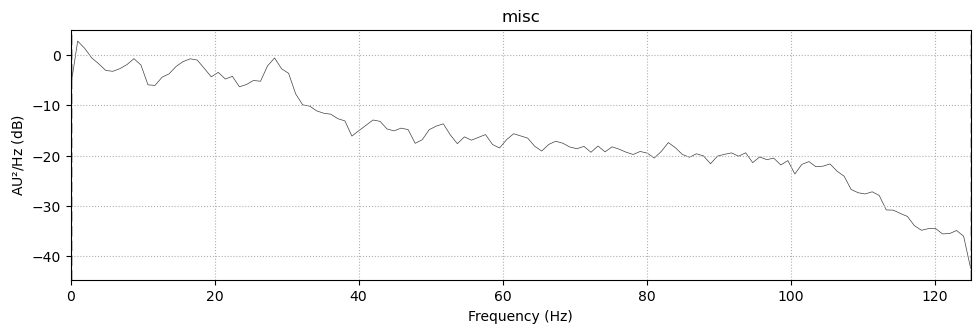

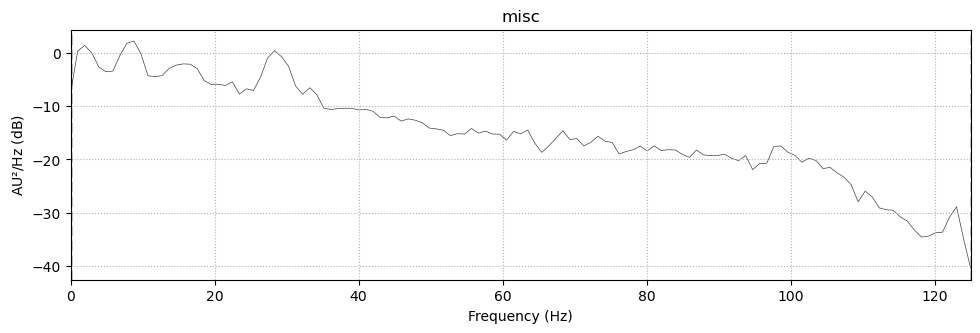

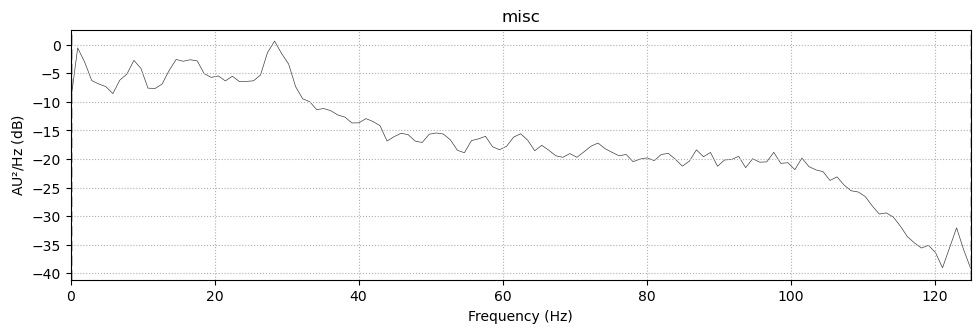

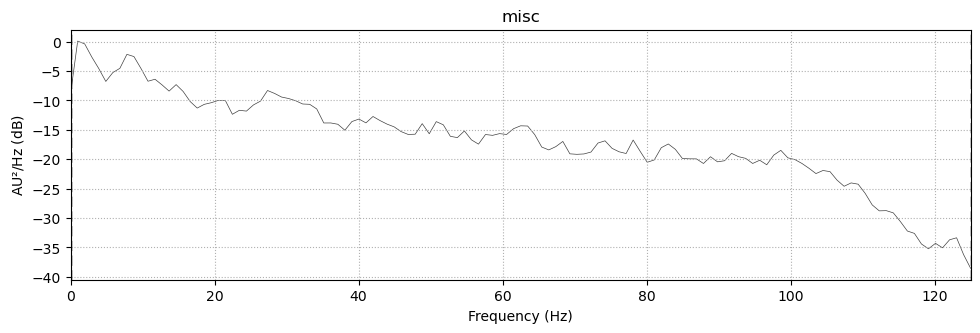

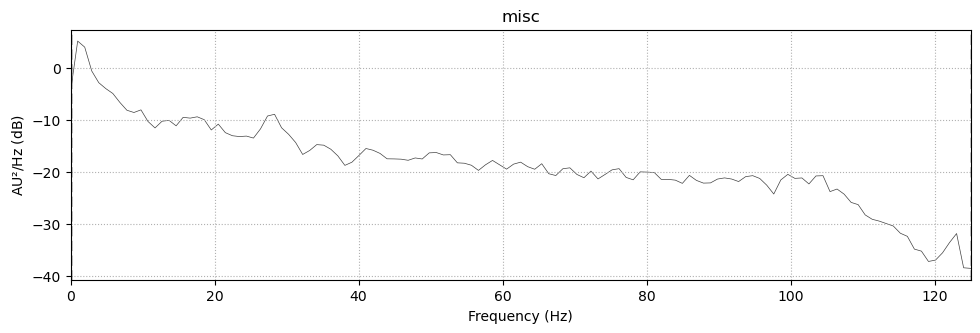

In [62]:
# mne built-in methods
for ch in raw.info.ch_names:
    raw.plot_psd(picks=ch)

plt.show()

Using matplotlib as 2D backend.


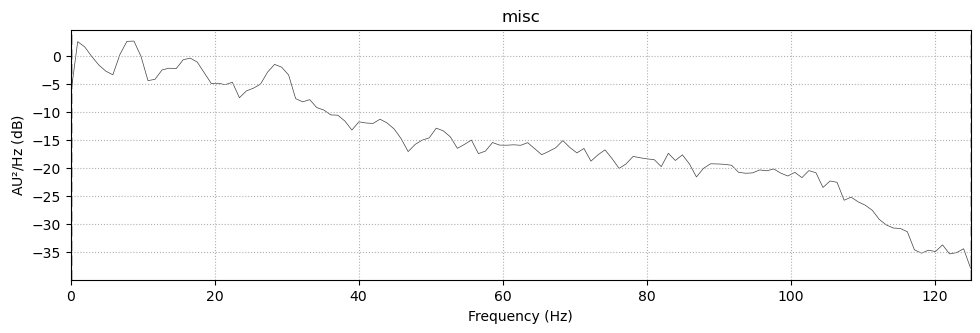

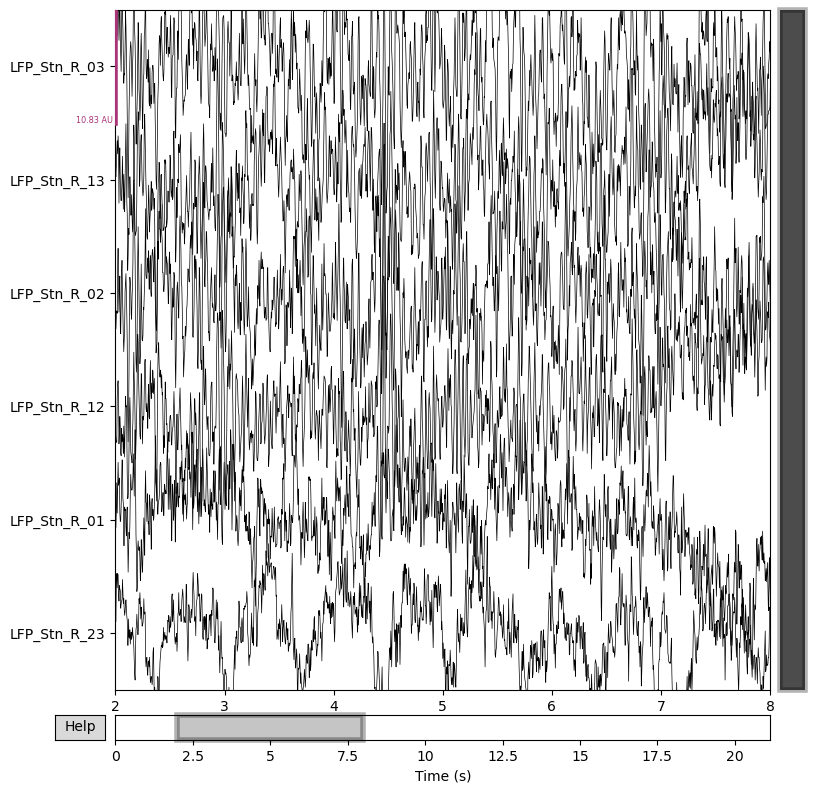

Figure(800x800)


In [38]:
fig = raw.plot(start=2, duration=6)
print(fig)


Effective window size : 1.024 (s)


C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\2976338963.py:14: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  spectrum.plot(picks = chs_to_plot, average=False, color='b')


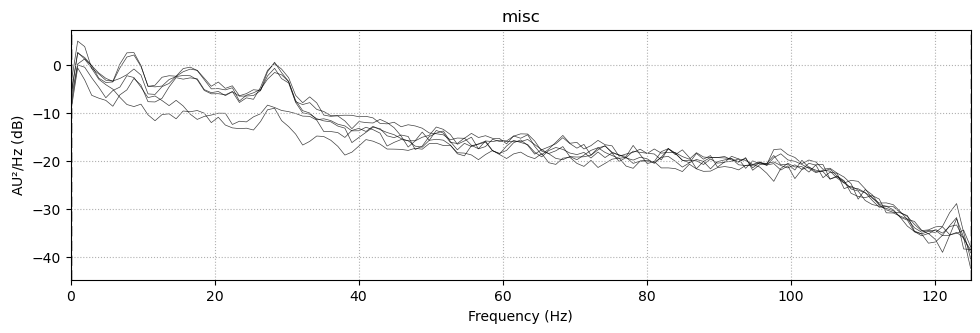

In [39]:
chs_to_plot = [
    'LFP_Stn_R_03',	
    'LFP_Stn_R_13',	
    'LFP_Stn_R_02',	
    'LFP_Stn_R_12',	
    'LFP_Stn_R_01',	
    'LFP_Stn_R_23'
    ]

# to plot spectral power create object spectrum
spectrum = raw.compute_psd(picks = chs_to_plot )

# spectrum has a built-in plot() method 
spectrum.plot(picks = chs_to_plot, average=False, color='b')

### Plot and calculate PSD (Wavelet Transformation)

In [113]:
import pywt
import PerceiveImport.classes.main_class as mainclass

load the signal

In [114]:
raw_sub024 = mainclass.PerceiveData(
    sub = "024",
    incl_modalities= ["survey"],
    incl_session= ["postop","fu3m","fu12m","fu18m"],
    incl_condition=["m0s0"],
    incl_task= ["rest"]
)

Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618062900_1.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063200_4.mat
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063300_5.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063400_6.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
LOADED sub024_ses-2021061806255999_run-LMTD20210618063500_7.mat
Creating RawArray with float64 data, n_channels=3,

In [45]:
sub024_postop_RingR = raw_sub024.survey.postop.m0s0.rest.data['RestBSSuRingR']
data=sub024_postop_RingR.get_data()

LFP_Stn_R_03 = data[0]

Transform data using a Morlet Wavelet Transformation

In [46]:
# set the parameters for the wavelet transformation
wavelet = "morl" # Type of wavelet to use (Morlet wavelet)
sampling_rate = 250 # Sampling rate of the LFP signal
fmin = 1 # Lower frequency limit for the power spectrum
fmax = 100 # Upper frequency limit for the power spectrum

# Calculate the wavelet coefficients of the LFP signal
coefficients, frequencies, times, _, _ = pywt.cwt(LFP_Stn_R_03, sampling_rate, wavelet, fmin, fmax)

# Calculate the power spectrum from the wavelet coefficients
power_spectrum = np.abs(coefficients) ** 2

# Plot the power spectrum
plt.imshow(power_spectrum, aspect="auto", origin="lower")

ValueError: method must be 'conv' or 'fft'

In [38]:
# perform a wavelet transformation using PyWavelets

#data=sub024.survey.fu3m.m0s0.rest.data['RestBSSuRingL'].get_data()
#raw = data[0]

wavelet = "db4"
level = 3


coeffs = pywt.wavedec(data, wavelet, level=level)


### Matplotlib Playground

In [40]:
# extract a selection of raw[]

start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)

channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]

print(f'We here selected the timepoints from {start_sample} until {stop_sample}' 
      f'\nand selected the channel {raw.ch_names[channel_index]}')

# print(raw_selection)

We here selected the timepoints from 2750 until 3250
and selected the channel LFP_Stn_R_03


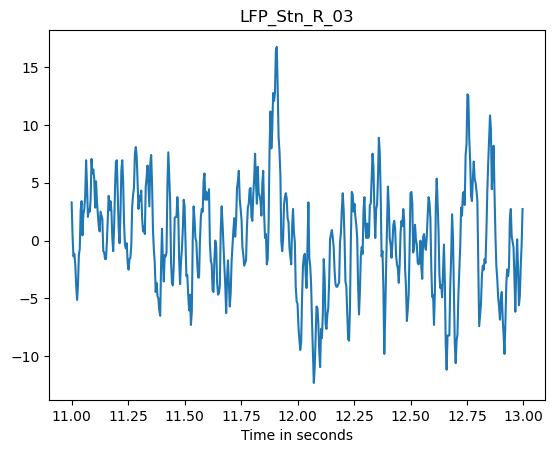

In [42]:
# plot the selected 2 arrays

x = raw_selection[1]        # time in seconds
y = raw_selection[0].T      # data from ch_trials[channel_index]

plt.plot(x, y)

plt.title(str(raw.ch_names[channel_index]))
plt.xlabel("Time in seconds")
# plt.ylabel() ???

plt.show()

<Figure size 640x480 with 0 Axes>

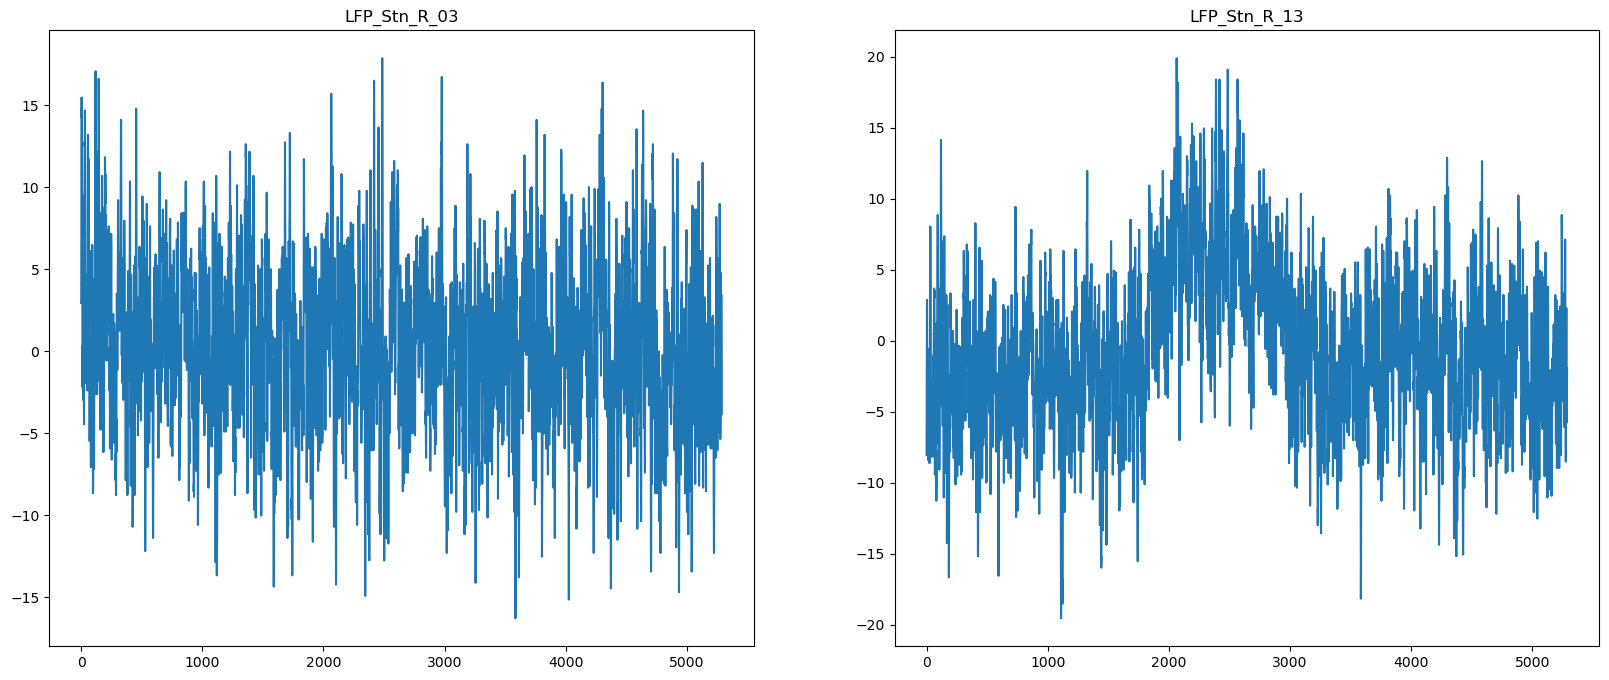

In [43]:
# plotting first and second trials from first 2 channels 

plt.suptitle("Raw data of channels left and right")

plt.figure(figsize= (20, 8))

# plot raw data of channel LFP_R_1A1B_STN
plt.subplot(1,2,1)
plt.plot(raw._data[0])
plt.title(str(raw.ch_names[0]))

# plot raw data of channel LFP_R_1B1C_STN
plt.subplot(1,2,2)
plt.plot(raw._data[1])
plt.title(str(raw.ch_names[1]))

plt.show()


In [44]:
# from Varvara

#Make some nice plots of the data

#channels to plot:
chs_to_plot = [
    'LFP_Stn_R_03',	
    'LFP_Stn_R_13',	
    'LFP_Stn_R_02',	
    'LFP_Stn_R_12',	
    'LFP_Stn_R_01',	
    'LFP_Stn_R_23'
    ]

plot_times = raw.times #timepoints set to zero
xticks = np.linspace(0, plot_times[-1], 5) #make 5 x-axis ticks, dividing the seconds by 5

fig, axes = plt.subplots(
    1, len(chs_to_plot), figsize=(18, 6)
) #define n of subplots and size

# axes = axes.flatten()
ax_c = 0 

for i, name in enumerate(chs_to_plot):

    
    if name in chs_to_plot:

        if name[-3:] == 'STN': # last three letters 
            axes[ax_c].psd(raw._data[i, :]) # e.g. raw._data[1,:] will output index 1 of all raw._data -> data from 2nd channel 
            axes[ax_c].set_title(
                f'PSD {name}',
                fontsize=16, color='r'
            )

        else:
            
            axes[ax_c].plot(plot_times, raw._data[i, :]) # e.g. raw._data[1,:] will output index 1 of all raw._data -> data from 2nd channel 
            axes[ax_c].set_title(name, fontsize=16, color='r')
            axes[ax_c].set_xticks(xticks)
            axes[ax_c].set_xticklabels(np.around(xticks / 60, 1))
                
        ax_c += 1 # count for-loop

In [45]:
raw._data

array([[ 2.96023003,  2.96023003,  8.19756008, ..., -3.87107004,
        -1.48011501,  3.41565003],
       [-8.04263409, -5.17026477,  0.45957909, ..., -5.74473864,
        -2.41279023, -1.95321114],
       [ 4.36600136,  3.10215886,  6.3192125 , ...,  2.527685  ,
         4.59579091,  7.12347591],
       [-4.21263504, -4.32649004, -1.59397002, ..., -2.04939002,
         0.91084001,  3.52950503],
       [ 9.00290141,  8.31037054,  7.73326147, ...,  3.5780762 ,
         2.77012351,  2.77012351],
       [-1.02935271, -1.60121533,  0.91498019, ..., -4.57490095,
        -2.8593131 , -3.77429329]])

In [75]:
raw.tmin

0.0

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)


C:\Users\jebe12\AppData\Local\Temp\ipykernel_4548\2182701887.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = raw.tmin, tmax = raw.tmax,  dB = False, estimate = 'amplitude')


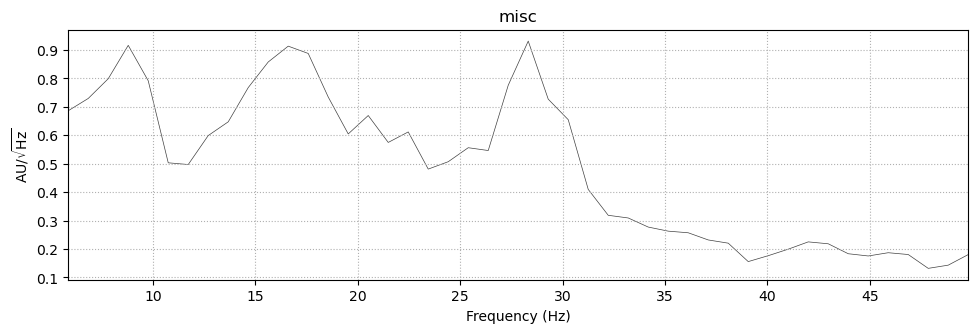

In [46]:
#raw.compute_psd(picks = chs_to_plot ).plot(fmin = 5, fmax = 50, picks = 1, tmin = 0, tmax = 10, dB = False, estimate = 'amplitude')
raw.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = raw.tmin, tmax = raw.tmax,  dB = False, estimate = 'amplitude')


# time: tmin - tmax (continuos data)

In [47]:
chan = 1 # set channel we want

start_time = int((1000 / 1000) * raw.info['sfreq']) # 250
end_time   = int((10000 / 1000) * raw.info['sfreq']) # 2500

raw._data[chan, start_time:end_time]


array([-5.51494909, -7.46816023, -7.46816023, ..., -0.22978955,
        1.03405295,  1.83831636])

In [48]:
mydat = raw.get_data(picks=['LFP_Stn_R_03'], start=1, stop=201)
print(mydat.shape)

(1, 200)


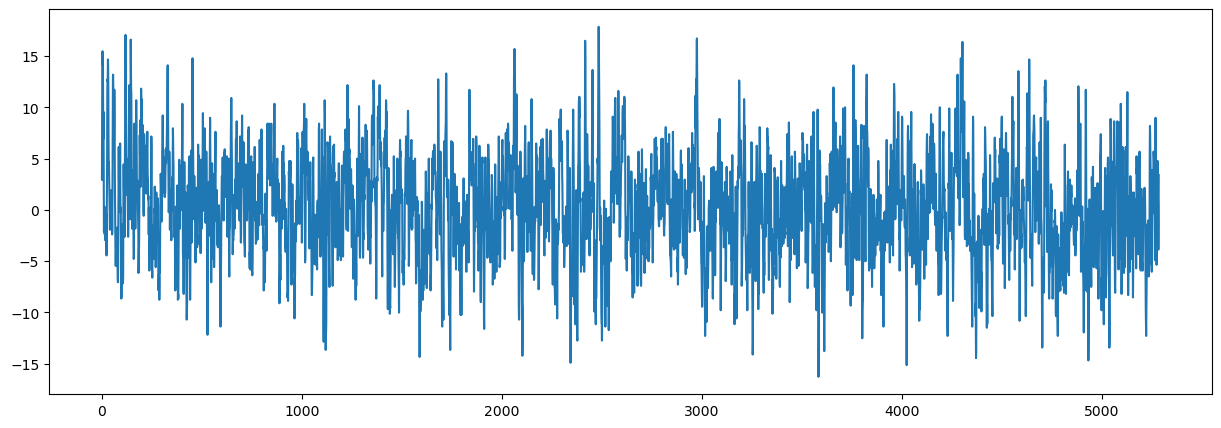

In [51]:
fig, ax = plt.subplots(figsize=[15, 5])

ax.plot(raw.get_data(picks=['LFP_Stn_R_03'],start=1, stop=20000).T)
plt.show()

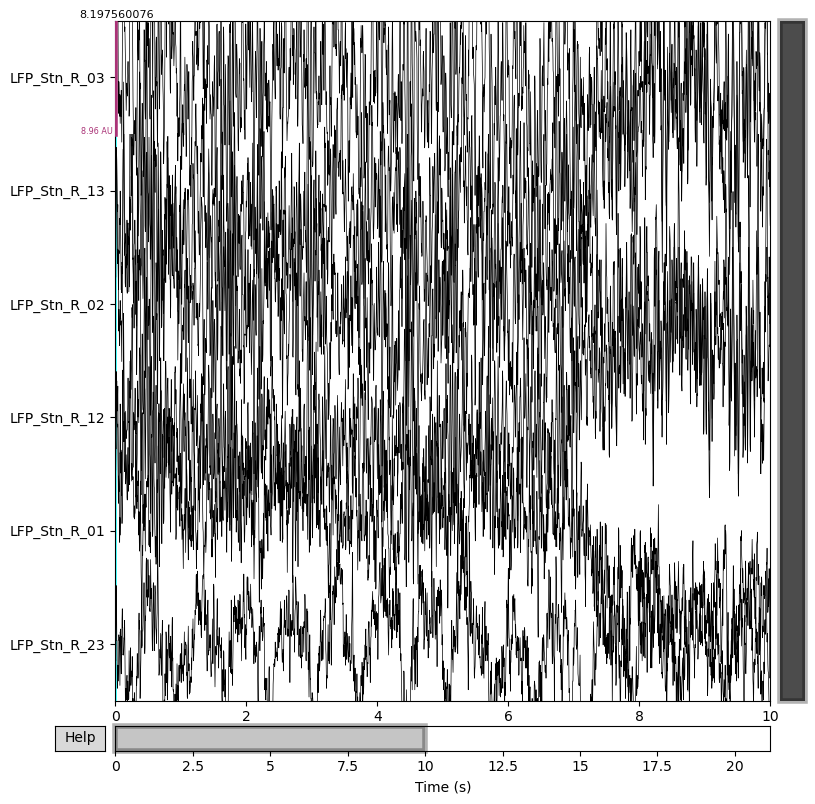

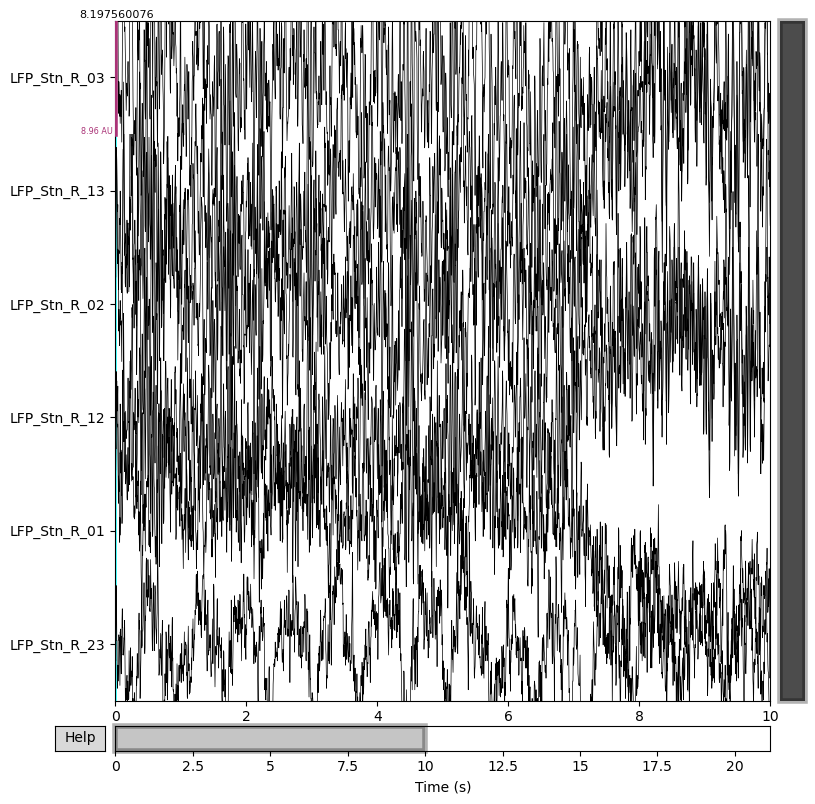

In [53]:
raw.plot(raw.get_data(picks='LFP_Stn_R_03'))

In [96]:
raw.info['bads'] = [
    'LFP_R_1A1B_STN', 
    'LFP_R_1B1C_STN', 
    'LFP_R_1A1C_STN',
    'LFP_R_2A2B_STN', 
    'LFP_R_2B2C_STN', 
    'LFP_R_2A2C_STN',] 

picks = mne.pick_types(raw.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads')

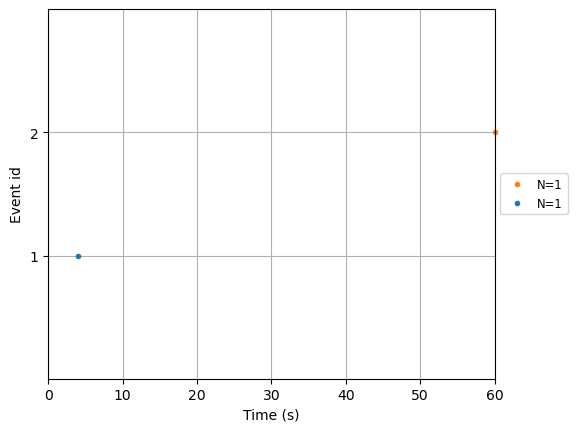

Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2 events and 2501 original time points ...
1 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


C:\Users\jebe12\AppData\Local\Temp\ipykernel_15384\1477881095.py:9: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks = 0)


IndexError: list index out of range

In [97]:
#events = mne.find_events(raw, stim_channel='LFP_R_13_STN') -> no stim channel in BrainSenseSurvey
trial_onsets = np.array([
       [ 1000 ,      0 ,    1],
       [ 15000 ,      0 ,    2 ]]) #we need the samples

event_dict = {'NoStim':1,'Threshold':2}
fig = mne.viz.plot_events(trial_onsets, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)
epochs = mne.Epochs(raw,events=trial_onsets,event_id = event_dict, tmin=0, tmax=10, baseline = None, preload = True)
epochs.plot_image(picks = 0)

In [99]:
# nostim_ep = epochs['NoStim']
# stim_ep = epochs['Threshold']
# stim_ep.plot_image(picks = 1)

In [100]:
M = 200
NFFT = M
win = hanning(M)
overlap = 0.25
overlap_samples = int(round(M*overlap)) # overlap in samples
t, f, S = spectrogram(mydat,window=win,nperseg=M,noverlap=overlap_samples,nfft=NFFT)

# Compute average spectrum
avg_S = np.mean(S,axis=1)

NameError: name 'hanning' is not defined

In [108]:
vars(tfr_morlet)

{'__wrapped__': <function mne.time_frequency.tfr.tfr_morlet(inst, freqs, n_cycles, use_fft=False, return_itc=True, decim=1, n_jobs=None, picks=None, zero_mean=True, average=True, output='power', verbose=None)>,
 '__qualname__': 'tfr_morlet',
 '__globals__': {'__name__': 'mne.time_frequency.tfr',
  '__doc__': 'A module which implements the time-frequency estimation.\n\nMorlet code inspired by Matlab code from Sheraz Khan & Brainstorm & SPM\n',
  '__package__': 'mne.time_frequency',
  '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x1e124cdfb80>,
  '__spec__': ModuleSpec(name='mne.time_frequency.tfr', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001E124CDFB80>, origin='c:\\Users\\jebe12\\anaconda3\\envs\\pyPerceive_dev\\lib\\site-packages\\mne\\time_frequency\\tfr.py'),
  '__file__': 'c:\\Users\\jebe12\\anaconda3\\envs\\pyPerceive_dev\\lib\\site-packages\\mne\\time_frequency\\tfr.py',
  '__cached__': 'c:\\Users\\jebe12\\anaconda3\\envs\\pyPerceive_dev

In [107]:
freqs = np.arange(1, 125)
D = tfr_morlet(epochs, freqs=freqs, n_cycles=6, return_itc=False, average=True, picks = 1)

In [110]:
spectrogram(
    mydat,
    fs=125.0, 
#             window=('hanning', 0.25), 
    nperseg=1, 
    noverlap=0.25, 
    nfft=None, 
    detrend='constant', 
    return_onesided=True, 
    scaling='density', 
    axis=- 1, 
    mode='psd')

(array([0.]),
 array([0.004, 0.012, 0.02 , 0.028, 0.036, 0.044, 0.052, 0.06 , 0.068,
        0.076, 0.084, 0.092, 0.1  , 0.108, 0.116, 0.124, 0.132, 0.14 ,
        0.148, 0.156, 0.164, 0.172, 0.18 , 0.188, 0.196, 0.204, 0.212,
        0.22 , 0.228, 0.236, 0.244, 0.252, 0.26 , 0.268, 0.276, 0.284,
        0.292, 0.3  , 0.308, 0.316, 0.324, 0.332, 0.34 , 0.348, 0.356,
        0.364, 0.372, 0.38 , 0.388, 0.396, 0.404, 0.412, 0.42 , 0.428,
        0.436, 0.444, 0.452, 0.46 , 0.468, 0.476, 0.484, 0.492, 0.5  ,
        0.508, 0.516, 0.524, 0.532, 0.54 , 0.548, 0.556, 0.564, 0.572,
        0.58 , 0.588, 0.596, 0.604, 0.612, 0.62 , 0.628, 0.636, 0.644,
        0.652, 0.66 , 0.668, 0.676, 0.684, 0.692, 0.7  , 0.708, 0.716,
        0.724, 0.732, 0.74 , 0.748, 0.756, 0.764, 0.772, 0.78 , 0.788,
        0.796, 0.804, 0.812, 0.82 , 0.828, 0.836, 0.844, 0.852, 0.86 ,
        0.868, 0.876, 0.884, 0.892, 0.9  , 0.908, 0.916, 0.924, 0.932,
        0.94 , 0.948, 0.956, 0.964, 0.972, 0.98 , 0.988, 0.996,

In [54]:
raw = raw.filter(l_freq=90, h_freq=5, picks=['LFP_R_1A1B_STN', 'LFP_R_1B1C_STN'])

ValueError: picks (['LFP_R_1A1B_STN', 'LFP_R_1B1C_STN']) could not be interpreted as channel names (no channel "['LFP_R_1A1B_STN', 'LFP_R_1B1C_STN']"), channel types (no type "LFP_R_1A1B_STN"), or a generic type (just "all" or "data")

### Get Impedances

In [10]:
import PerceiveImport.methods.find_folders as findfolders
importlib.reload(findfolders)

<module 'PerceiveImport.methods.find_folders' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\find_folders.py'>

In [12]:
# define path to Longterm_beta_project
Longterm_beta_project = findfolders.get_local_path(folder='Longterm_beta_project')
Longterm_beta_project

'c:\\Users\\jebe12\\Research\\Longterm_beta_project'

In [16]:
path_to_impedanceFile = os.path.join(Longterm_beta_project, "Data", "NEW_perceive", 'sub_024_18mfu')

df = pd.read_csv(os.path.join(path_to_impedanceFile, 'sub-20210615PStn_ses-1948072210000072_run-Impedance.csv'))
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Data\\NEW_perceive\\sub_024_18mfu\\sub-20210615PStn_ses-1948072210000072_run-Impedance.csv'

## 4. Preprocessing

In [119]:
# detecting power line noise
fig = raw.compute_psd(picks=chs_to_plot, tmax=np.inf, fmax=125.0, average=None).plot(picks=chs_to_plot)
fig.show()

# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

Effective window size : 1.024 (s)
Aggregating Welch estimates (median) before plotting...


C:\Users\jebe12\AppData\Local\Temp\ipykernel_15384\3965450946.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.compute_psd(picks=chs_to_plot, tmax=np.inf, fmax=125.0, average=None).plot(picks=chs_to_plot)
c:\Users\jebe12\anaconda3\envs\pyPerceive_dev\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\jebe12\AppData\Local\Temp\ipykernel_15384\3965450946.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [122]:
#from mne.preprocessing import create_eog_epochs, create_ecg_epochs, compute_proj_ecg, compute_proj_eog

# detect ecg artifacts

ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine='mean')

ValueError: Unable to generate artificial ECG channel

## UPDRS Analysis

## Impedance Changes

In [20]:
from PerceiveImport.methods import find_folders
from PerceiveImport.methods import json_read

In [11]:
sub = '024'
json_path = os.path.join(find_folders.get_onedrive_path('perceivedata'), f'sub-{sub}', 'raw_jsons')
# perceive_path = os.path.join(find_folders.get_onedrive_path('perceivedata'), f'sub-{sub}', 'raw_perceive')

fname = os.listdir(json_path)[0] # first filename of all JSON files in that folder

with open(os.path.join(json_path, fname), 'r') as f:
    json_object = json.loads(f.read())

print(json_object.keys()) # get all keys in the json file and go through every key

dict_keys(['AbnormalEnd', 'FullyReadForSession', 'FeatureInformationCode', 'SessionDate', 'SessionEndDate', 'ProgrammerTimezone', 'ProgrammerUtcOffset', 'ProgrammerLocale', 'ProgrammerVersion', 'PatientInformation', 'DeviceInformation', 'BatteryInformation', 'GroupUsagePercentage', 'LeadConfiguration', 'Stimulation', 'Groups', 'BatteryReminder', 'MostRecentInSessionSignalCheck', 'Impedance', 'GroupHistory', 'SenseChannelTests', 'CalibrationTests', 'DiagnosticData'])


In [21]:
json_object = json_read.load_sourceJSON(sub="024", fname=["Report_Json_Session_Report_20221205T134700.json"])

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'

In [12]:
json_object['Impedance']

[{'ImpedanceStatus': 'ImpedanceStateDef.GOOD',
  'TestCurrentMA': 'Automatic increase',
  'Hemisphere': [{'Hemisphere': 'HemisphereLocationDef.Left',
    'SessionImpedance': {'Monopolar': [{'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.SenSight_0',
       'ResultValue': 1346},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.SenSight_1a',
       'ResultValue': 1940},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_1b',
       'ResultValue': 2433},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_1c',
       'ResultValue': 2495},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.SenSight_2a',
       'ResultValue': 2084},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_2b',
       'ResultValue': 2636},
      {'Electrode1': 'ElectrodeDef.Case',
       'Electrode2': 'ElectrodeDef.Sensight_2c',
       

## Consistency of Clinical stimulation contact